<a href="https://colab.research.google.com/github/paula-33/Bootcamp-UniSENAI---Ciencia-de-dados/blob/main/notebook/1_EAD_e_Tratamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contextualização do Projeto:**
O objetivo do projeto é desenvolver um sistema inteligente de controle de qualidade para chapas de aço inoxidável, utilizando um conjunto de dados fornecido pela empresa. Esse conjunto de dados é composto por 31 indicadores geométricos e estatísticos extraídos de imagens de superfície das chapas, visando a identificação e classificação automática de defeitos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# **1. Obtenção dos Dados**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp DS/Projeto Final/Cópia de bootcamp_train.csv')

# Nota: analisaremos apenas o conjunto de treino;
print("\n▶️  Dimensões — df treino:", df.shape  )


▶️  Dimensões — df treino: (3390, 39)


In [3]:
train = df.copy()

In [4]:
print("\n -  Tipos de dados")
print(train.dtypes.value_counts())

print("\n -  Informações dos dados")
print(train.info())

print("\n - Primeiras linhas")
print(train.head(3))


 -  Tipos de dados
float64    20
int64      10
object      7
bool        2
Name: count, dtype: int64

 -  Informações dos dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float

 **Notas**

* **id** é apenas um identificador; ele não faz parte dos 31 indicadores exigidos pela empresa.

* Os 7 campos falha_* constituem as classes de defeito. Eles ficam fora da contagem de indicadores porque representam o alvo (rótulo) do modelo.

* Os 31 indicadores estão distribuídos entre cinco grandes grupos (coordenadas - 4, dimensões - 6, luminosidade - 4, índices de forma - 12 e variáveis de processo - 5).


**Tipos de Variáveis:**

Numéricas: Coordenadas, peso, área, perímetro, luminosidade, espessura, dimensões e  índices.

Categóricas: Tipos de falhas (falha_1 a falha_6 e falha_outros), tipo de aço (A300, A400).


# **2. Análise Exploratória de Dados (EDA)**

## 2.1 Análise Estatística Descritiva das Variáveis.

    Para as 31 variáveis preditoras do conjunto df_train.csv, apresentamos estatísticas descritivas agrupadas por categoria:

In [5]:
print("\n - Nome das Variáveis")
print(train.columns)


 - Nome das Variáveis
Index(['id', 'x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'peso_da_placa',
       'area_pixels', 'perimetro_x', 'perimetro_y', 'soma_da_luminosidade',
       'maximo_da_luminosidade', 'comprimento_do_transportador',
       'tipo_do_aço_A300', 'tipo_do_aço_A400', 'espessura_da_chapa_de_aço',
       'temperatura', 'index_de_bordas', 'index_vazio', 'index_quadrado',
       'index_externo_x', 'indice_de_bordas_x', 'indice_de_bordas_y',
       'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo',
       'log_das_areas', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao',
       'indice_de_luminosidade', 'sigmoide_das_areas',
       'minimo_da_luminosidade', 'falha_1', 'falha_2', 'falha_3', 'falha_4',
       'falha_5', 'falha_6', 'falha_outros'],
      dtype='object')


## 2.1.1 Coordenadas da Bounding Box (x_mínimo, x_máximo, y_mínimo, y_máximo)

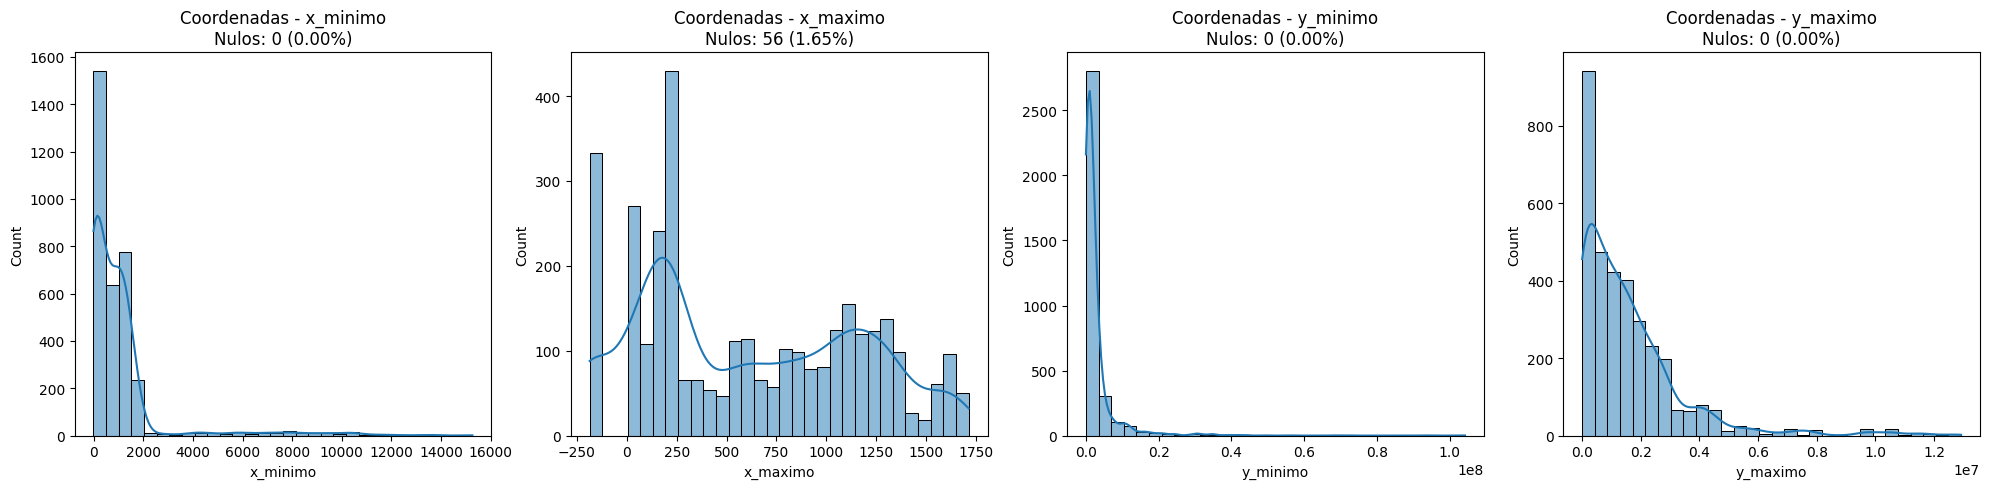

In [6]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo'], 1):
    plt.subplot(1, 4, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Coordenadas - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )

plt.tight_layout()
plt.show()


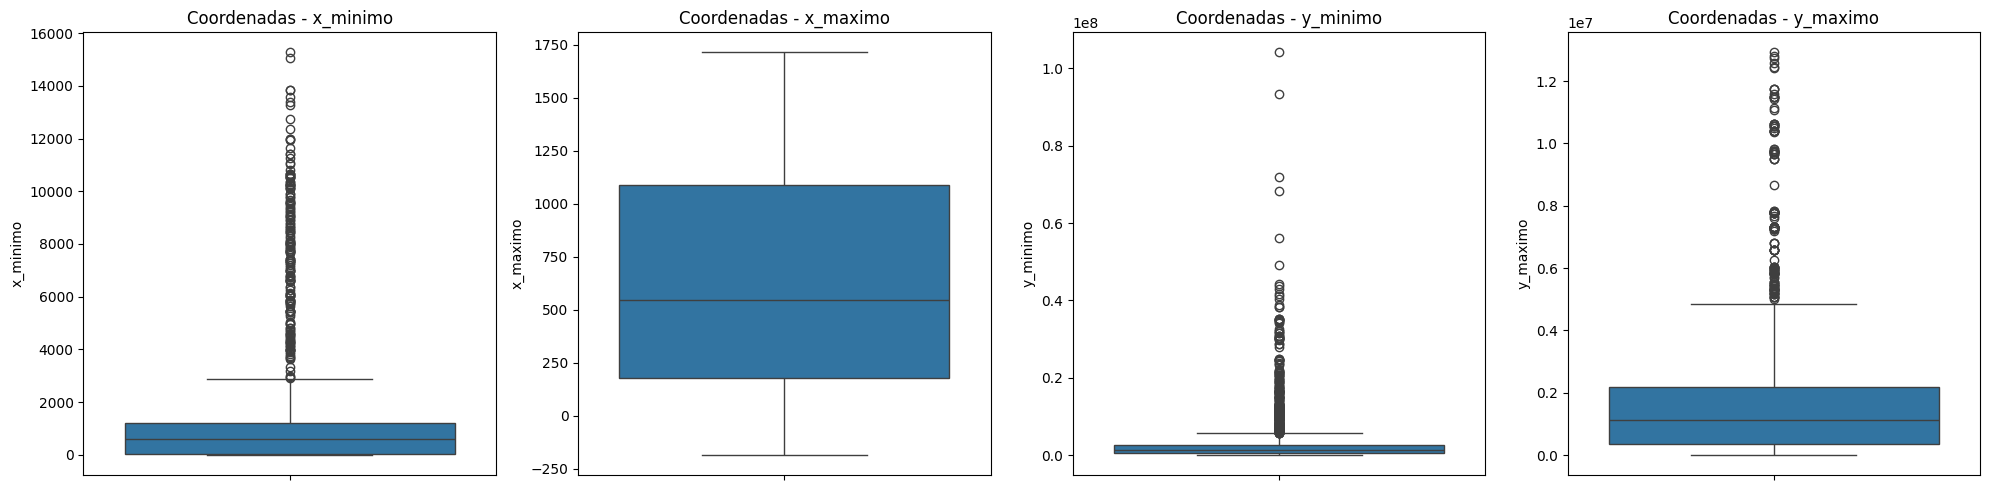

In [7]:

plt.figure(figsize=(20, 5))
for i, col in enumerate(['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Coordenadas - {col}")
plt.tight_layout()
plt.show()


In [8]:
# Medidas descritivas para as variáveis especificadas
print(train[['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo']).sum())


           x_minimo    x_maximo      y_minimo      y_maximo
count   3390.000000  3334.00000  3.390000e+03  3.390000e+03
mean     995.507375   605.90012  2.692640e+06  1.592301e+06
std     1796.737709   548.07724  5.625693e+06  1.821345e+06
min      -11.000000  -186.00000 -2.000000e+01 -1.660000e+02
25%       41.000000   179.00000  3.934352e+05  3.407380e+05
50%      614.000000   544.00000  1.265462e+06  1.128297e+06
75%     1187.500000  1090.00000  2.555025e+06  2.184335e+06
max    15266.000000  1713.00000  1.041366e+08  1.291709e+07

Valores nulos:
x_minimo     0
x_maximo    56
y_minimo     0
y_maximo     0
dtype: int64

Duplicados:
13


Comentários:

As coordenadas indicam posições dos defeitos na chapa de aço. Observa-se que x_mínimo varia de -11 até 15.266, enquanto x_máximo varia de -186 até 1.713. Valores médios de x (~996 para x_mínimo, ~606 para x_máximo) sugerem coordenadas moderadas, porém há anomalias: em 56 casos x_máximo está ausente, e em 626 casos x_máximo < x_mínimo, contrariando a expectativa (x_máx ≥ x_mín). Esses casos indicam inconsistências nos dados (possivelmente erros de medição ou registros incompletos).  

As coordenadas y têm amplitude muito maior: y_mínimo vai de -20 até ( ~1,04×10^8) e y_máximo de -166 até ~1,29×10^7. Os valores medianos de y (~1,26×10^6) são muito menores que os máximos, sugerindo que a maioria dos defeitos ocorre em posições com coordenadas y relativamente baixas, mas há alguns defeitos em posições extremas (y muito elevadas). Valores negativos de y são raros (mínimo -20) e provavelmente representam erros.





Em suma, as coordenadas exibem grande variabilidade e alguns valores fora do esperado (ex.: coordenadas negativas e inversões x_min > x_max) que merecem atenção.


## 2.1.2 Dimensões Brutas (Área e Perímetro)

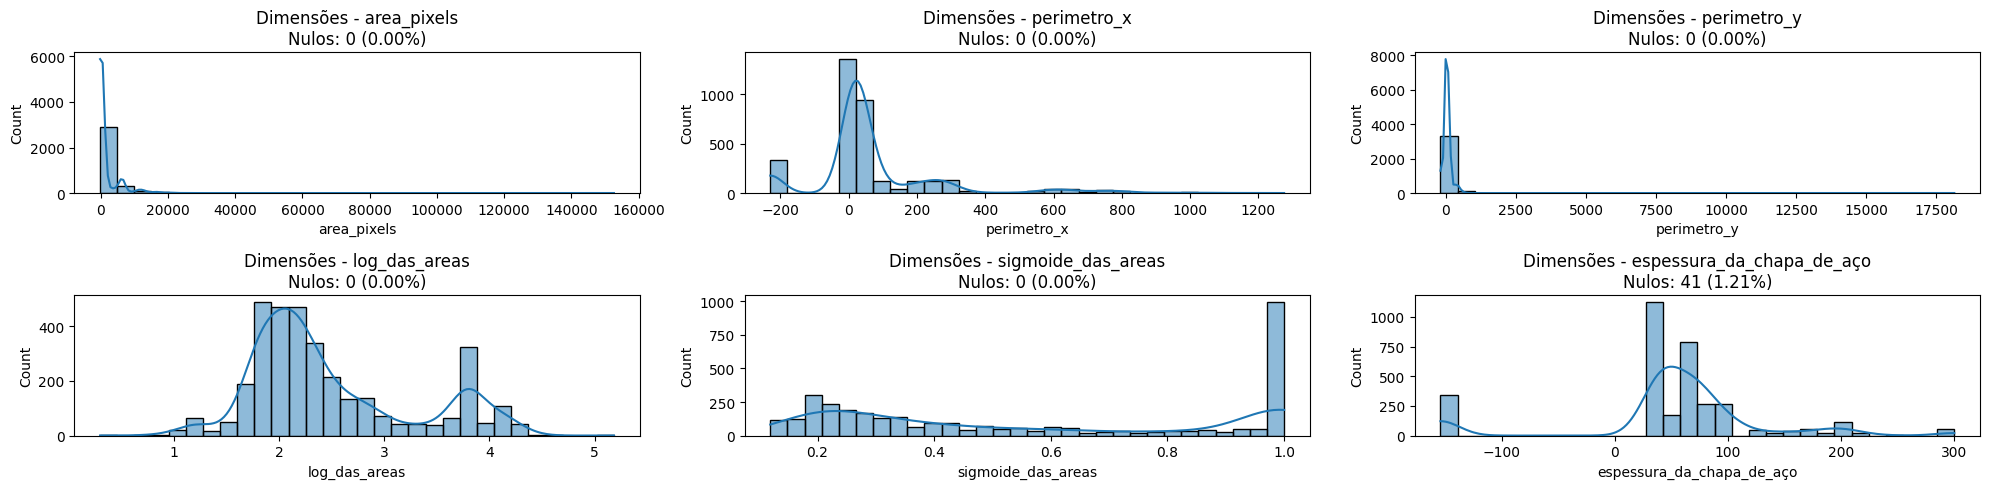

In [9]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Dimensões - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )
plt.tight_layout()
plt.show()


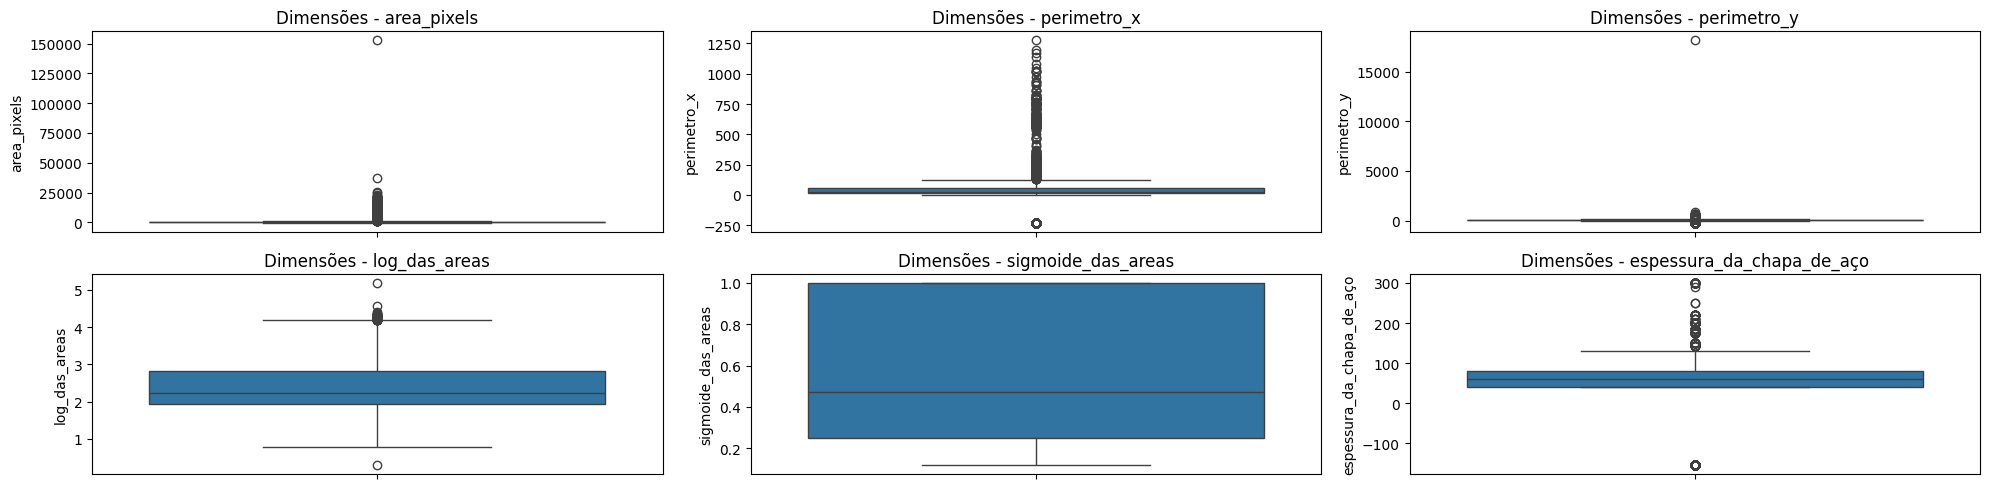

In [10]:
# prompt: gere os boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Dimensões - {col}")
plt.tight_layout()
plt.show()


In [11]:

# Medidas descritivas para as variáveis especificadas
print(train[['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['area_pixels', 'perimetro_x', 'perimetro_y', 'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço']).sum())


         area_pixels  perimetro_x   perimetro_y  log_das_areas  \
count    3390.000000  3390.000000   3390.000000    3390.000000   
mean     1566.317699    66.733923     47.261062       2.476344   
std      4337.683975   195.092105    336.794632       0.772512   
min      -206.000000  -229.000000   -194.000000       0.301000   
25%        68.000000    12.000000     11.000000       1.929400   
50%       142.000000    22.000000     21.000000       2.225300   
75%       524.750000    58.000000     56.000000       2.829625   
max    152655.000000  1275.000000  18152.000000       5.183700   

       sigmoide_das_areas  espessura_da_chapa_de_aço  
count         3390.000000                3349.000000  
mean             0.570363                  53.130487  
std              0.335394                  85.295729  
min              0.119000                -154.000000  
25%              0.248200                  40.000000  
50%              0.472100                  60.000000  
75%              0.9

Comentários:

As variáveis de dimensão do defeito apresentam distribuições bastante assimétricas. A `area_pixels` (área em pixels do defeito) tem mediana **142** e média **~1.566**, indicando forte assimetria à direita (alguns defeitos muito maiores que a maioria).  

O valor mínimo registrado de área é **-206**, o que é fisicamente impossível (área negativa) – um claro erro nos dados. A área máxima atinge **152.655 pixels**, muito acima do percentil 75 (**~525**), evidenciando outliers extremos (defeitos excepcionalmente grandes).  

Os perímetros, separados em `perímetro_x` e `perímetro_y`, também mostram distribuição semelhante: medianas baixas (**22** e **21**, respectivamente) contra máximos muito altos (**1.275** e **18.152**). Notavelmente, há perímetros negativos (`perímetro_x` mínimo **-229**, `perímetro_y` mínimo **-194**) – outro indicativo de erro ou cálculo incorreto.  

Esses outliers negativos e positivos sugerem que alguns registros podem ter sido computados erroneamente (por exemplo, se `x_max < x_min`, o cálculo de comprimento poderia resultar negativo).  

Em resumo, a maioria dos defeitos tem áreas e perímetros pequenos, mas existem alguns casos atípicos de dimensões enormes e até valores inválidos que distorcem as estatísticas.



## 2.1.3 Luminosidade (Soma, Mínimo e Máximo de Intensidade)

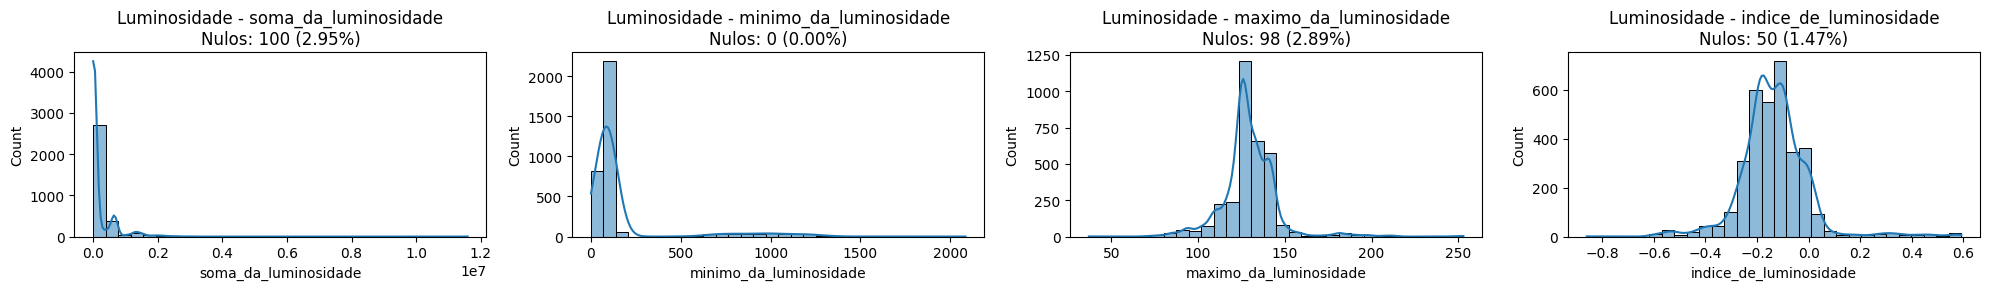

In [12]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade'], 1):
    plt.subplot(2, 4, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Luminosidade - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )
plt.tight_layout()
plt.show()


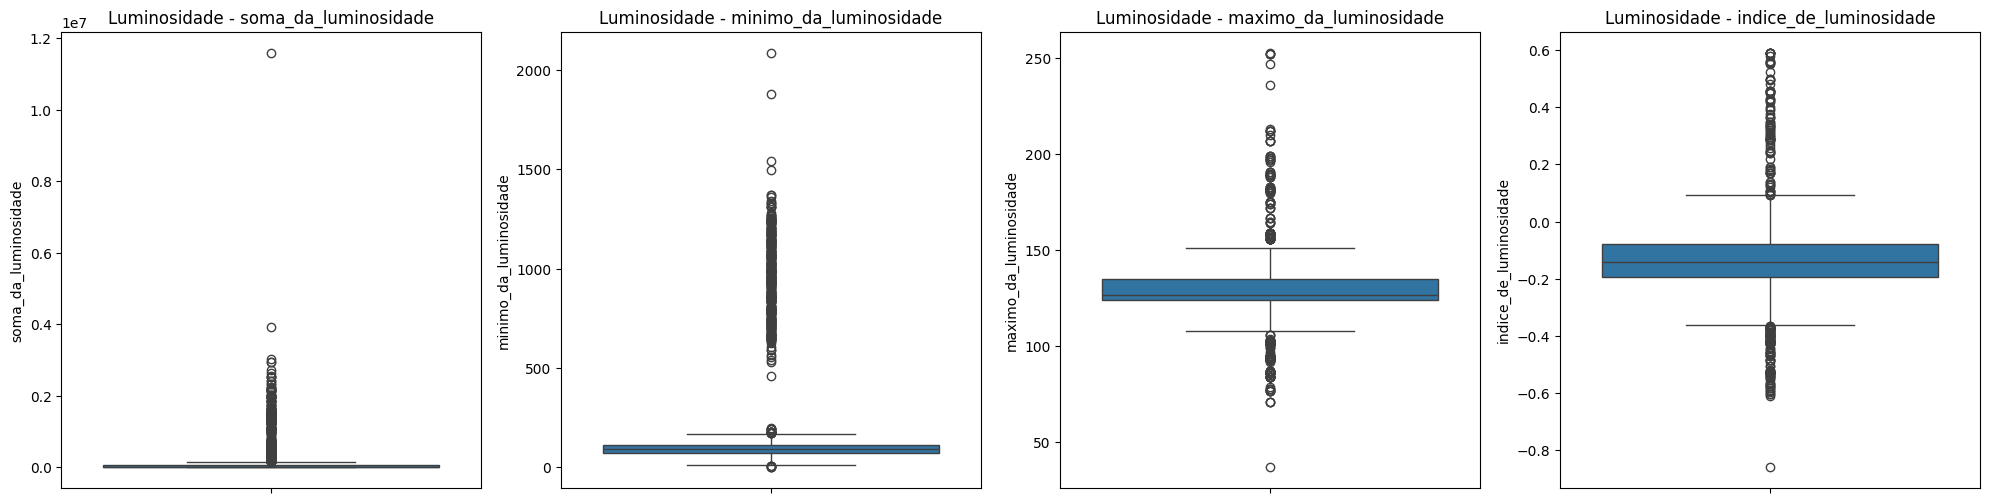

In [13]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade'], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Luminosidade - {col}")
plt.tight_layout()
plt.show()


In [14]:

# Medidas descritivas para as variáveis
print(train[['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['soma_da_luminosidade', 'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade']).sum())


       soma_da_luminosidade  minimo_da_luminosidade  maximo_da_luminosidade  \
count          3.290000e+03             3390.000000             3292.000000   
mean           1.931079e+05              171.763422              129.187424   
std            4.549965e+05              272.952080               16.110521   
min            2.550000e+02                0.000000               37.000000   
25%            9.514500e+03               71.000000              124.000000   
50%            1.783600e+04               93.000000              127.000000   
75%            6.797800e+04              111.000000              135.000000   
max            1.159141e+07             2086.000000              253.000000   

       indice_de_luminosidade  
count             3340.000000  
mean                -0.134957  
std                  0.133175  
min                 -0.860300  
25%                 -0.193725  
50%                 -0.140800  
75%                 -0.079000  
max                  0.591700  


Comentários:

As variáveis relacionadas à luminosidade do defeito refletem características de brilho nos pixels. A `soma_da_luminosidade` possui mediana **~1,78×10^4** e média **~1,93×10^5**, com valores variando de **255** até **1,15×10^7**.  

Essa distribuição altamente assimétrica indica que defeitos maiores (ou mais brilhantes) elevam drasticamente a soma – novamente temos alguns outliers (valor máximo muito acima do terceiro quartil **~6,8×10^4**).  

O `máximo_da_luminosidade` (intensidade máxima de pixel no defeito) varia de **37** até **253**, com média **~129**. Esses valores estão dentro da faixa de **0–255** (escala usual de intensidade em imagens 8-bit), sugerindo que, em geral, os defeitos apresentam pixels não totalmente saturados.  

Já o `minimo_da_luminosidade` (intensidade mínima) varia de **0** até **2086**. Claramente, **2086** está muito acima do limite de **255** – um valor impossível para intensidade de pixel, indicando erro em pelo menos um registro. Fora esse ponto extremo, o segundo maior mínimo é **253**, e a média **~172** sugere que a maioria dos defeitos contém pixels relativamente escuros em seu interior.  

Em resumo, as medidas de luminosidade confirmam a presença de outliers: há um registro com mínimo de intensidade inválido e alguns defeitos excepcionalmente brilhantes ou extensos que elevam a soma de luminosidade.


## 2.1.4 Índices Estatísticos e Geométricos (Borda, Vazio, Forma, Variação, etc.)

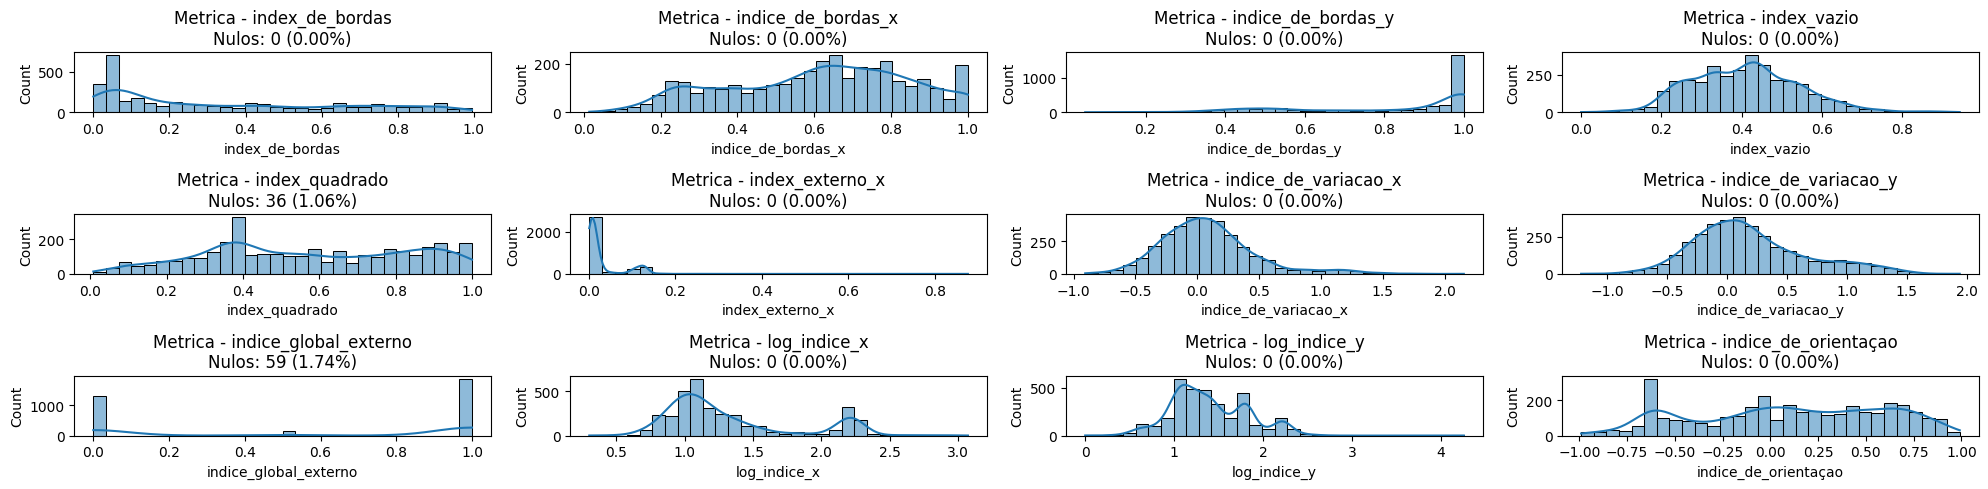

In [15]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao'], 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[col], kde=True, bins=30)

    # Cálculo de nulos
    num_nulls = train[col].isnull().sum()
    percentage_nulls = (num_nulls / len(train)) * 100

    # Título com informações de nulos
    plt.title(
        f"Metrica - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)"
    )
plt.tight_layout()
plt.show()


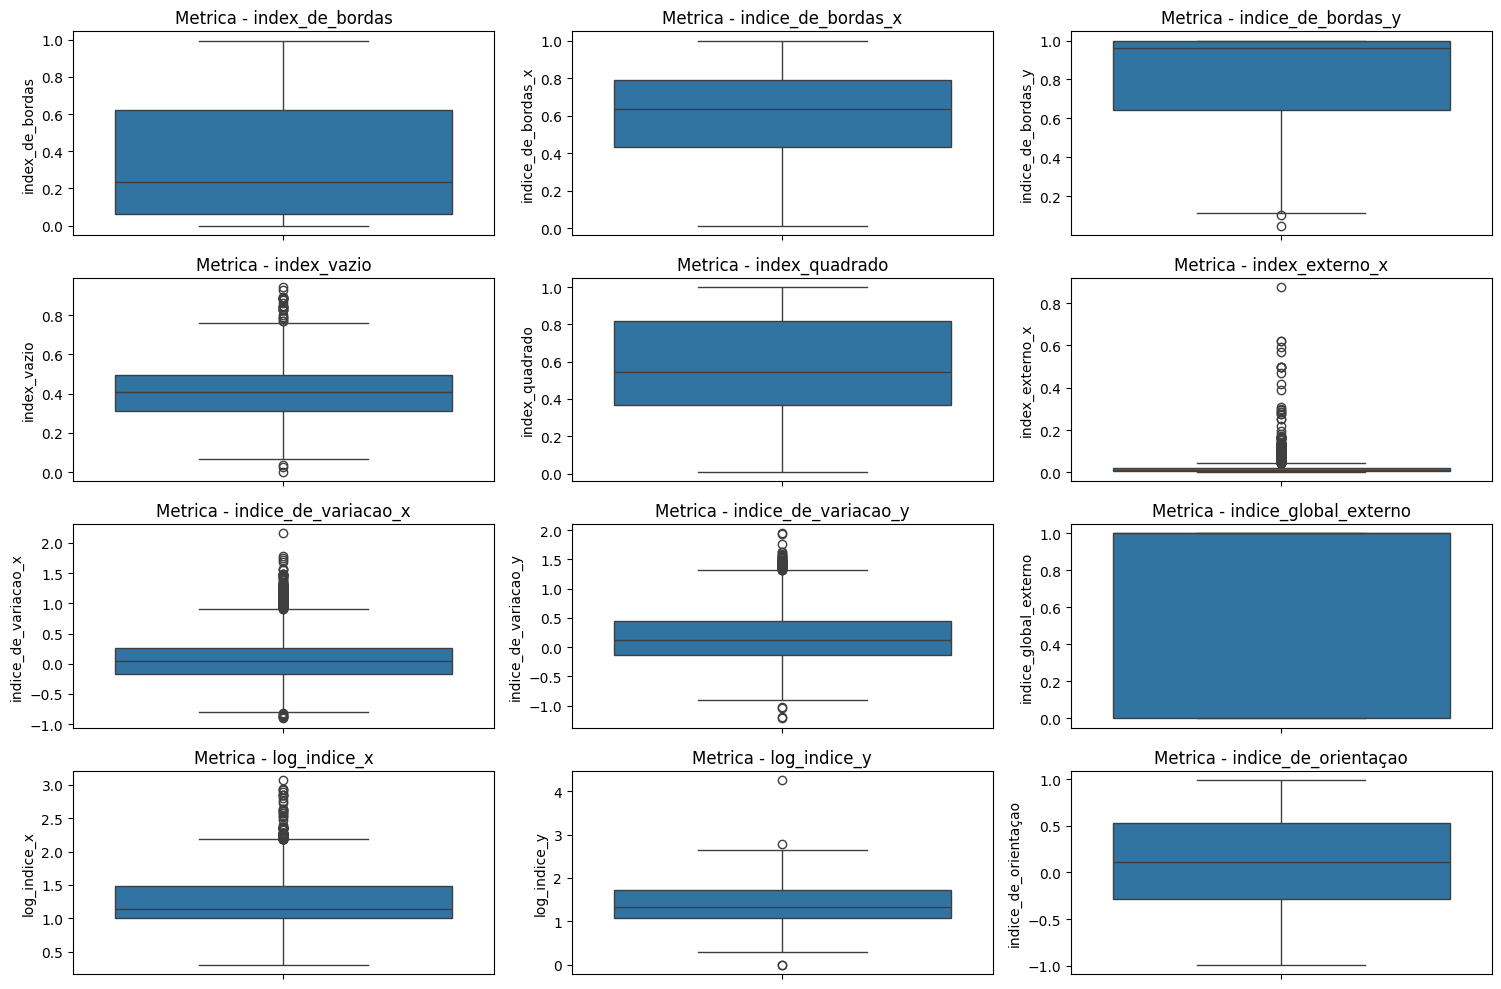

In [16]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=train[col]) # Changed to boxplot
    plt.title(f"Metrica - {col}")
plt.tight_layout()
plt.show()


In [17]:
print(train[['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['index_de_bordas', 'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio',
                         'index_quadrado', 'index_externo_x', 'indice_de_variacao_x', 'indice_de_variacao_y',
                         'indice_global_externo', 'log_indice_x', 'log_indice_y', 'indice_de_orientaçao']).sum())




       index_de_bordas  indice_de_bordas_x  indice_de_bordas_y  index_vazio  \
count      3390.000000         3390.000000         3390.000000  3390.000000   
mean          0.340712            0.610754            0.828285     0.409954   
std           0.307037            0.230931            0.225691     0.133362   
min           0.000000            0.014400            0.048400     0.000000   
25%           0.060400            0.434975            0.642900     0.313350   
50%           0.232400            0.636400            0.964300     0.409750   
75%           0.621650            0.789500            1.000000     0.495975   
max           0.995200            1.000000            1.000000     0.943900   

       index_quadrado  index_externo_x  indice_de_variacao_x  \
count     3354.000000      3390.000000           3390.000000   
mean         0.572069         0.032006              0.083130   
std          0.263772         0.053980              0.381303   
min          0.008300         0.

Comentários:

O conjunto inclui 12 índices derivados das características geométricas e estatísticas dos defeitos:

### Índices de Bordas e Área Vazia  
- **index_de_bordas**: Fração de pixels de borda no defeito. Distribuição de **0** a **~0,995** (média **~0,341**) – variando de poucos pixels de borda até quase **100%** borda em alguns defeitos.  
- **index_vazio**: Possivelmente porcentagem de área vazia interna; varia de **0** a **~0,944** (média **~0,410**). A maioria dos valores está em torno de **0,31–0,50** (entre Q1 e Q3), indicando que tipicamente **~40%** da área do bounding box do defeito é vazia (sem defeito).  

### Índice de Forma  
- **index_quadrado**: Índice de forma (quanto mais próximo de **1**, mais quadrado o defeito). Vai de **~0,0083** até **1,0** (média **~0,572**). Há defeitos quase perfeitamente quadrados (**1,0**) e outros muito alongados (próximos de **0**).  

### Índices de Bordas Externas  
- **index_externo_x**: Possivelmente proporção de bordas externas no eixo **X**. Valores baixos (média **~0,032**, máximo **~0,876**) – a maioria dos defeitos tem pouca extensão de borda externa no eixo horizontal.  
- **índice_de_bordas_x** e **índice_de_bordas_y**: Proporção de bordas nos lados esquerdo/direito vs. topo/base. Em média **~0,611 (X)** e **~0,828 (Y)**, sugerindo que a fração de borda ocupada horizontalmente é menor que verticalmente para muitos defeitos (talvez defeitos mais “achatados” horizontalmente). Ambos variam de valores baixos (**~0,01–0,05 mínimos**) até **1,0**, indicando variedade de formatos.  

### Índices de Variação  
- **índice_de_variação_x** e **índice_de_variação_y**: Podem representar alguma medida de variação estatística no eixo **X** e **Y** (talvez assimetria ou variância).  
  - **índice X**: Varia de **-0,905** até **2,156** (média **~0,083**).  
  - **índice Y**: Varia de **-1,218** até **1,941** (média **~0,193**).  
  - Valores negativos sugerem variação abaixo de alguma média de referência, enquanto valores positivos indicam variação acima.  

### Índice Global Externo  
- **índice_global_externo**: Indicador binário se o defeito atinge a borda externa global da placa.  
  - Valores: **0**, **0,5** ou **1,0**, com mediana **= 1**.  
  - Mais da metade dos registros têm valor **1**, sugerindo que muitos defeitos tocam a borda externa. Cerca de **25%** têm **0** (não tocam) e alguns apresentam **0,5** – possivelmente indicando casos parciais ou cálculo fracionário.  
  - A distribuição é fortemente bimodal, concentrada em **0** e **1**.  

### Índice de Orientação  
- **índice_de_orientação**: Indica a orientação do defeito (provavelmente **cosθ** ou **sinθ** normalizado).  
  - Varia de **-0,991** até **0,992** (média **~0,099**).  
  - A mediana **(~0,111)** próxima de **0** sugere que os defeitos não têm orientação predominante; a distribuição é aproximadamente simétrica em torno de **0**.  

### Índice de Luminosidade  
- **índice_de_luminosidade**: Possivelmente um índice estatístico (ex.: skewness ou contrast) da luminosidade.  
  - Todos os valores são negativos ou ligeiramente positivos: variam de **-0,860** até **0,592**, com média **-0,135**.  
  - Isso indica leve tendência negativa (talvez defeitos tendem a ter distribuição de intensidades com cauda para valores altos, produzindo skew negativo).  
  - Quartis estreitos **(-0,194; -0,140; -0,079)** mostram baixa variabilidade para a maioria dos casos, apesar de alguns outliers (ex.: **0,592**).  

### Dados Ausentes  
- Alguns índices apresentam dados faltantes:  
  - **index_quadrado**: **36** faltantes.  
  - **indice_global_externo**: **59** faltantes (provavelmente ligados aos casos de **x_max** ausente ou outros cálculos não realizados).  

### Conclusão  
Em geral, esses índices fornecem informações complementares sobre forma, bordas e distribuição de intensidades dos defeitos, destacando tanto a variabilidade quanto a presença de valores extremos e inconsistências nos dados.

## 2.1.5 Processo/Material (Temperatura, Tipo de Aço, Espessura, etc.)

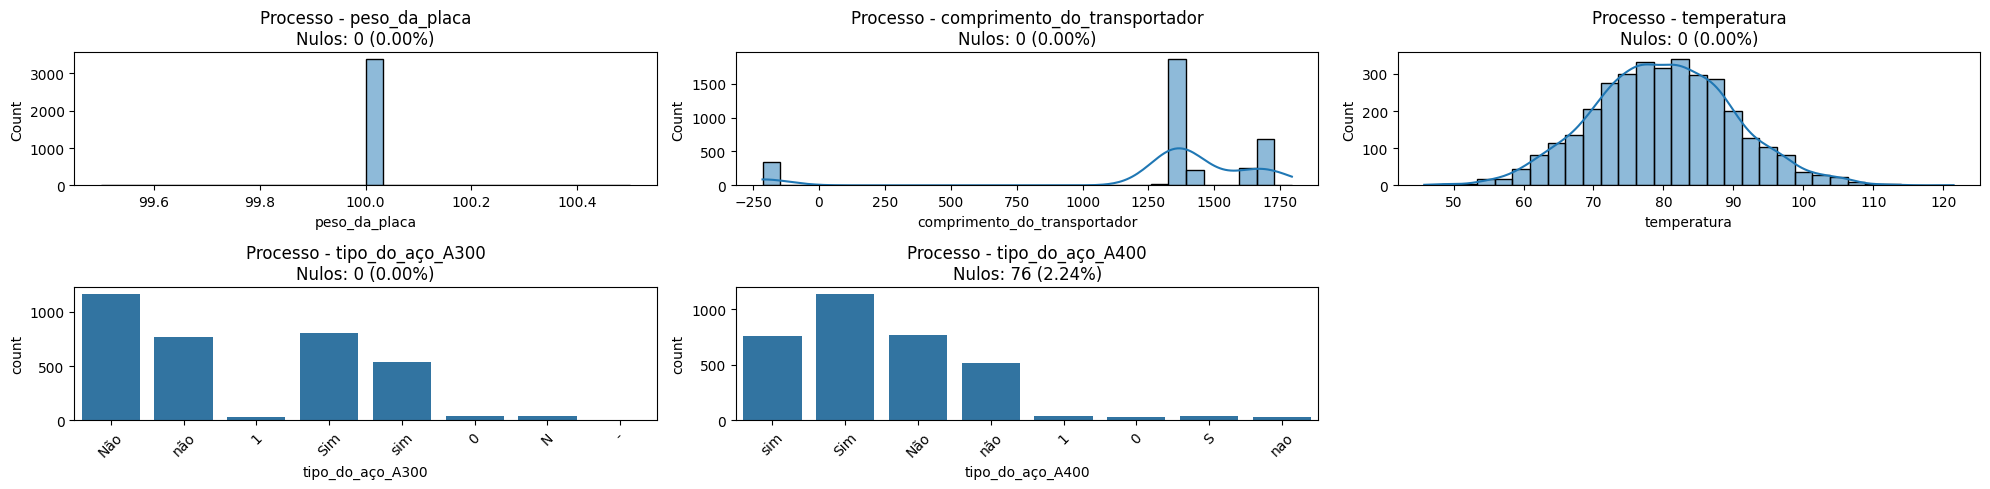

In [18]:

plt.figure(figsize=(20, 5))
for i, col in enumerate(['peso_da_placa', 'comprimento_do_transportador',
                         'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400'], 1):
    plt.subplot(2, 3, i)
    if pd.api.types.is_numeric_dtype(train[col]):
        sns.histplot(train[col], kde=True, bins=30)
        # Cálculo de nulos
        num_nulls = train[col].isnull().sum()
        percentage_nulls = (num_nulls / len(train)) * 100
        plt.title(f"Processo - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)")
    else:
        sns.countplot(x=train[col])
        # Cálculo de nulos
        num_nulls = train[col].isnull().sum()
        percentage_nulls = (num_nulls / len(train)) * 100
        plt.title(f"Processo - {col}\nNulos: {num_nulls} ({percentage_nulls:.2f}%)")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [19]:
# Medidas descritivas
print(train[['peso_da_placa', 'comprimento_do_transportador', 'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400']].describe())

# Verificar por valores nulos
print("\nValores nulos:")
print(train[['peso_da_placa', 'comprimento_do_transportador', 'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400']].isnull().sum())

# Verificar por duplicados
print("\nDuplicados:")
print(train.duplicated(subset=['peso_da_placa', 'comprimento_do_transportador', 'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400']).sum())


       peso_da_placa  comprimento_do_transportador  temperatura
count         3390.0                   3390.000000  3390.000000
mean           100.0                   1293.171681    79.924760
std              0.0                    521.109121    10.000343
min            100.0                   -214.000000    45.801848
25%            100.0                   1356.000000    73.137252
50%            100.0                   1362.000000    79.785356
75%            100.0                   1634.000000    86.593446
max            100.0                   1794.000000   121.478951

Valores nulos:
peso_da_placa                    0
comprimento_do_transportador     0
temperatura                      0
tipo_do_aço_A300                 0
tipo_do_aço_A400                76
dtype: int64

Duplicados:
0


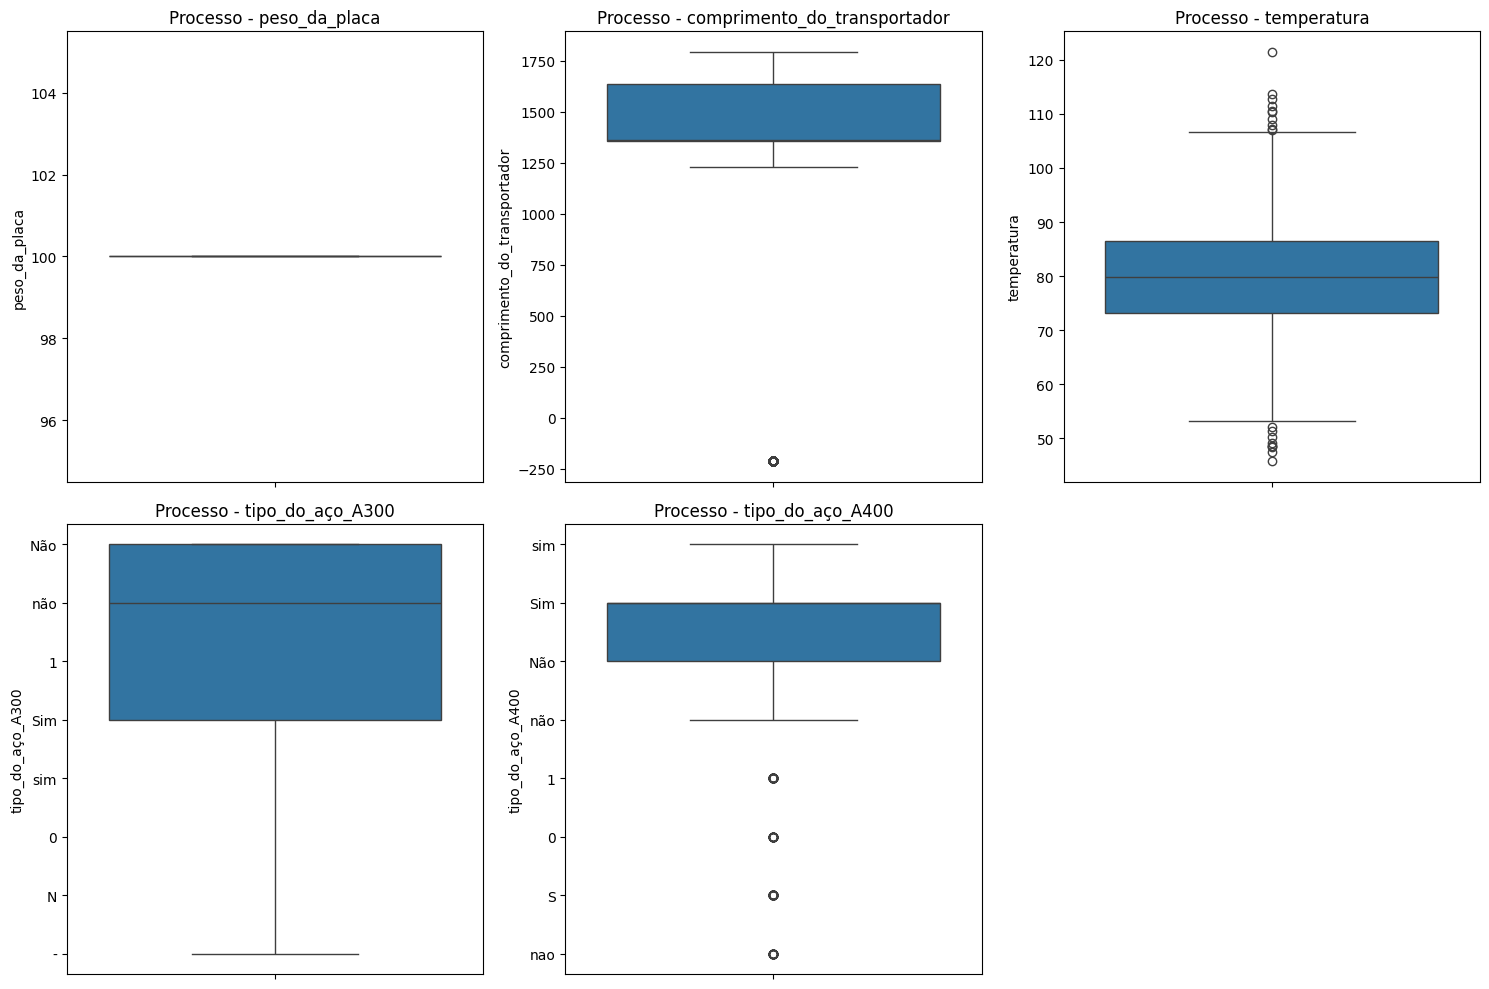

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
# Changed subplot grid to 2x3 to accommodate 5 plots + colorbar
for i, col in enumerate(['peso_da_placa', 'comprimento_do_transportador',
                         'temperatura', 'tipo_do_aço_A300', 'tipo_do_aço_A400'], 1):
    plt.subplot(2, 3, i)
    # Removed kde and bins arguments as they are not applicable to boxplot
    sns.boxplot(train[col])
    plt.title(f"Processo - {col}")
plt.tight_layout()
plt.show()

Comentários:
Essa categoria abrange características do processo de laminação e do material:

### Temperatura  
- A temperatura segue aproximadamente uma **distribuição normal** em torno de **~80°C**.  
- Média: **79,9°C**, Desvio padrão: **~10°C**.  
- A maioria dos valores se concentra entre **~60°C e 100°C**, com pico entre **75–85°C**.  
- Outliers:
  - Mínimo: **~45,8°C**  
  - Máximo: **~121,5°C** – possíveis valores fora do processo típico.  

**Figura 1:** Histograma da temperatura do processo, aproximadamente simétrico em torno de **80°C**. Valores muito altos (>100°C) são raros e poderiam ser investigados como outliers.  

---

### Tipo do Aço (A300 e A400)  
- Variáveis binárias indicando a classe do aço.  
- Após correção, distribuição:  
  - **A300**: **~40,4%**  
  - **A400**: **~59,6%**  
- As variáveis são essencialmente complementares, com **correlação de -0,999**, sugerindo que uma delas é redundante.  
- Anomalia: 1 registro com ambos os valores **0**, indicando um tipo não identificado ou erro.  

---

### Espessura da Chapa de Aço  
- Espessura varia bastante, com valores típicos de **40, 50, 60, 70, 80 mm**.  
- Distribuição assimétrica à direita:  
  - Média: **~53 mm**  
  - Mediana: **60 mm**  
  - Máximo: **300 mm** – chapas excepcionalmente grossas.  
- Outliers:
  - Valor negativo: **-154 mm** – claramente inválido e tratado posteriormente.  
  - Espessuras intermediárias não padrão: **143, 185, 211 mm**.  
- A maioria das chapas tem espessura **≤ 100 mm**, com apenas algumas exceções muito grossas.  

---

### Comprimento do Transportador  
- Representa possivelmente a posição ou comprimento da esteira no momento do defeito.  
- Dois grupos de valores:  
  - Primeira faixa: **~1350–1365 mm** (mediana: **1362 mm**).  
  - Segunda faixa: **até 1794 mm** – pode indicar seções ou transportadores diferentes.  
- Média: **~1293 mm**, Desvio: **~521 mm**.  
- Outlier negativo: **-214 mm**, provavelmente erro de sinal ou entrada incorreta.  

---

### Peso da Placa  
- Constante em **100** para todas as observações, tornando-se uma coluna redundante e sem valor analítico.  

---

### Resumo  
- As variáveis de processo/material seguem padrões consistentes, mas apresentam **anomalias notáveis**:  
  - Temperaturas extremas (>100°C),  
  - Espessura negativa,  
  - Comprimento do transportador negativo,  
  - Variáveis redundantes (peso constante, tipo de aço duplicado).  

Esses pontos indicam a necessidade de um tratamento de dados rigoroso antes da modelagem ou análise.


## 2.2 Análise Descritiva dos Rótulos de Falha

Os rótulos de falha estão codificados em colunas binárias **falha_1 a falha_6** e **falha_outros**, indicando o tipo de defeito presente em cada chapa. Cada observação possui **exatamente um tipo de falha marcado como 1** (os demais são **0**).  


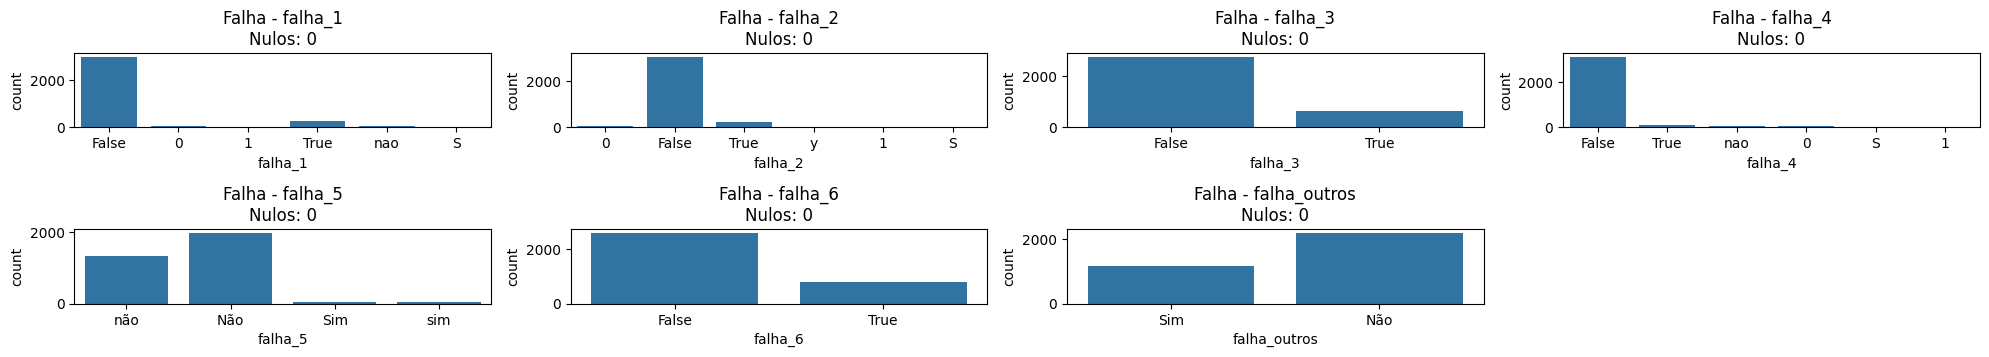

In [21]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'], 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=train[col])

    # Calculate and display the number of null values
    num_nulls = train[col].isnull().sum()
    plt.title(f"Falha - {col}\nNulos: {num_nulls}")

plt.tight_layout()
plt.show()


Comentários:

# **3. Correção de Dados Categóricos**

Nesta etapa, vamos identificar e tratar possíveis dados inconsistentes, començando pelas falhas.

### 3.1 Correções das categorias:
- Falhas
- Tipo aço

In [22]:
# Padronização de texto
train['tipo_do_aço_A300'] = train['tipo_do_aço_A300'].astype(str).str.lower().str.strip()
train['tipo_do_aço_A400'] = train['tipo_do_aço_A400'].astype(str).str.lower().str.strip()

train['tipo_do_aço_A300'] = train['tipo_do_aço_A300'].replace('-', pd.NA)

falha_columns = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
train[falha_columns] = train[falha_columns].apply(lambda x: x.astype(str).str.lower().str.strip())

# Mapeamento binário
mapping = {
    'sim': 1, 's': 1, 'true': 1, '1': 1, 'y': 1,
    'não': 0, 'nao': 0, 'n': 0, 'false': 0, '0': 0
}

In [23]:
# Aplicação do mapeamento nas colunas de falha
train[falha_columns] = train[falha_columns].replace(mapping).fillna(0).astype(int)

<ipython-input-23-1cf03aff804f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[falha_columns] = train[falha_columns].replace(mapping).fillna(0).astype(int)


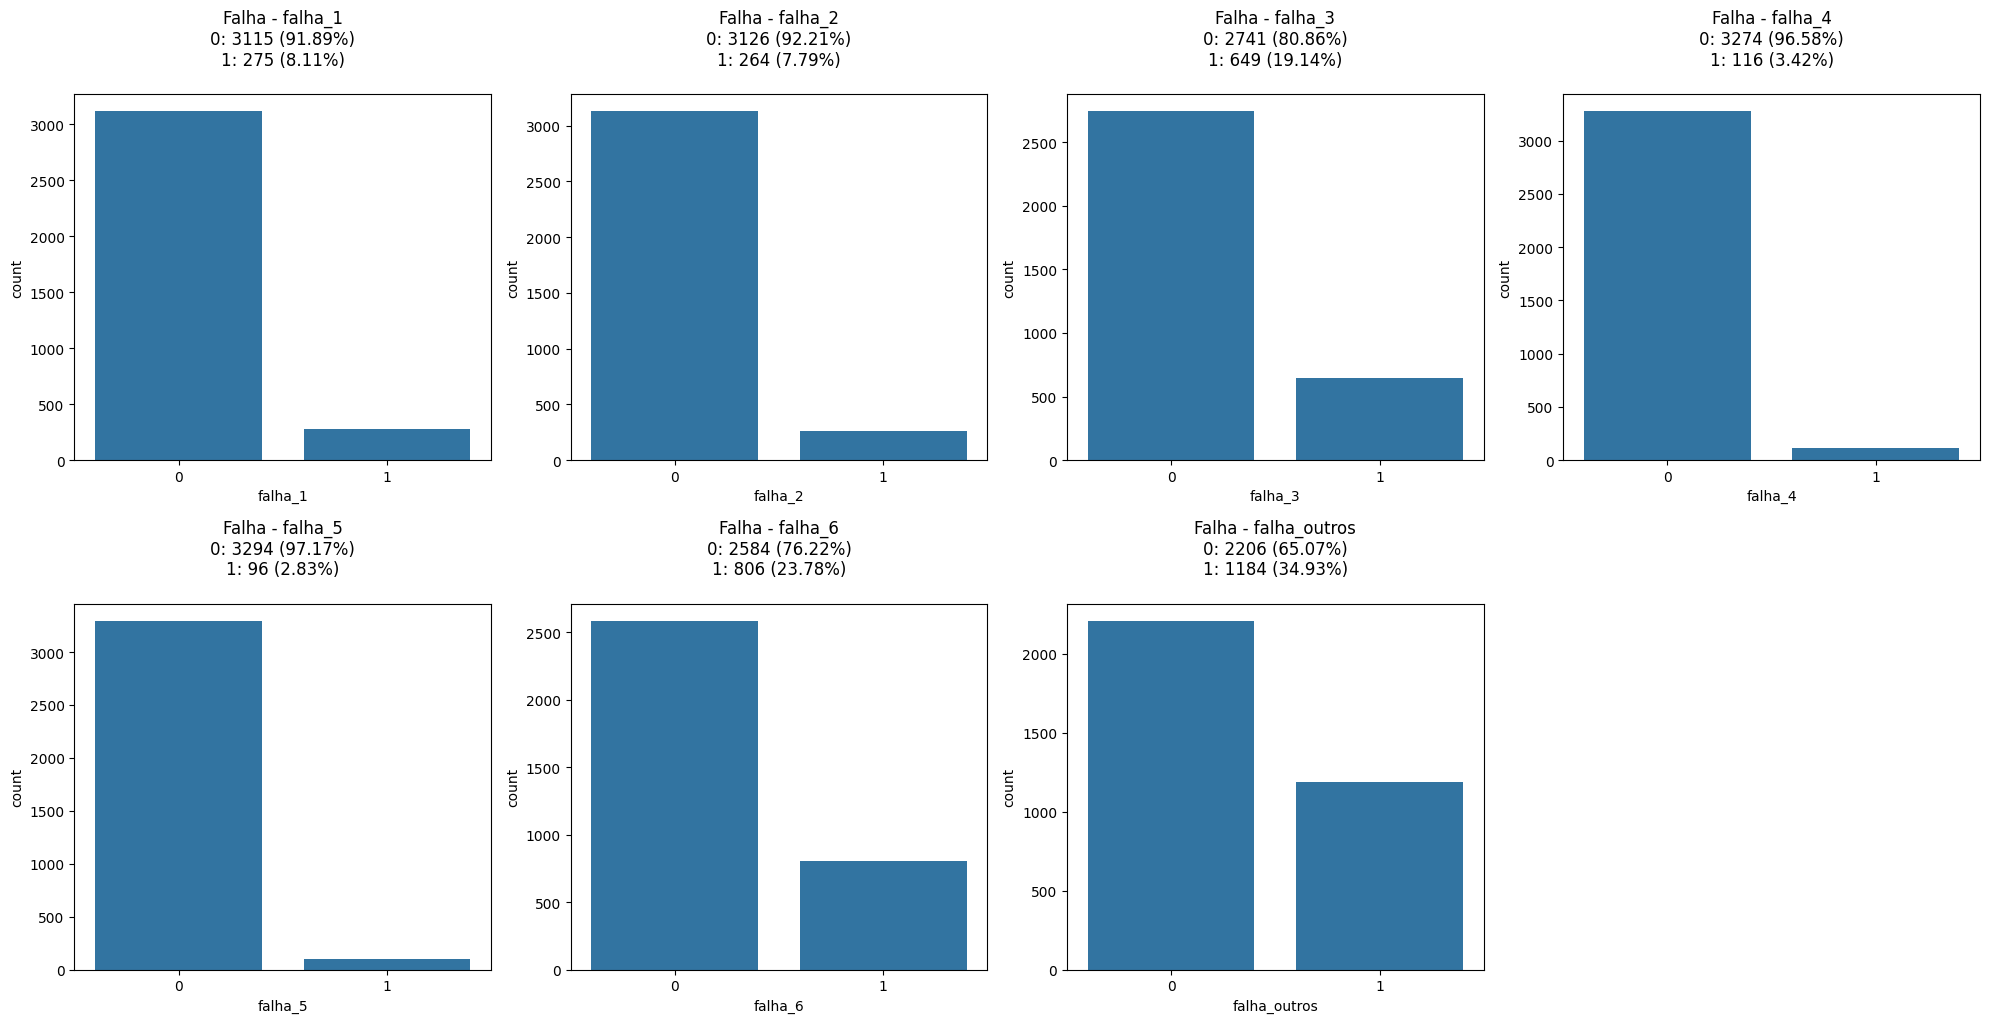

In [24]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'], 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=train[col])

    # Calculate value counts and percentages
    value_counts = train[col].value_counts()
    value_percentages = (value_counts / len(train)) * 100

    # Create title string with information
    title_str = f"Falha - {col}\n"
    #title_str += f"Nulos: {num_nulls} ({percentage_nulls:.2f}%)\n"
    for value, count in value_counts.items():
      title_str += f"{value}: {count} ({value_percentages[value]:.2f}%)\n"

    plt.title(title_str)

plt.tight_layout()
plt.show()


In [25]:
# Aplicação do mapeamento nas colunas de tipo de aço
train['tipo_do_aço_A300'] = train['tipo_do_aço_A300'].replace(mapping)
train['tipo_do_aço_A400'] = train['tipo_do_aço_A400'].replace(mapping)


In [26]:
# Tratamento cruzado para nulos
# Primeiro, trata A300 com base em A400
train['tipo_do_aço_A300'] = train['tipo_do_aço_A300'].fillna(
    train['tipo_do_aço_A400'].apply(lambda x: 0 if x == 1 else 1)
)

# Depois, trata A400 com base em A300 (garantindo que ambos sejam preenchidos)
train['tipo_do_aço_A400'] = np.where(train['tipo_do_aço_A300'] == 1, 0, 1)


# train['tipo_do_aço_A400'] = train['tipo_do_aço_A400'].fillna(
#     train['tipo_do_aço_A300'].apply(lambda x: 0 if x == 1 else 1)
# )

<ipython-input-26-1b7fbb2a9e73>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['tipo_do_aço_A300'] = train['tipo_do_aço_A300'].fillna(


In [27]:
# Conversão final para categoria
train['tipo_do_aço_A300'] = pd.to_numeric(train['tipo_do_aço_A300'], errors='coerce').astype('int').astype('category')
train['tipo_do_aço_A400'] = pd.to_numeric(train['tipo_do_aço_A400'], errors='coerce').astype('int').astype('category')

for i, col in enumerate(['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros'], 1):
    train[col] = pd.to_numeric(train[col], errors='coerce').astype('int').astype('category')


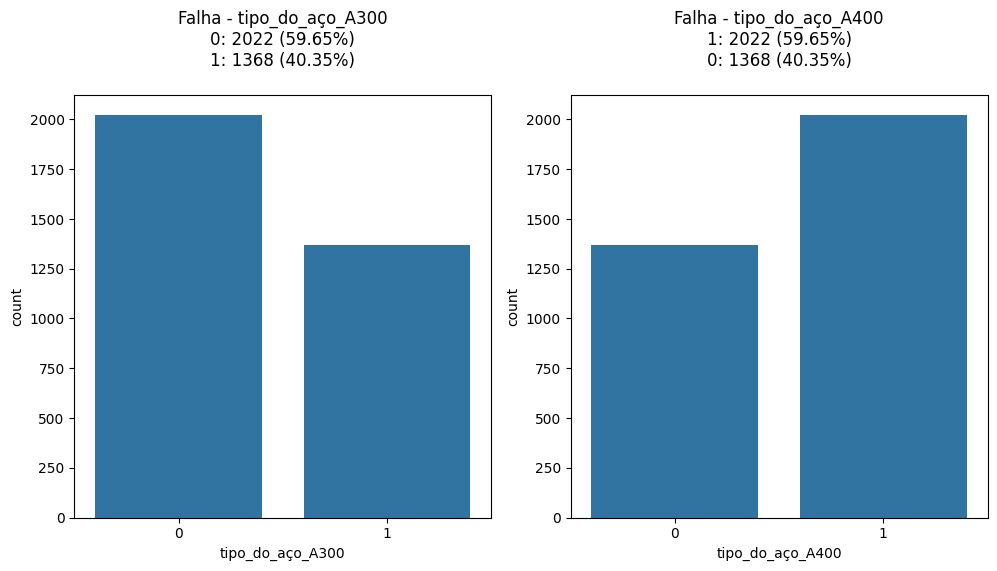

In [28]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(['tipo_do_aço_A300', 'tipo_do_aço_A400'], 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=train[col])

    # Calculate value counts and percentages
    value_counts = train[col].value_counts()
    value_percentages = (value_counts / len(train)) * 100

    # Create title string with information
    title_str = f"Falha - {col}\n"
    #title_str += f"Nulos: {num_nulls} ({percentage_nulls:.2f}%)\n"
    for value, count in value_counts.items():
      title_str += f"{value}: {count} ({value_percentages[value]:.2f}%)\n"

    plt.title(title_str)

plt.tight_layout()
plt.show()

Comentários:


Durante a etapa de limpeza, foram identificados e corrigidos **valores inconsistentes** nos dados categóricos binários, incluindo as colunas de **falhas (falha_1 a falha_outros)** e **tipo de aço (tipo_do_aço_A300, tipo_do_aço_A400)**.  

---

  **1. Problema Inicial**  

- Os valores categóricos apresentavam múltiplas variações para representar **verdadeiro/falso**, tais como:  
  - `"Sim", "sim", "Não", "não", "True", "False", "S", "N", "1", "0"`.  
- Em alguns casos, essas variações **coexistiam na mesma coluna**, dificultando a análise.  

---

  **2. Padronização de Texto**  

- Todos os valores foram convertidos para **caixa baixa (lowercase)** e **espaços em branco extras foram removidos**.  
- Exemplos de conversão:  
  - `"Sim"` → `"sim"`  
  - `"False "` → `"false"`  

---

  **3. Mapeamento para 0/1**

- Foi implementado um **mapeamento explícito** para converter os valores em binários (`0` ou `1`):  
  - Mapeados para **1**: `"sim"`, `"s"`, `"true"`, `"1"`, `"y"`  
  - Mapeados para **0**: `"não"`, `"nao"`, `"n"`, `"false"`, `"0"`  

- Aplicação do mapeamento:  
  - **Colunas de falha (falha_1 a falha_outros)** e **colunas de tipo de aço (A300, A400)** foram convertidas para **binários consistentes (0/1)**.  

---

  **4. Tratamento de Valores Não Mapeáveis**

- Alguns valores raros não se encaixavam no mapeamento:  
  - **6 registros** em `tipo_do_aço_A300` continham o símbolo `"-"` (traço), sugerindo **dado ausente ou não aplicável**.  
    - Solução:  
      - Se `A300` era `"-"` e `A400 = 1`, atribuímos `A300 = 0`.  
      - Se `A400 = 0`, atribuímos `A300 = 1`.  
  - **76 registros** onde `tipo_do_aço_A400` estava vazio (`NaN`) enquanto `A300` tinha valor:  
    - Solução similar:  
      - Se `A300 = 1`, atribuimos `A400 = 0`.  
      - Se `A300 = 0`, atribuimos `A400 = 1`.  
---

 5. Resultados da Limpeza  

- Após a correção, todas as colunas de falha (`falha_1 ... falha_outros`) foram padronizadas e passaram a conter **apenas 0 ou 1**, sem valores ausentes.  
- As colunas `A300` e `A400` foram **preenchidas com 0/1**, mantendo a exclusividade (ou uma chapa é `A300` ou `A400`).  
- A aplicação do mapeamento e o tratamento de valores não mapeáveis resultaram em um **dataset mais homogêneo e consistente**, facilitando a análise e a modelagem.  


### 3.2 Correções das variáveis numéricas:
- Valores negativos que por definição não podem ser negativos


A tabela a seguir resume a quantidade e a porcentagem de linhas com **valores negativos** em cada coluna do dataset:  

| **Coluna**                  | **# Linhas < 0** | **% do Dataset** |
|-----------------------------|------------------|------------------|
| x_minimo                   | 339              | 10.0%           |
| y_minimo                   | 339              | 10.0%           |
| x_maximo                   | 333              | 9.8%            |
| y_maximo                   | 339              | 10.0%           |
| area_pixels                | 339              | 10.0%           |
| perimetro_x                | 339              | 10.0%           |
| perimetro_y                | 339              | 10.0%           |
| comprimento_do_transportador | 339            | 10.0%           |
| espessura_da_chapa_de_aço  | 338              | 10.0%           |

---

### **Observações e Análise**  

Todas essas grandezas representam medidas físicas absolutas (posições, comprimentos, áreas, espessuras). Qualquer valor negativo indica erro de aquisição.

In [29]:
# Filtrando os casos
columns_to_check = ['x_minimo', 'y_minimo', 'x_maximo', 'y_maximo', 'area_pixels',
                    'perimetro_x', 'perimetro_y', 'comprimento_do_transportador',
                    'espessura_da_chapa_de_aço']

# Análise conclusiva da remoção de dados negativos do DataFrame

# 1. Impacto na quantidade de dados:
print(f"Total de linhas antes da remoção de valores negativos: {len(train)}")
train_sem_negativos = train[(train[columns_to_check] >= 0).all(axis=1)]
print(f"Total de linhas após a remoção de valores negativos: {len(train_sem_negativos)}")
print(f"Número de linhas removidas: {len(train) - len(train_sem_negativos)}")

# 2. Impacto na distribuição das classes de falhas:
print("\nDistribuição das classes de falhas antes da remoção:")
print(train[falha_columns].astype(int).sum())
print("\nDistribuição das classes de falhas depois da remoção:")
print(train_sem_negativos[falha_columns].astype(int).sum())
print("\nA remoção dos dados negativos afeta significativamente a quantidade de dados. Por conta do tempo vamos usar uma abordagem simples: Substituir os valores por null, para ser tratado na etapa de valores nulos.")

# Conclusão:
# A remoção dos dados negativos afeta significativamente a quantidade de dados. Por conta do tempo vamos usar uma abordagem simples: Substituir os valores por null, para ser tratado na etapa de valores nulos.



Total de linhas antes da remoção de valores negativos: 3390
Total de linhas após a remoção de valores negativos: 1275
Número de linhas removidas: 2115

Distribuição das classes de falhas antes da remoção:
falha_1          275
falha_2          264
falha_3          649
falha_4          116
falha_5           96
falha_6          806
falha_outros    1184
dtype: int64

Distribuição das classes de falhas depois da remoção:
falha_1         103
falha_2         102
falha_3         244
falha_4          44
falha_5          34
falha_6         303
falha_outros    445
dtype: int64

A remoção dos dados negativos afeta significativamente a quantidade de dados. Por conta do tempo vamos usar uma abordagem simples: Substituir os valores por null, para ser tratado na etapa de valores nulos.


In [30]:
# Verificando os valores negativos por coluna
columns_to_check = ['x_minimo', 'y_minimo', 'x_maximo', 'y_maximo', 'area_pixels',
                    'perimetro_x', 'perimetro_y', 'comprimento_do_transportador',
                    'espessura_da_chapa_de_aço']

for col in columns_to_check:
  print(f"Valores negativos em:  '{col}':")
  print(train[train[col] < 0][col].value_counts())
  print("-" * 20)


Valores negativos em:  'x_minimo':
x_minimo
-11    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'y_minimo':
y_minimo
-20    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'x_maximo':
x_maximo
-186.0    333
Name: count, dtype: int64
--------------------
Valores negativos em:  'y_maximo':
y_maximo
-166    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'area_pixels':
area_pixels
-206    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'perimetro_x':
perimetro_x
-229    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'perimetro_y':
perimetro_y
-194    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'comprimento_do_transportador':
comprimento_do_transportador
-214    339
Name: count, dtype: int64
--------------------
Valores negativos em:  'espessura_da_chapa_de_aço':
espessura_da_chapa_de_aço
-154.0    338
Name: count, dtype: int64


In [31]:
df_parcial = train.copy()

In [32]:
# Substitua por null os valores negativos

# Substituindo valores negativos por nulos
for col in columns_to_check:
  df_parcial.loc[df_parcial[col] < 0, col] = np.nan


In [33]:
for col in columns_to_check:
  print(f"Valores negativos em:  '{col}':")
  print(df_parcial[df_parcial[col] < 0][col].value_counts())
  print("-" * 20)

Valores negativos em:  'x_minimo':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'y_minimo':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'x_maximo':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'y_maximo':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'area_pixels':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'perimetro_x':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'perimetro_y':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'comprimento_do_transportador':
Series([], Name: count, dtype: int64)
--------------------
Valores negativos em:  'espessura_da_chapa_de_aço':
Series([], Name: count, dtype: int64)
--------------------


Comentários:

- A estratégia adotada de substituir os valores negativos por NaN é uma solução temporária para permitir a continuidade da análise com métodos robustos a valores ausentes.  No entanto, a causa raiz desses erros deve ser investigada e corrigida na fonte de dados original.
- Para análises futuras e modelagem preditiva, a imputação de valores ausentes ou outras técnicas de tratamento de dados devem considerar cuidadosamente a natureza e a origem provável desses valores negativos.


# 4. Ajuste de Valores nulos

In [34]:
df_nulos = df_parcial.copy()


Variável: x_minimo
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 1107.341527368076
Mediana: 767.0
Minimo: 0.0
Maximo: 15266.0


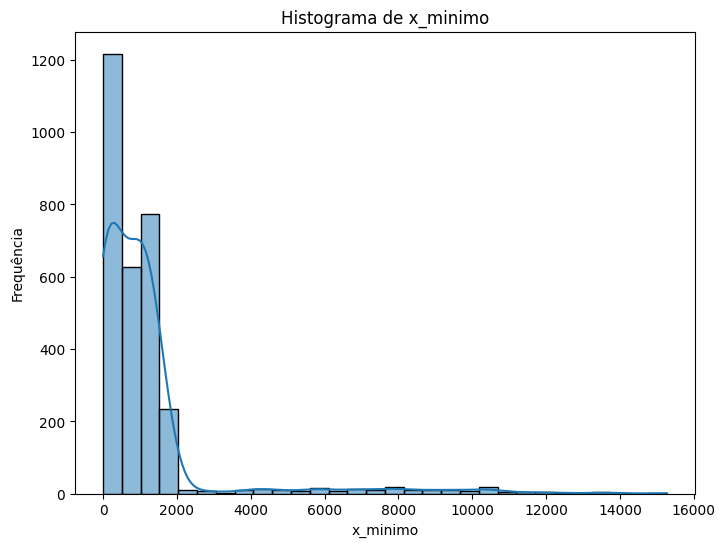


Variável: x_maximo
Tipo de dado: float64
Quantidade de valores nulos: 389
Media: 693.7717427524159
Mediana: 633.0
Minimo: 4.0
Maximo: 1713.0


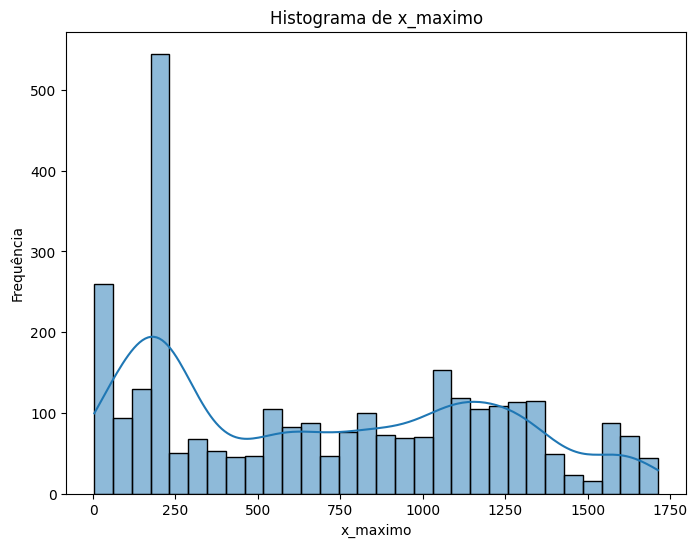


Variável: y_minimo
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 2991824.021960013
Mediana: 1457758.0
Minimo: 6712.0
Maximo: 104136555.0


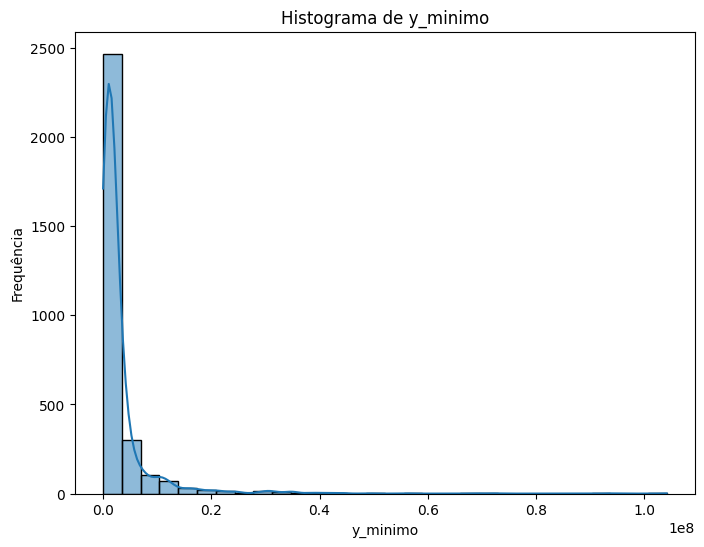


Variável: y_maximo
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 1769242.2150114716
Mediana: 1312948.0
Minimo: 6724.0
Maximo: 12917094.0


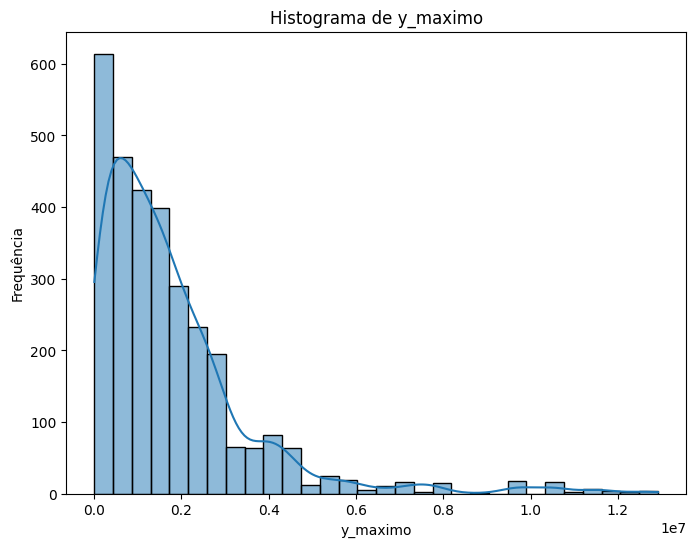


Variável: area_pixels
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 1763.2418879056047
Mediana: 168.0
Minimo: 2.0
Maximo: 152655.0


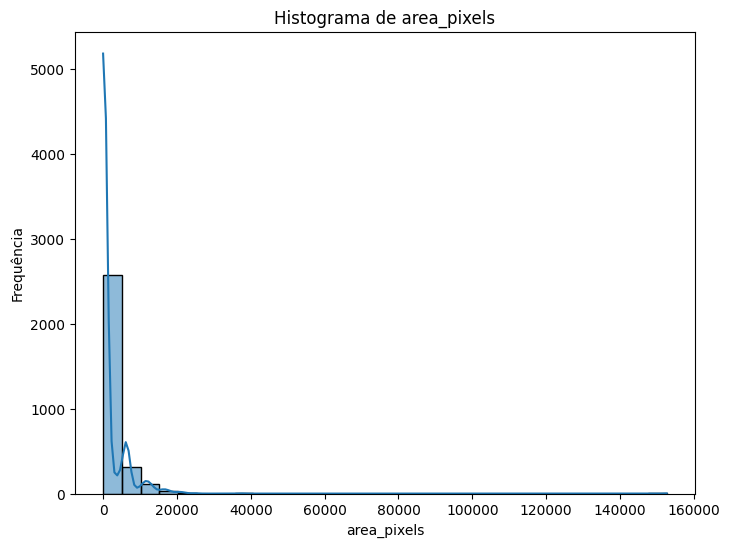


Variável: perimetro_x
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 99.593248115372
Mediana: 25.0
Minimo: 2.0
Maximo: 1275.0


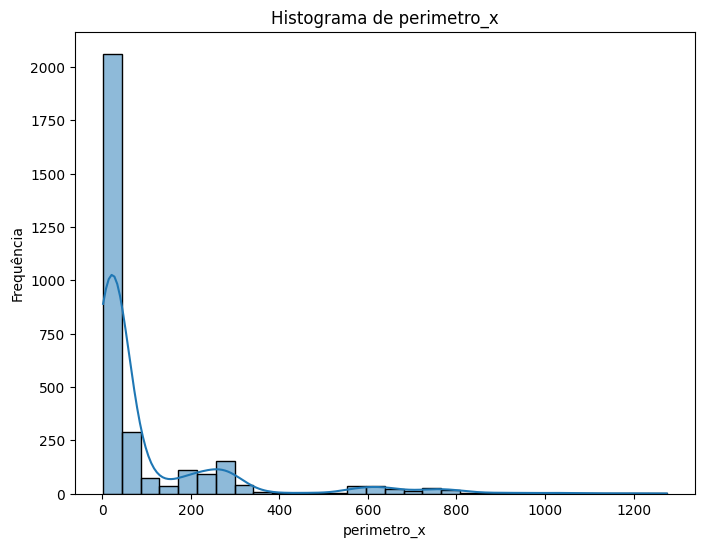


Variável: perimetro_y
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 74.06784660766962
Mediana: 24.0
Minimo: 2.0
Maximo: 18152.0


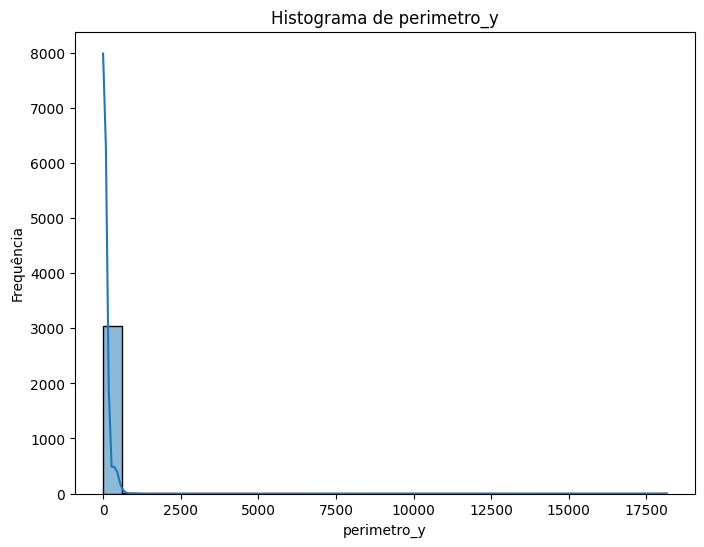


Variável: soma_da_luminosidade
Tipo de dado: float64
Quantidade de valores nulos: 100
Media: 193107.8659574468
Mediana: 17836.0
Minimo: 255.0
Maximo: 11591414.0


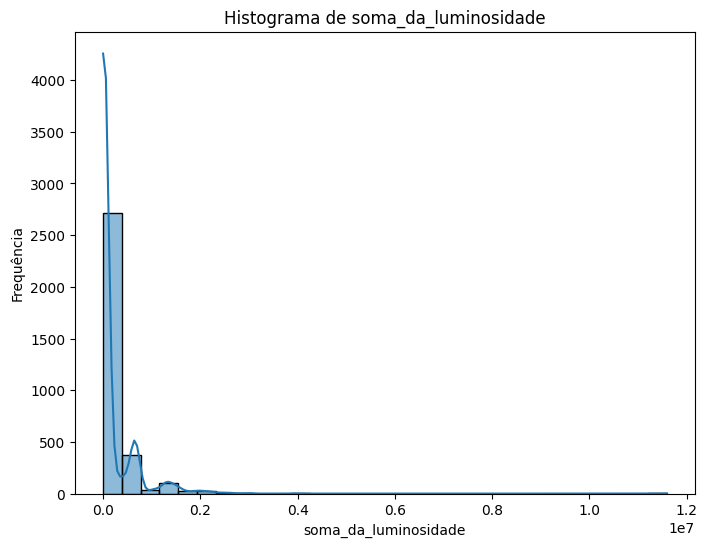


Variável: maximo_da_luminosidade
Tipo de dado: float64
Quantidade de valores nulos: 98
Media: 129.18742405832322
Mediana: 127.0
Minimo: 37.0
Maximo: 253.0


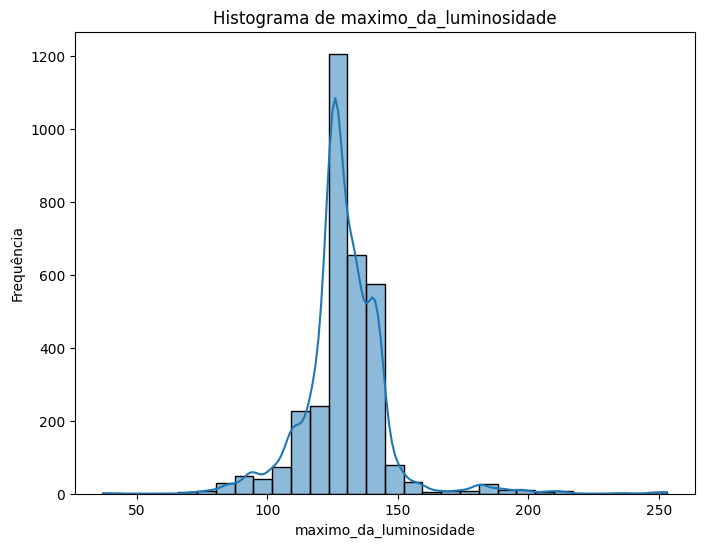


Variável: comprimento_do_transportador
Tipo de dado: float64
Quantidade de valores nulos: 339
Media: 1460.6352015732546
Mediana: 1364.0
Minimo: 1227.0
Maximo: 1794.0


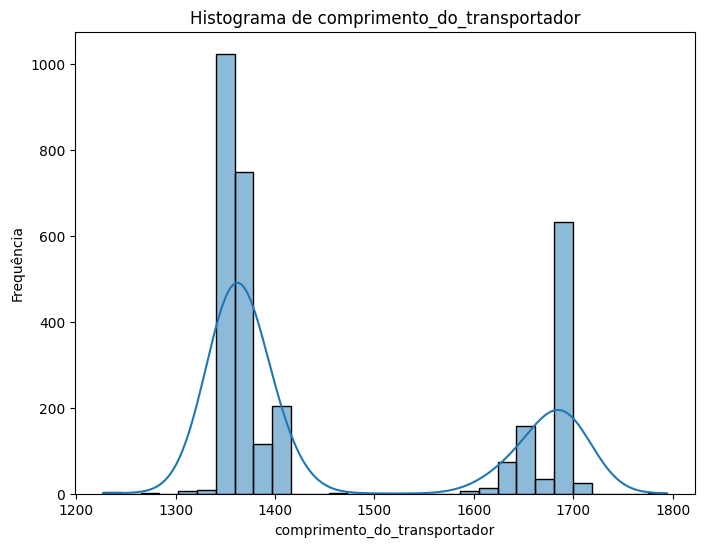


Variável: espessura_da_chapa_de_aço
Tipo de dado: float64
Quantidade de valores nulos: 379
Media: 76.38193291265361
Mediana: 70.0
Minimo: 40.0
Maximo: 300.0


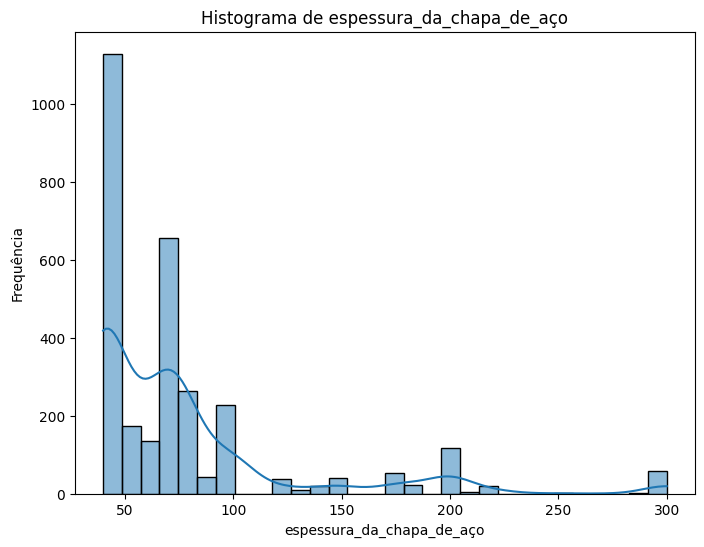


Variável: index_quadrado
Tipo de dado: float64
Quantidade de valores nulos: 36
Media: 0.5720687239117471
Mediana: 0.5454
Minimo: 0.0083
Maximo: 1.0


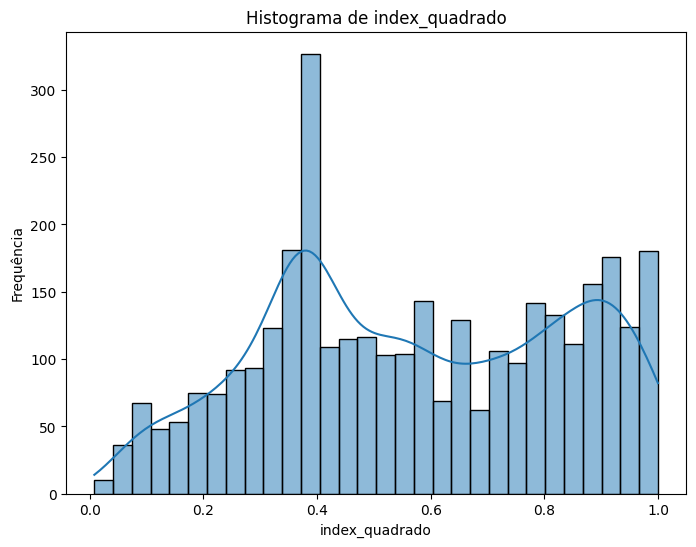


Variável: indice_global_externo
Tipo de dado: float64
Quantidade de valores nulos: 59
Media: 0.5890123086160313
Mediana: 1.0
Minimo: 0.0
Maximo: 1.0


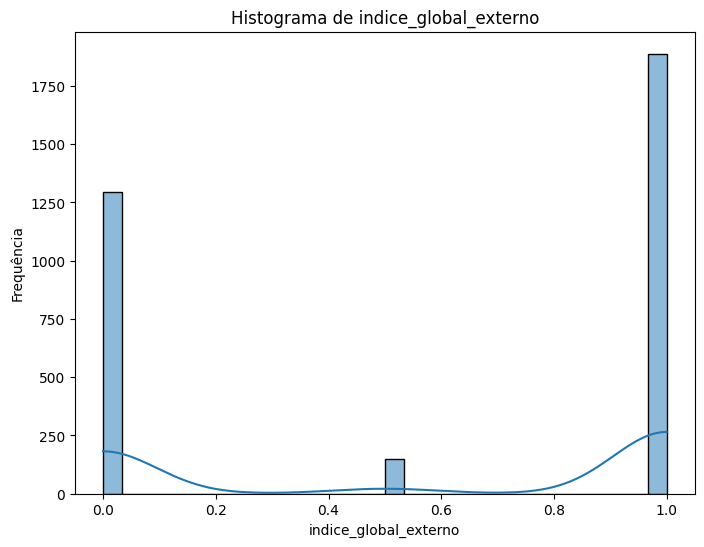


Variável: indice_de_luminosidade
Tipo de dado: float64
Quantidade de valores nulos: 50
Media: -0.13495682634730538
Mediana: -0.1408
Minimo: -0.8603
Maximo: 0.5917


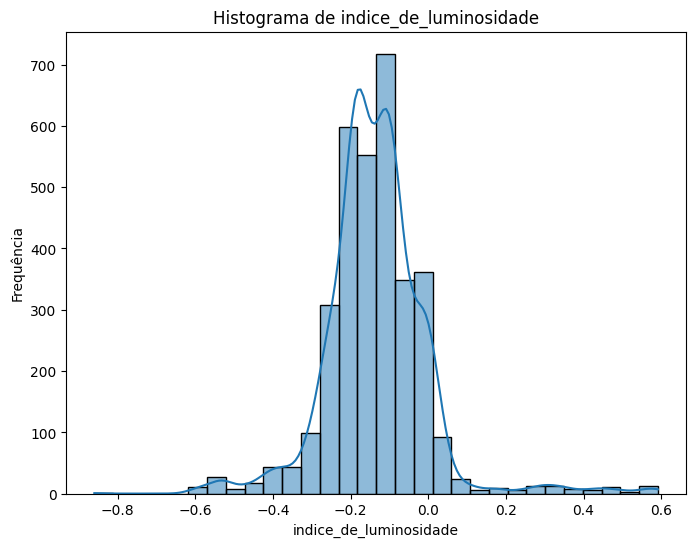

In [35]:
# Avaliando a distribuição e as medidas dos valores nulos

for col in df_nulos.columns:
    if df_nulos[col].isnull().any():
        print(f"\nVariável: {col}")
        print(f"Tipo de dado: {df_nulos[col].dtype}")
        print(f"Quantidade de valores nulos: {df_nulos[col].isnull().sum()}")
        # Lógica para avaliar o método de imputação
        if pd.api.types.is_numeric_dtype(df_nulos[col]):
            media  = df_nulos[col].mean()
            mediana = df_nulos[col].median()
            minimo = df_nulos[col].min()
            maximo = df_nulos[col].max()
            print(f"Media: {media}")
            print(f"Mediana: {mediana}")
            print(f"Minimo: {minimo}")
            print(f"Maximo: {maximo}")

            #Plot do histograma
            plt.figure(figsize=(8, 6))
            sns.histplot(df_nulos[col], kde=True, bins=30)
            plt.title(f'Histograma de {col}')
            plt.xlabel(col)
            plt.ylabel('Frequência')
            plt.show()


In [36]:
# Em Resumo, as colunas são:
colunas_nulas = df_nulos.isnull().sum()
total_colunas = colunas_nulas[colunas_nulas > 0]
print(f"Colunas com valores nulos: {len(total_colunas)}")
total_colunas


Colunas com valores nulos: 14


x_minimo                        339
x_maximo                        389
y_minimo                        339
y_maximo                        339
area_pixels                     339
perimetro_x                     339
perimetro_y                     339
soma_da_luminosidade            100
maximo_da_luminosidade           98
comprimento_do_transportador    339
espessura_da_chapa_de_aço       379
index_quadrado                   36
indice_global_externo            59
indice_de_luminosidade           50
dtype: int64

In [37]:
# Substituindo os valores nulos pela mediana das colunas
for col in total_colunas.index:
  if pd.api.types.is_numeric_dtype(df_nulos[col]):
    df_nulos[col] = df_nulos[col].fillna(df_nulos[col].median())


In [38]:
#Verificando se há valores nulos

colunas_nulas = df_nulos.isnull().sum()
total_colunas = colunas_nulas[colunas_nulas > 0]
print(f"Colunas com valores nulos: {len(total_colunas)}")
total_colunas

Colunas com valores nulos: 0


Series([], dtype: int64)

# 4. Ajuste de Valores Extremos (Outliers)
Dada a quantidade de outliers identificados, aplicamos uma estratégia de capping (limitação) usando a regra do IQR. Definimos os limites inferior e superior como:

Limite Inferior = Q1 – 1,5 × IQR

Limite Superior = Q3 + 1,5 × IQR

Aplicamos esse procedimento em todas as variáveis numéricas contínuas. Excluímos do ajuste variáveis de natureza categórica/binária (como tipo de aço e falhas) e aquelas sem variação (peso_da_placa).

In [39]:
df_outliers = df_nulos.copy()

In [40]:
df_outliers

id  x_minimo  x_maximo   y_minimo   y_maximo  peso_da_placa  \
0        0     154.0     169.0   260124.0   260136.0            100   
1        1    1121.0     633.0  1789332.0  1789337.0            100   
2        2      41.0     216.0  2708878.0  2708939.0            100   
3        3     129.0     157.0    86408.0    86427.0            100   
4        4     436.0     442.0  4959398.0   530985.0            100   
...    ...       ...       ...        ...        ...            ...   
3385  3385     779.0     802.0   402237.0   402266.0            100   
3386  3386      41.0     188.0   327823.0   327870.0            100   
3387  3387     823.0     834.0   323844.0   323852.0            100   
3388  3388    9505.0     633.0   949856.0   949874.0            100   
3389  3389    1181.0    1191.0  1146871.0  1146879.0            100   

      area_pixels  perimetro_x  perimetro_y  soma_da_luminosidade  \
0            75.0         27.0         17.0                9948.0   
1           168.0          9.0         24.0                2240.0   
2          6298.0        275.0        134.0              654634.0   
3           276.0         39.0         26.0               33858.0   
4            63.0         17.0         17.0                6374.0   
...           ...          ...          ...                   ...   
3385        755.0        177.0         17.0                 764.0   
3386       3437.0        248.0        116.0              354240.0   
3387        135.0         20.0         24.0               14169.0   
3388        168.0         29.0         26.0               17836.0   
3389         12.0          5.0          5.0                1585.0   

      maximo_da_luminosidade  comprimento_do_transportador tipo_do_aço_A300  \
0                      143.0                        1364.0                0   
1                      150.0                        1364.0                0   
2                      126.0                        1358.0                0   
3                      135.0                        1362.0                0   
4                      116.0                        1356.0                1   
...                      ...                           ...              ...   
3385                   127.0                        1360.0                0   
3386                   143.0                        1360.0                0   
3387                   132.0                        1650.0                1   
3388                   134.0                        1364.0                0   
3389                   141.0                        1358.0                0   

     tipo_do_aço_A400  espessura_da_chapa_de_aço  temperatura  \
0                   1                       40.0    80.799570   
1                   1                       50.0    79.790721   
2                   1                       40.0    80.871970   
3                   1                       40.0    77.482247   
4                   0                       70.0    73.854550   
...               ...                        ...          ...   
3385                1                       40.0    95.422194   
3386                1                       40.0    89.777382   
3387                0                       80.0    76.502729   
3388                1                       70.0    72.926750   
3389                1                       50.0    79.587061   

      index_de_bordas  index_vazio  index_quadrado  index_externo_x  \
0              0.2258       0.5833          0.8000           0.0110   
1              0.3412       0.5143          0.7143           0.0052   
2              0.0604       0.4100          0.3486           0.1289   
3              0.1894       0.4812          0.6786           0.0206   
4              0.6431       0.3823          0.3529           0.0044   
...               ...          ...             ...              ...   
3385           0.8232       0.3972          0.4545           0.0978   
3386           0.0605       

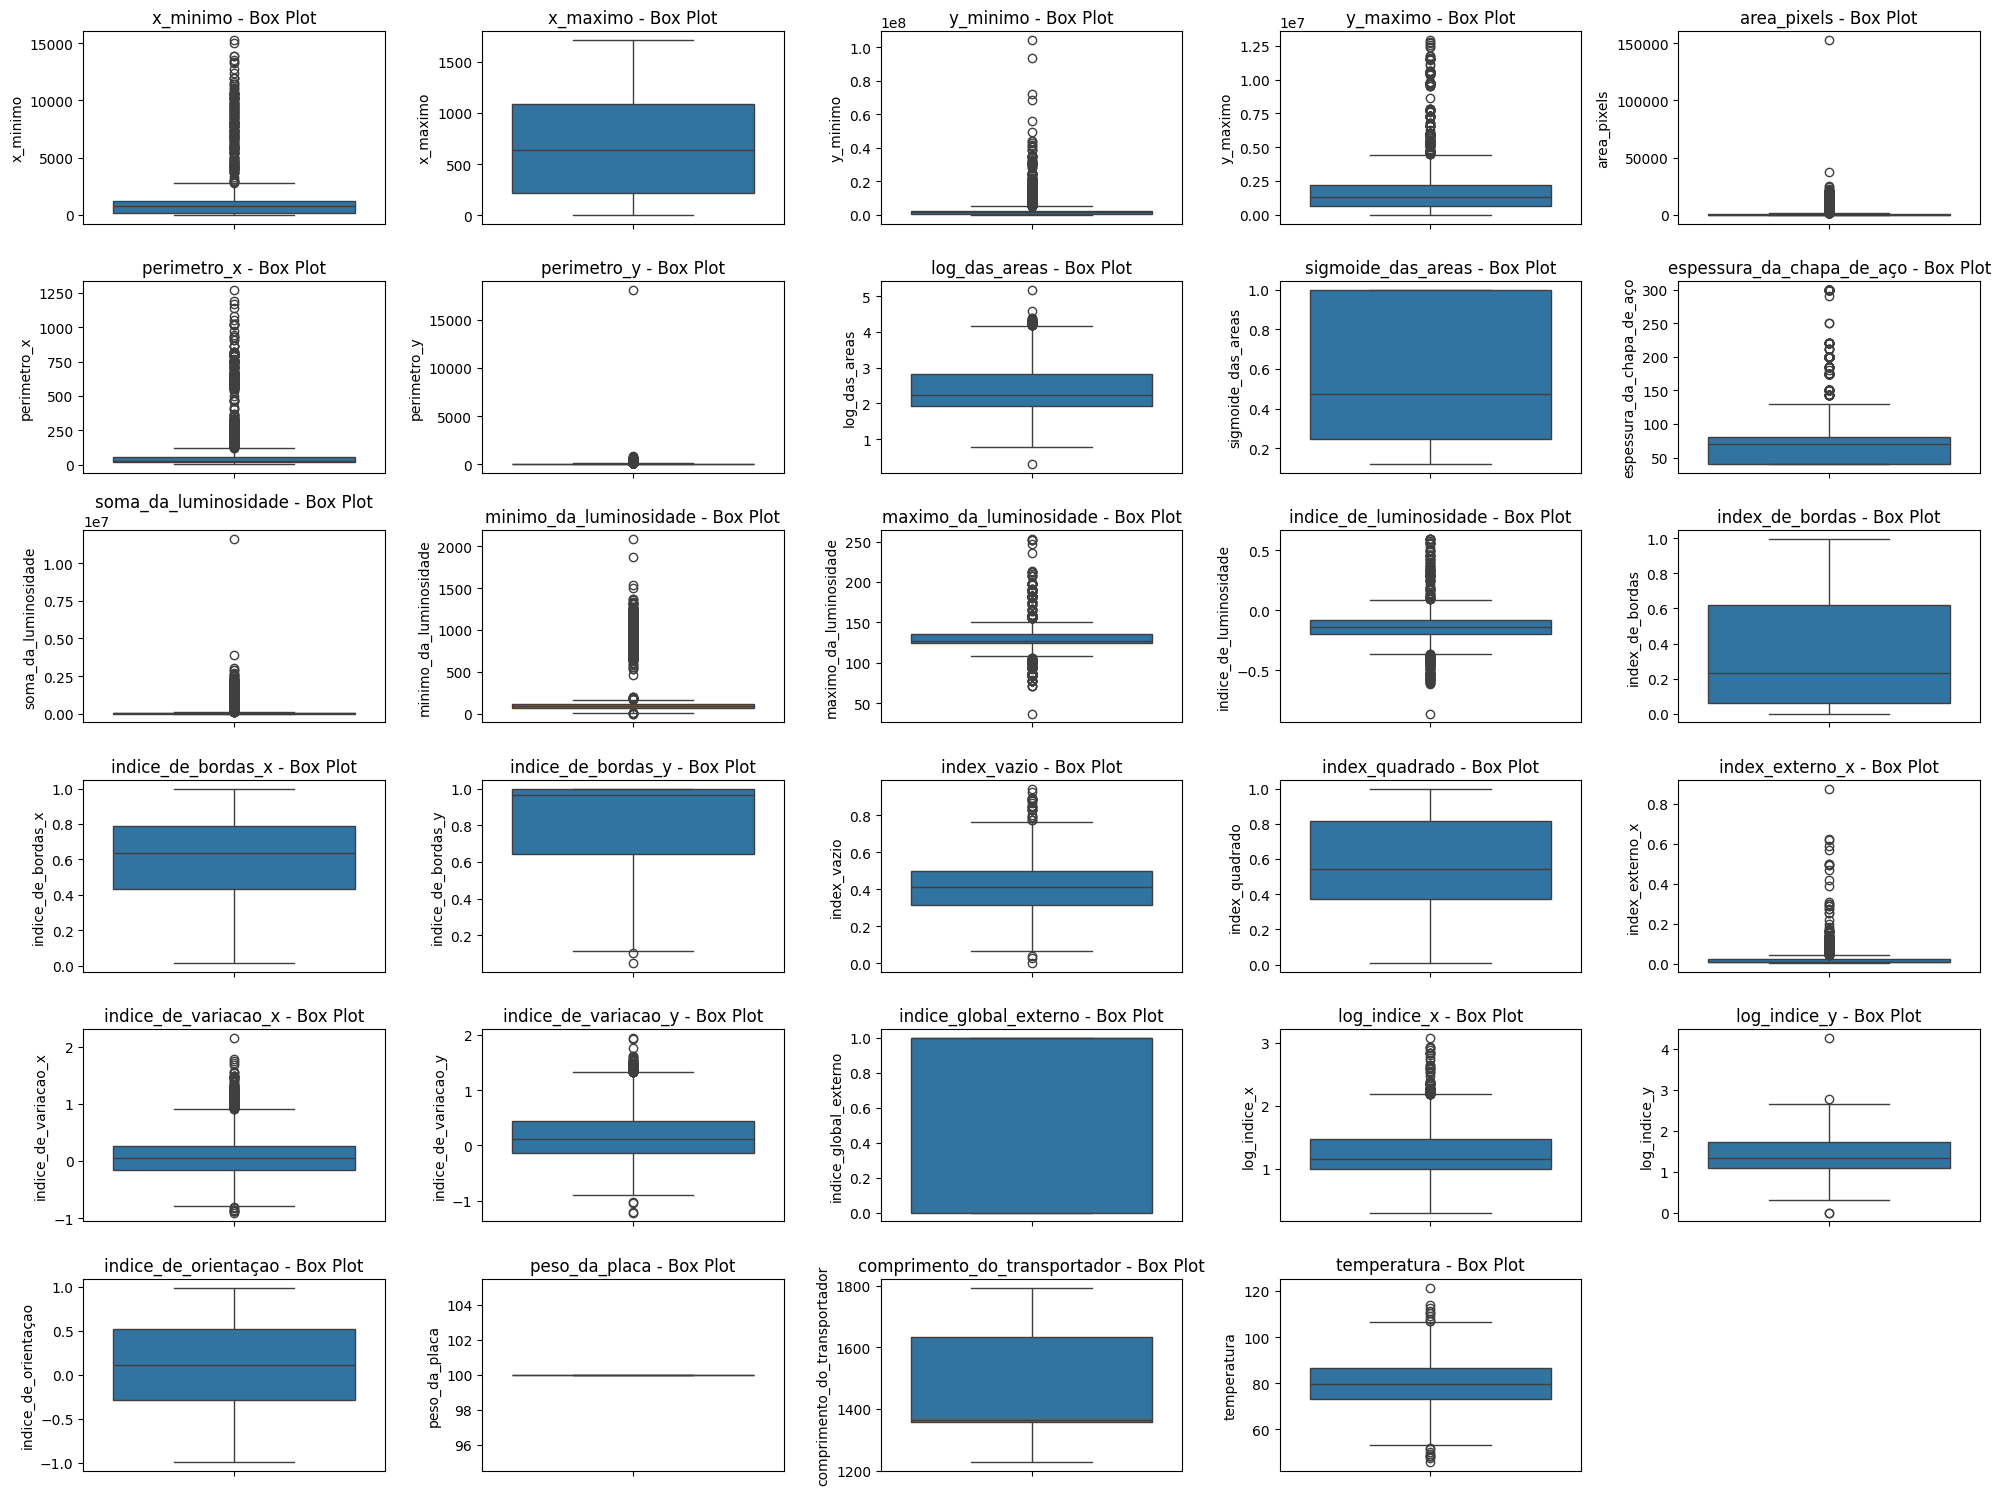

In [41]:
# prompt: df_outliers verifique o box plot das variaveis não categoricas

import matplotlib.pyplot as plt
# Box plot for non-categorical variables
# List of numerical columns to treat for outliers (excluding categorical/binary and constant columns)
numerical_cols = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y',
                  'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço', 'soma_da_luminosidade',
                  'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade', 'index_de_bordas',
                  'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio', 'index_quadrado', 'index_externo_x',
                  'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo', 'log_indice_x',
                  'log_indice_y', 'indice_de_orientaçao', 'peso_da_placa', 'comprimento_do_transportador', 'temperatura']


plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 5, i)  # Adjusted subplot grid to accommodate all columns
    sns.boxplot(y=df_outliers[col])
    plt.title(f"{col} - Box Plot")
plt.tight_layout()
plt.show()


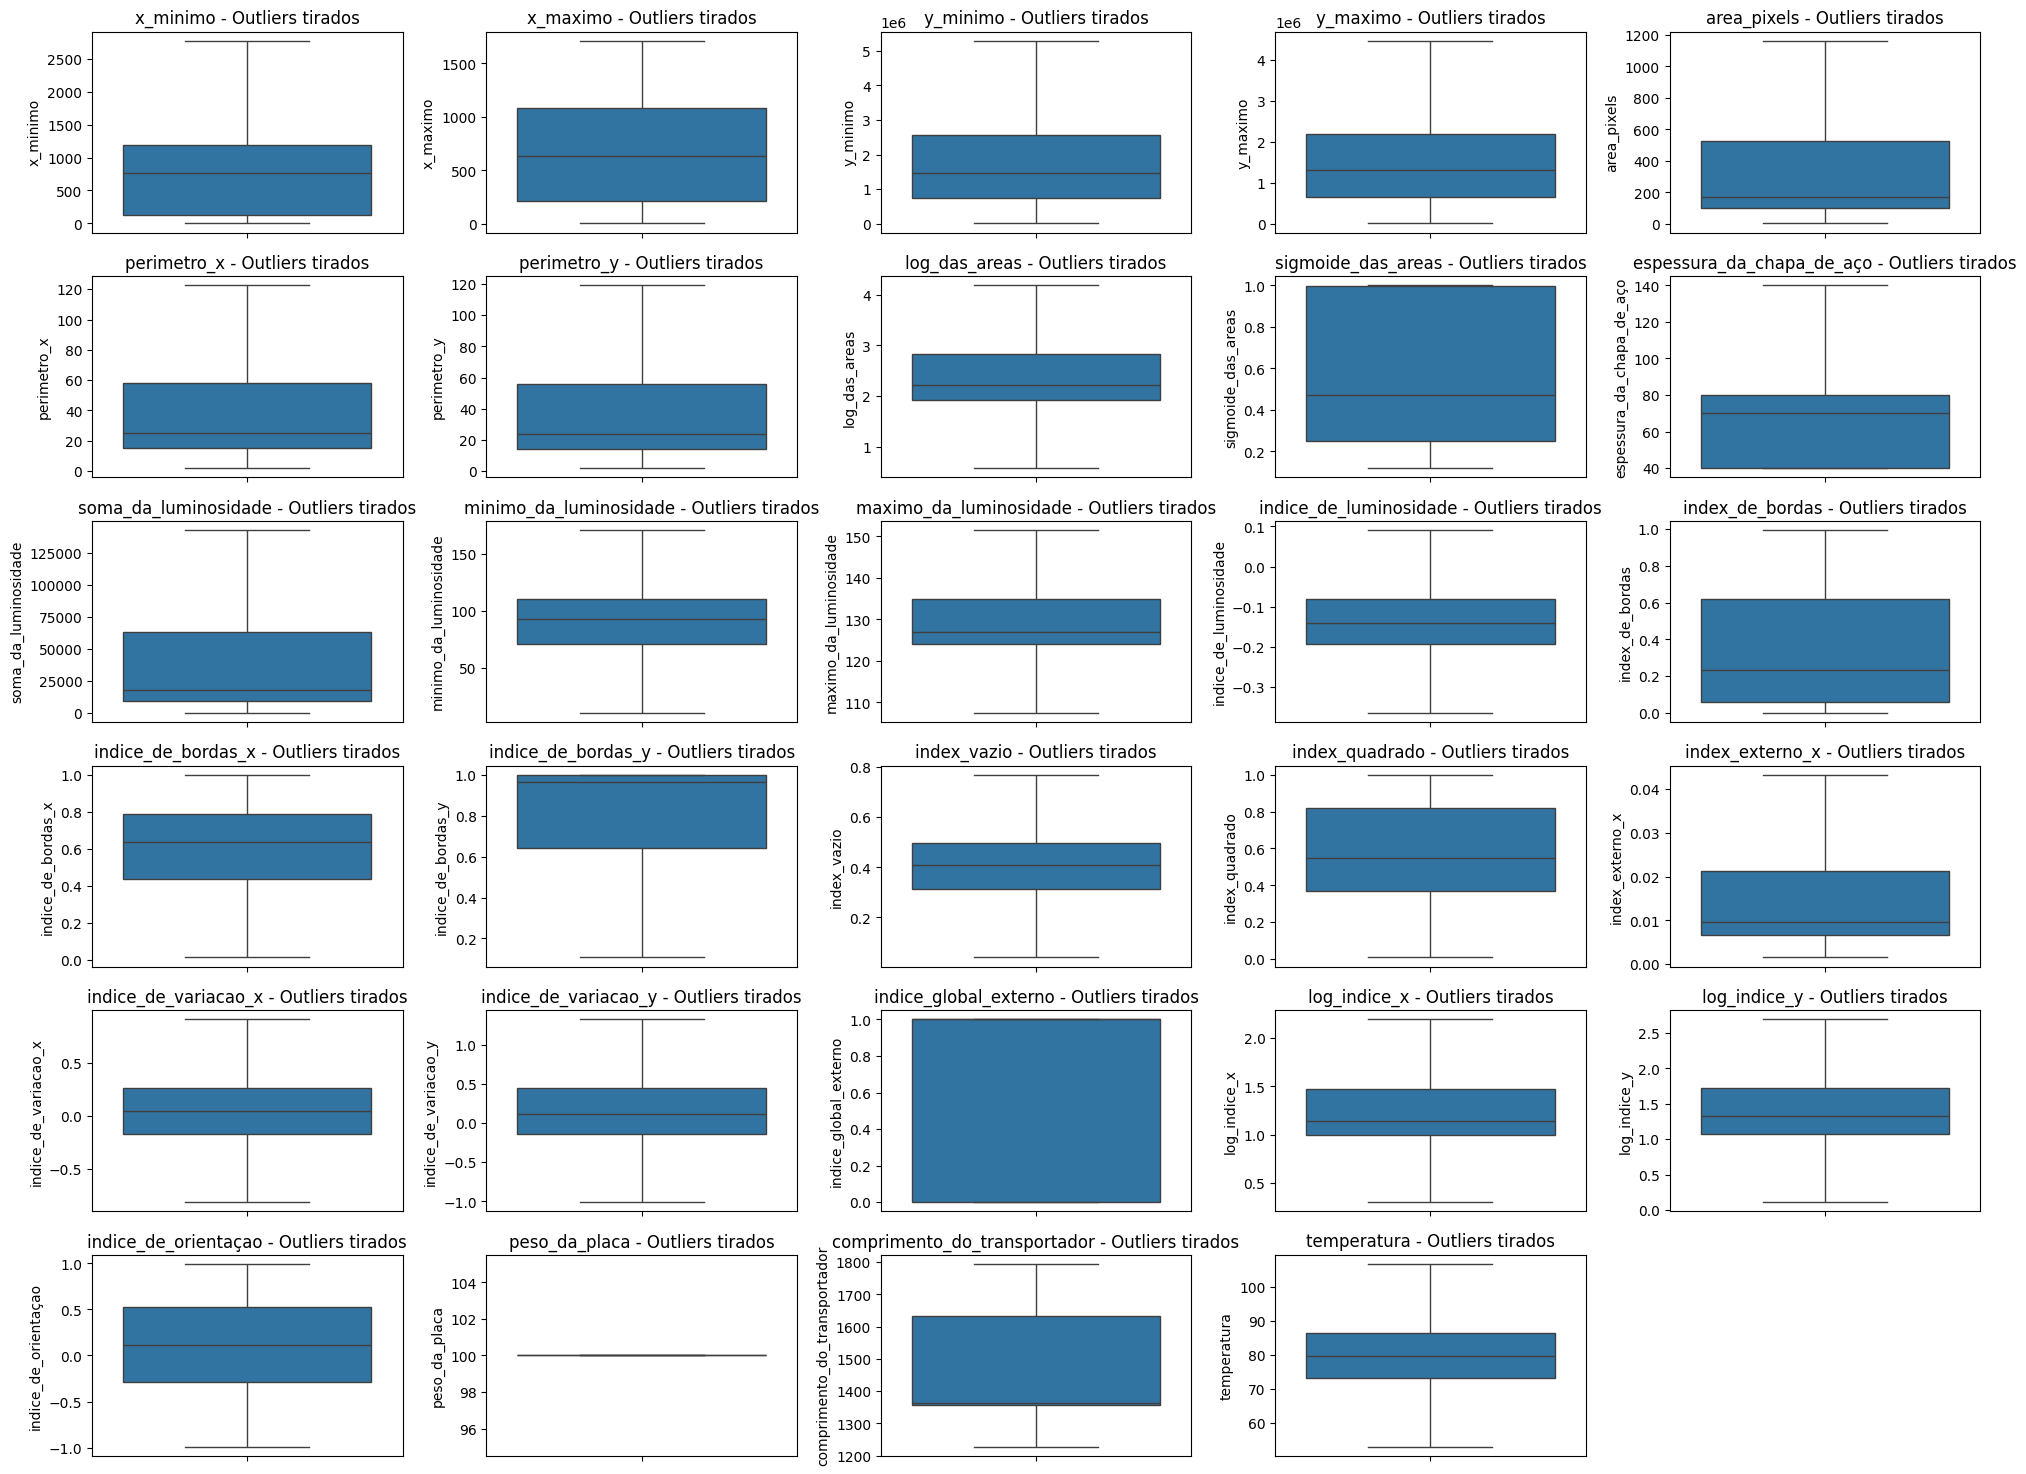

In [42]:
# prompt: df_outliers verifique o box plot das variaveis não categoricas e rastreie os outliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code)

# Function to identify and tirar outliers using IQR
def tirar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# List of numerical columns to treat for outliers (excluding categorical/binary and constant columns)
com_out = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y',
                  'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço', 'soma_da_luminosidade',
                  'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade' ,
                    'indice_de_bordas_y', 'index_vazio', 'index_externo_x',
                  'indice_de_variacao_x', 'indice_de_variacao_y', 'log_indice_x',
                  'log_indice_y', 'temperatura']

# Apply outlier treatment
for col in com_out:
    df_outliers = tirar_outliers_iqr(df_outliers, col)

# Box plot after outlier tirarment
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 5, i)  # Adjusted subplot grid to accommodate all columns
    sns.boxplot(y=df_outliers[col])
    plt.title(f"{col} - Outliers tirados")
plt.tight_layout()
plt.show()


In [43]:
df_outliers.to_csv('df_outliers.csv', index=False)

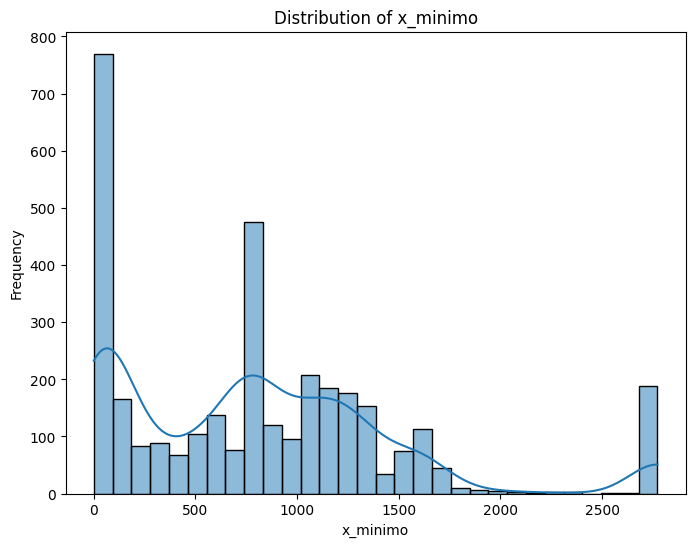

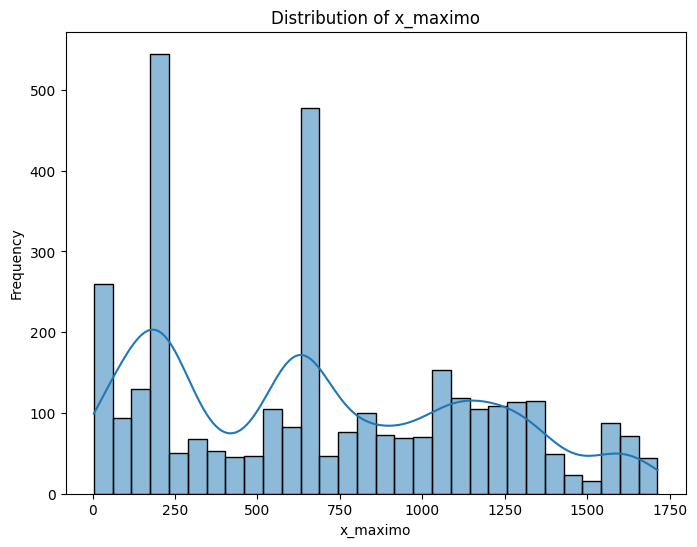

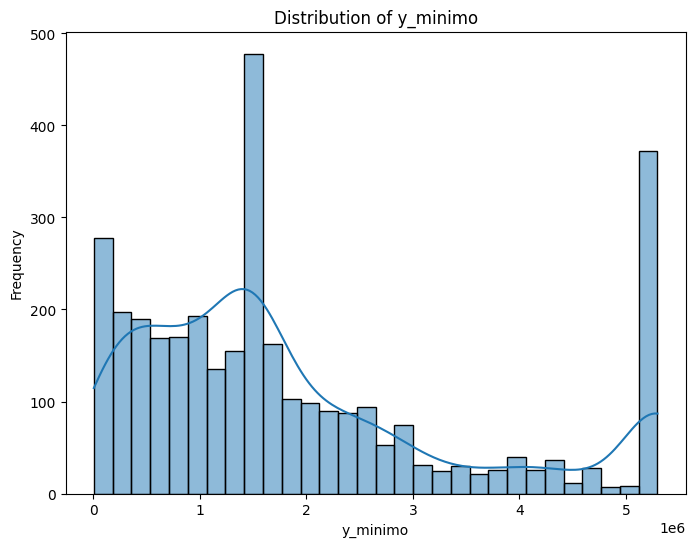

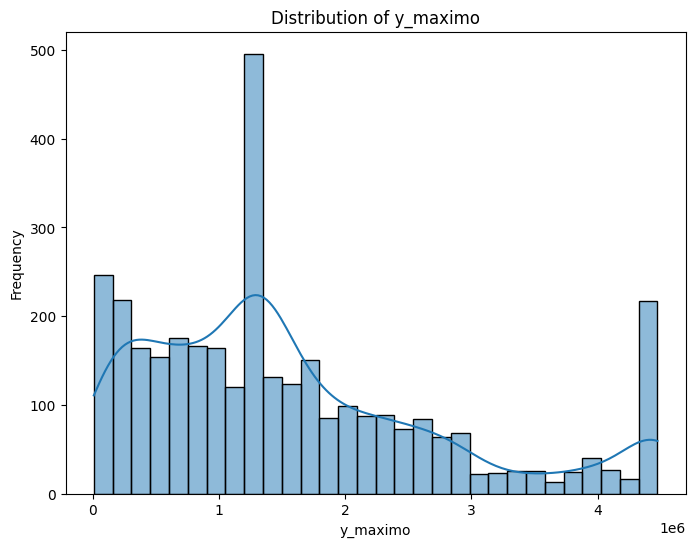

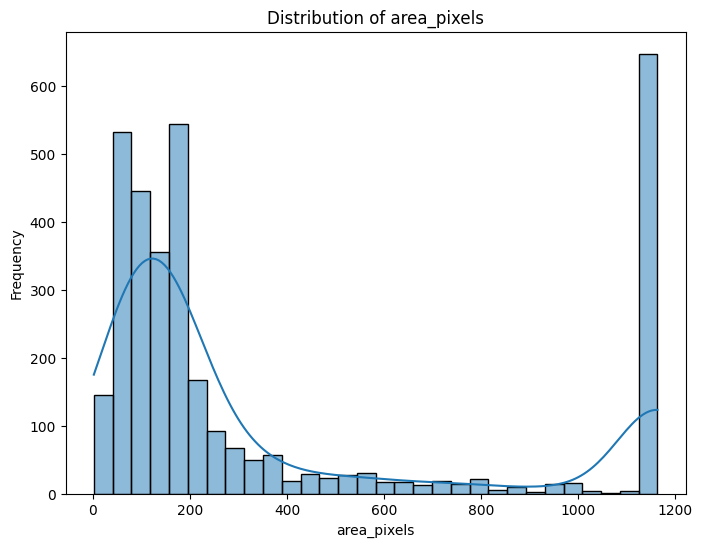

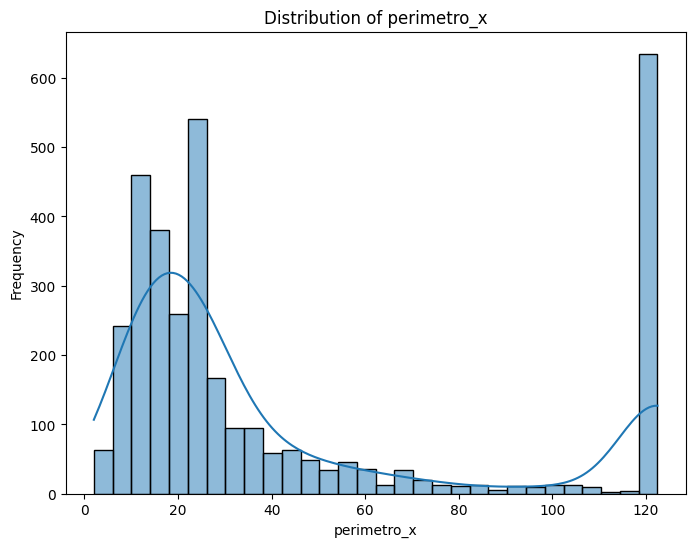

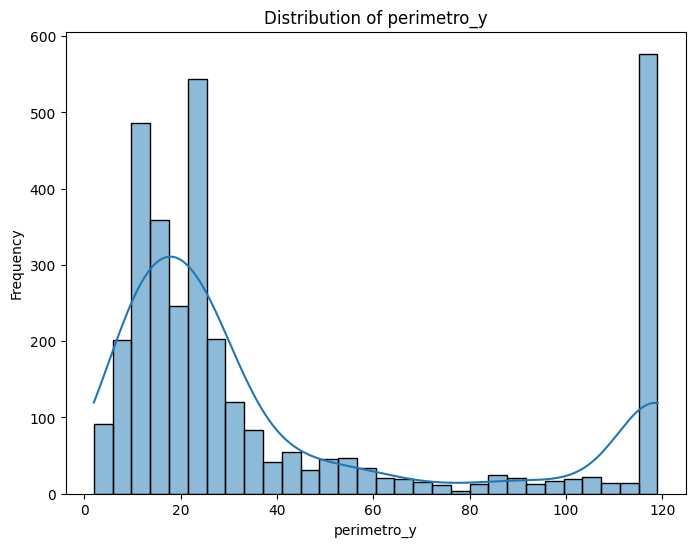

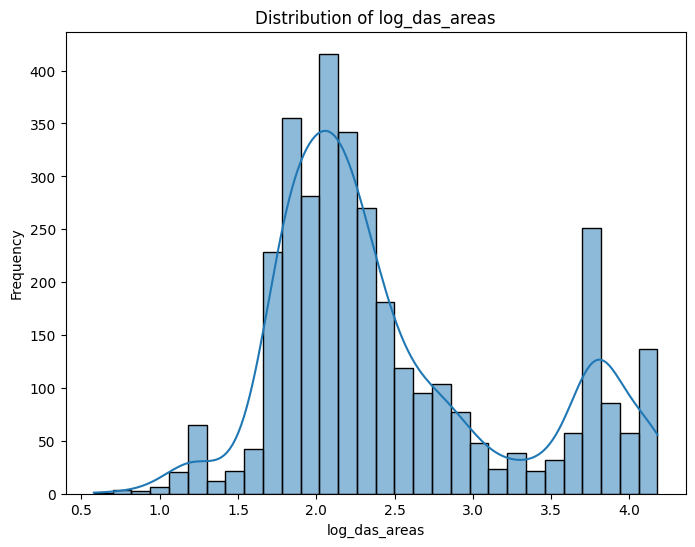

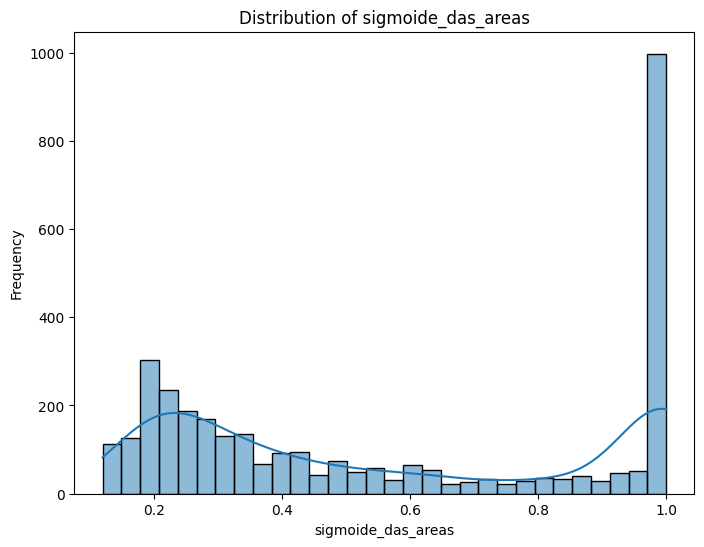

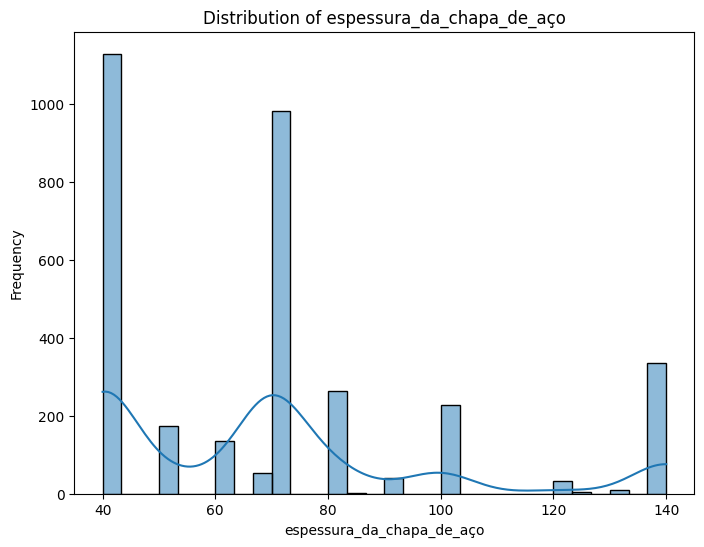

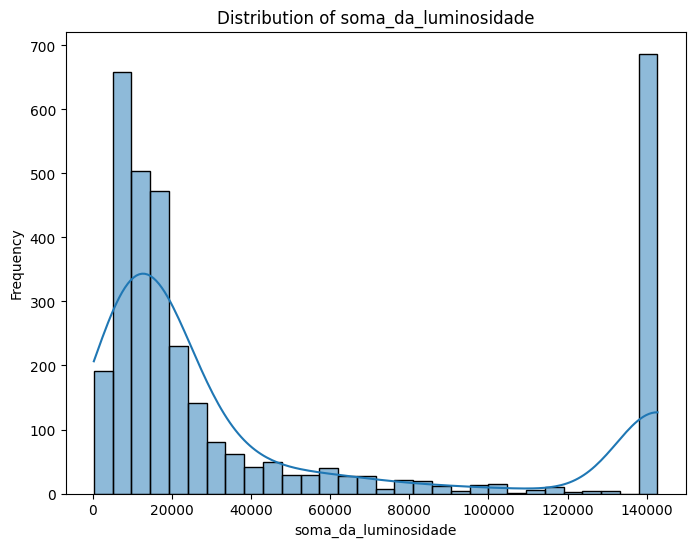

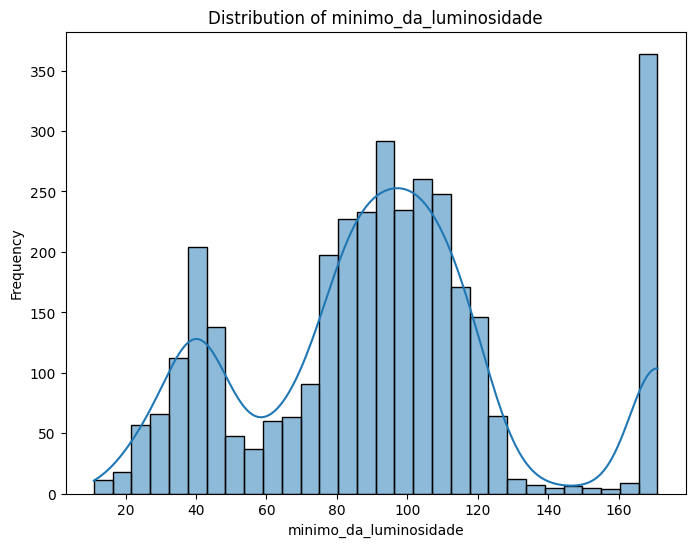

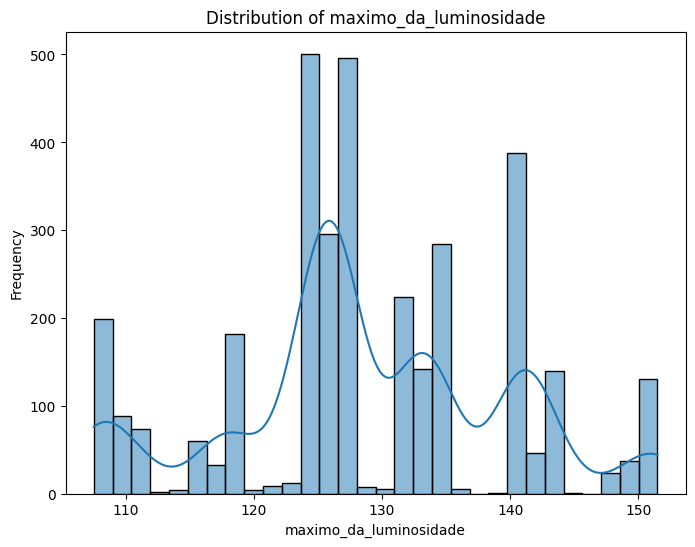

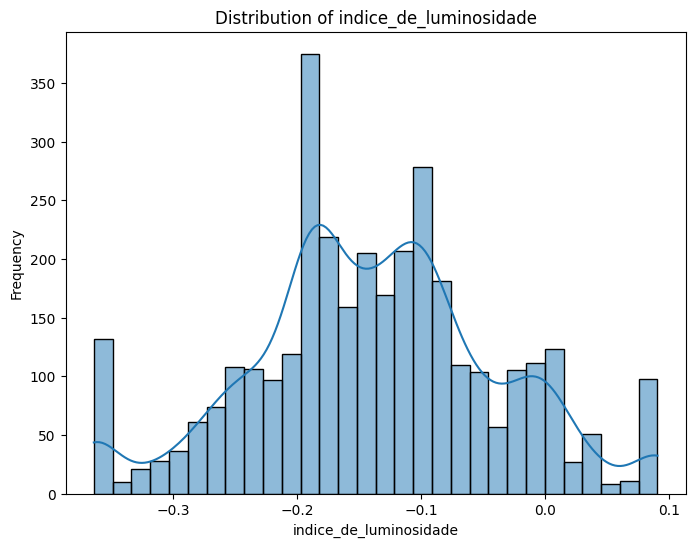

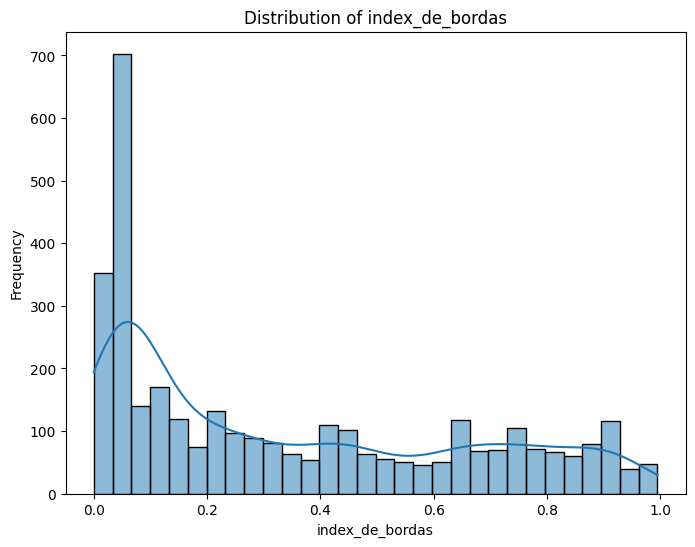

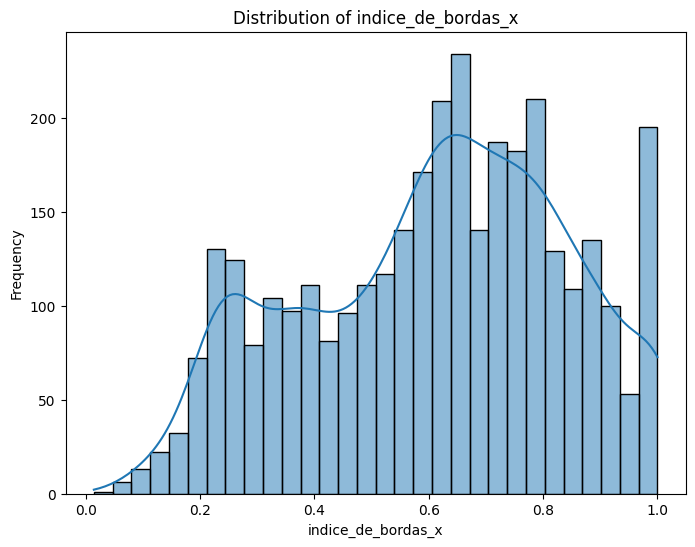

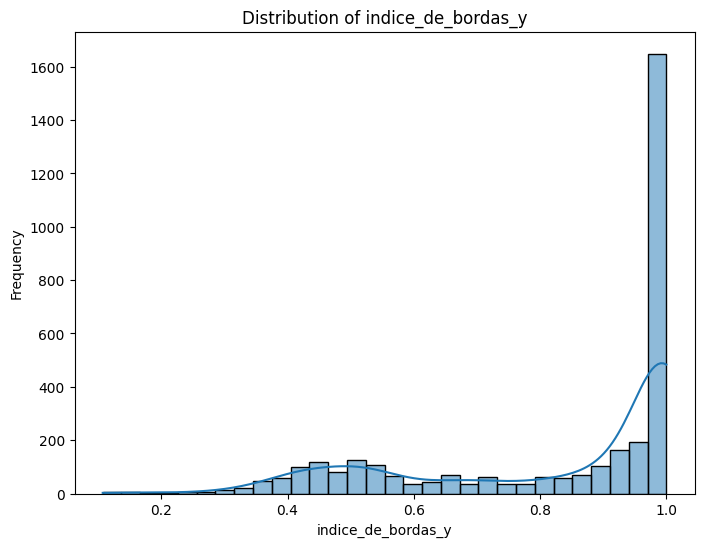

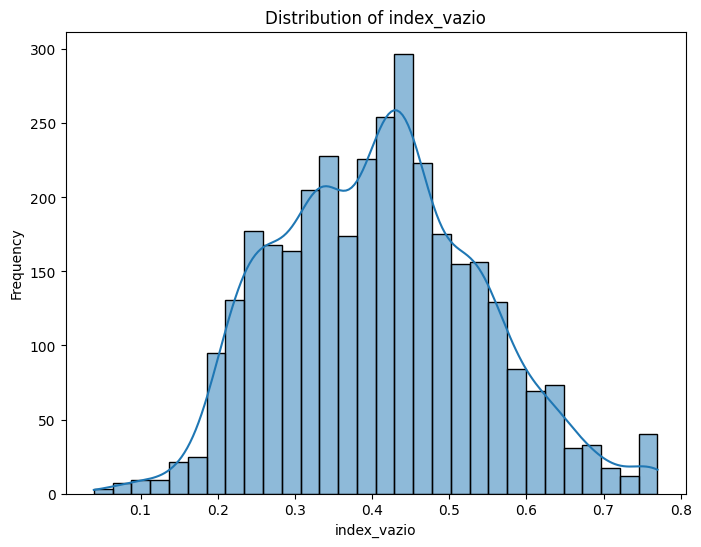

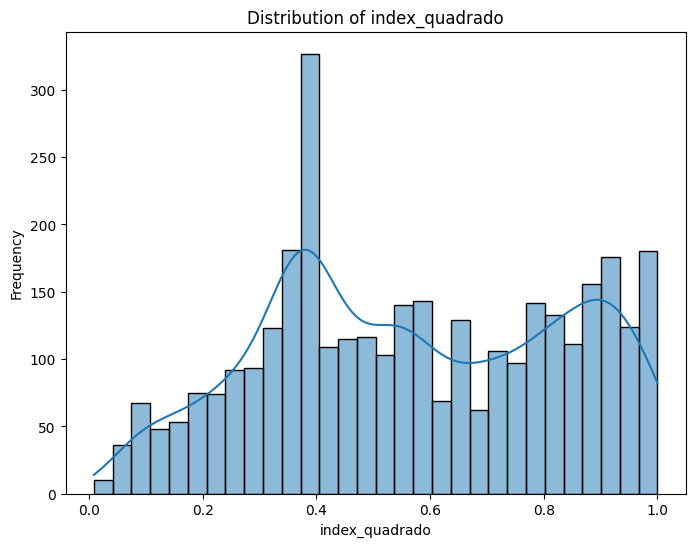

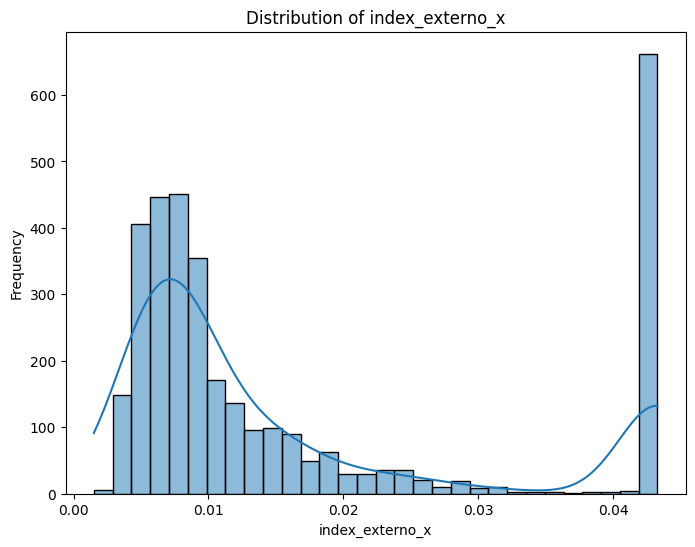

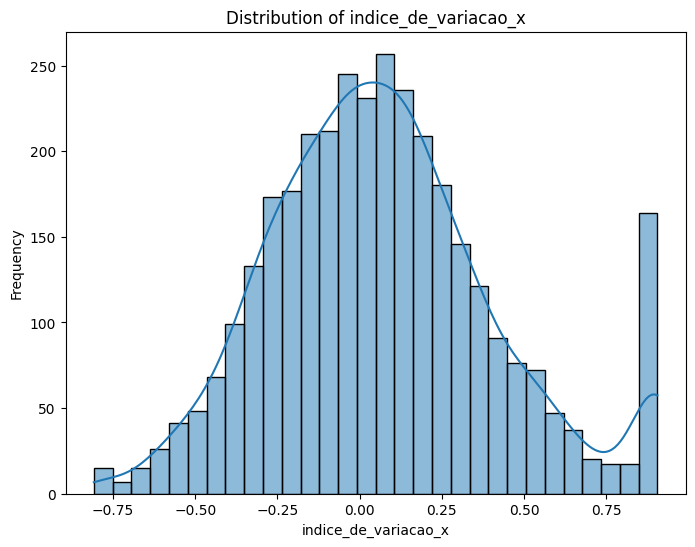

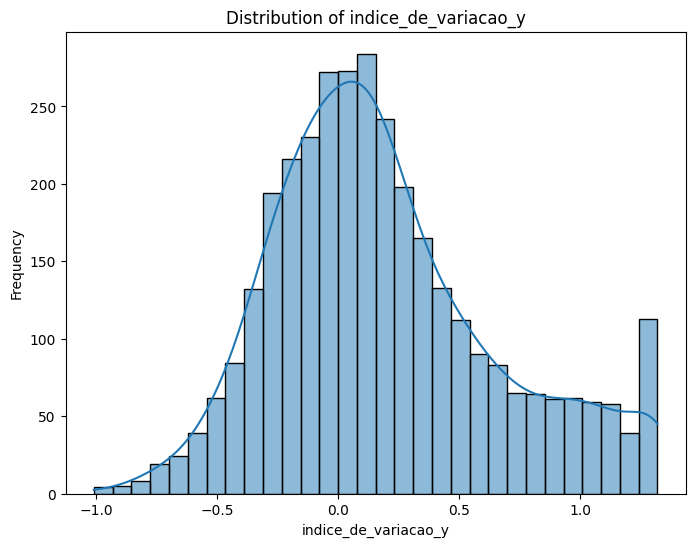

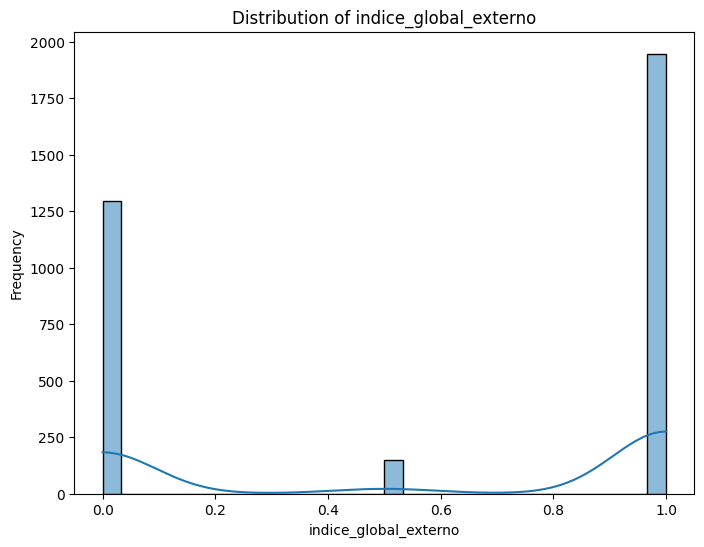

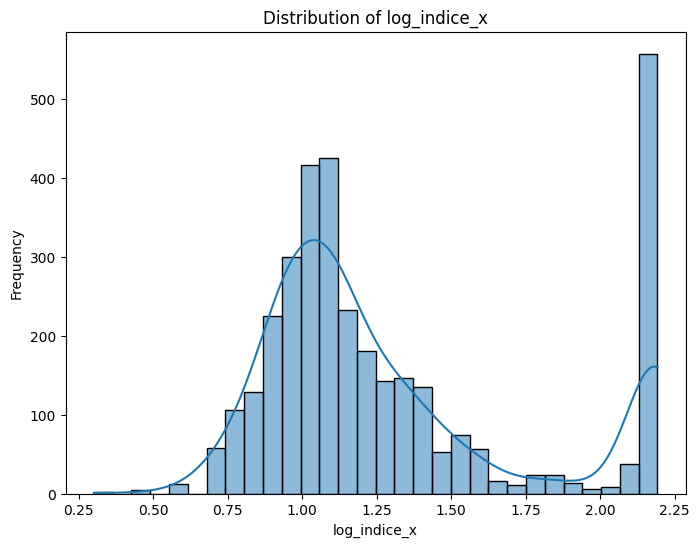

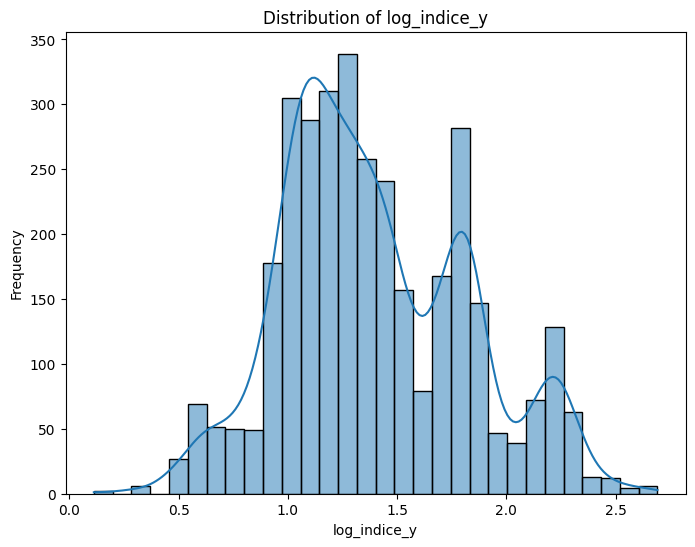

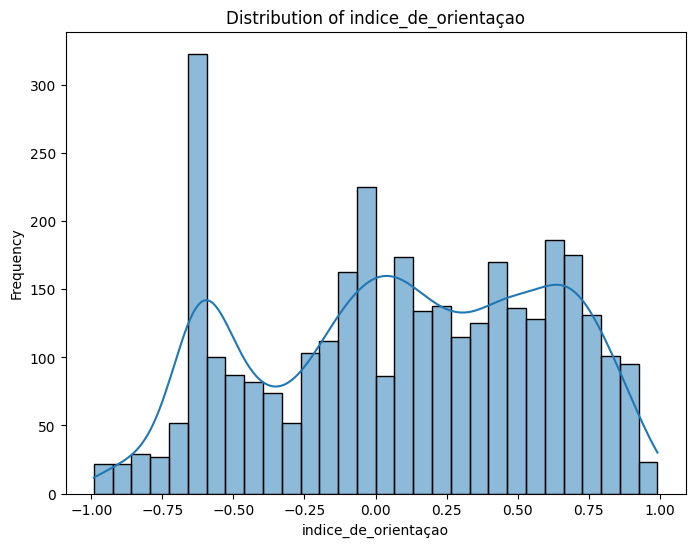

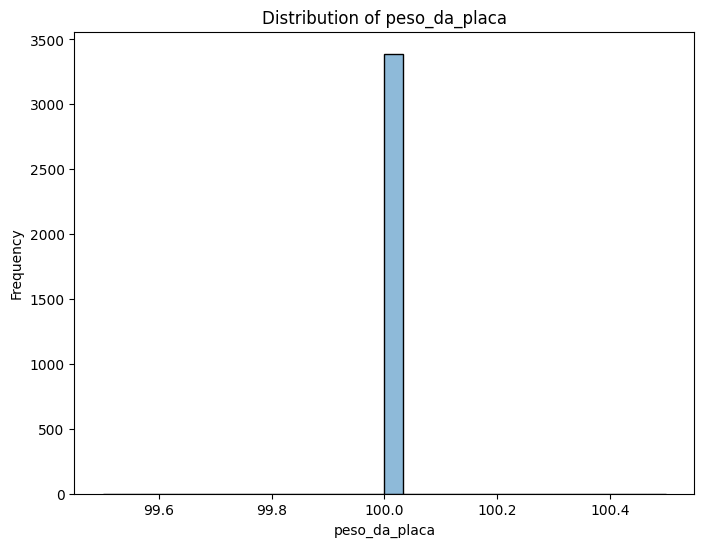

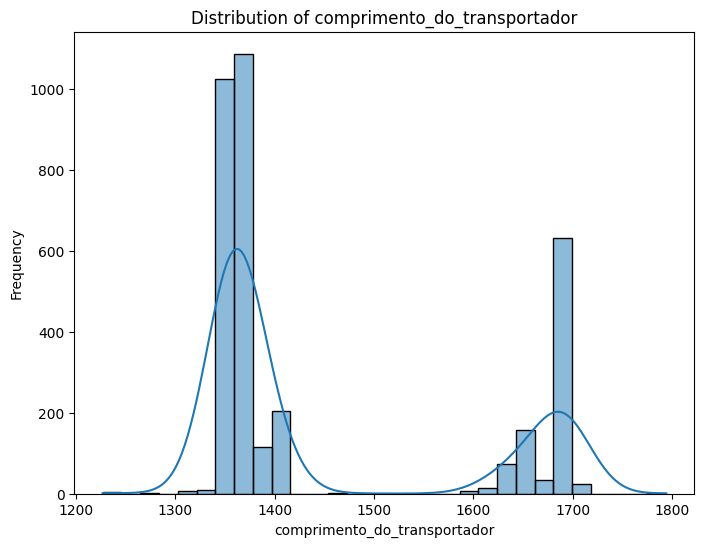

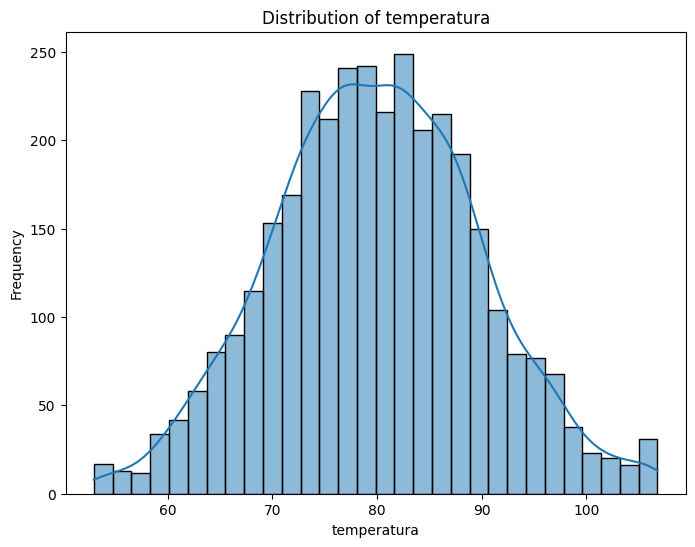

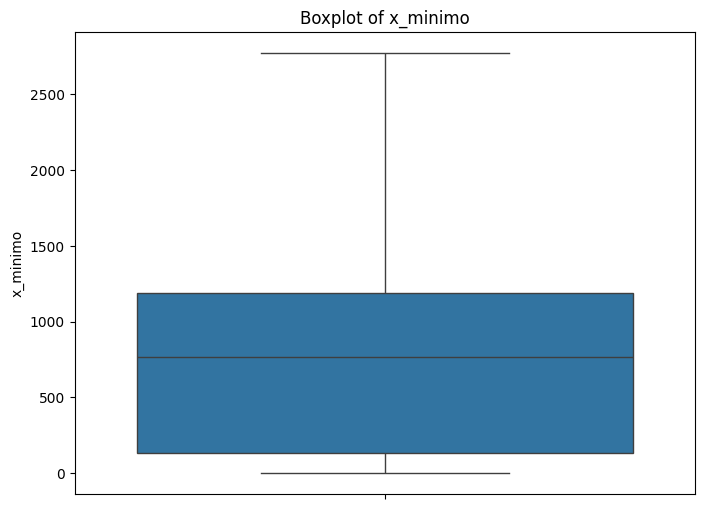

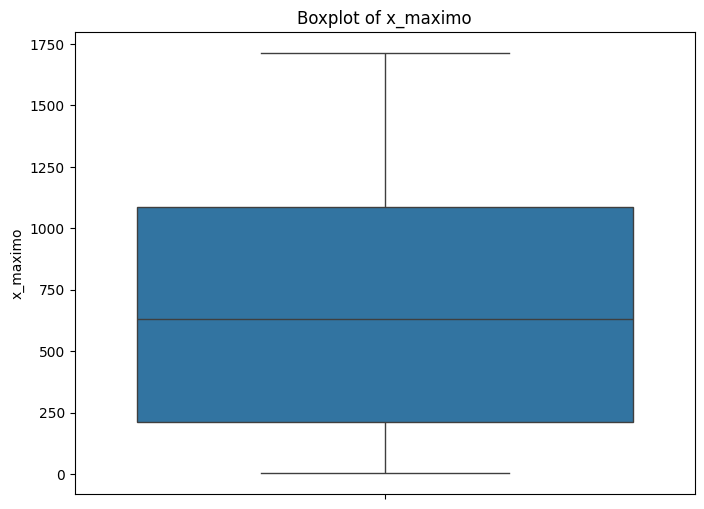

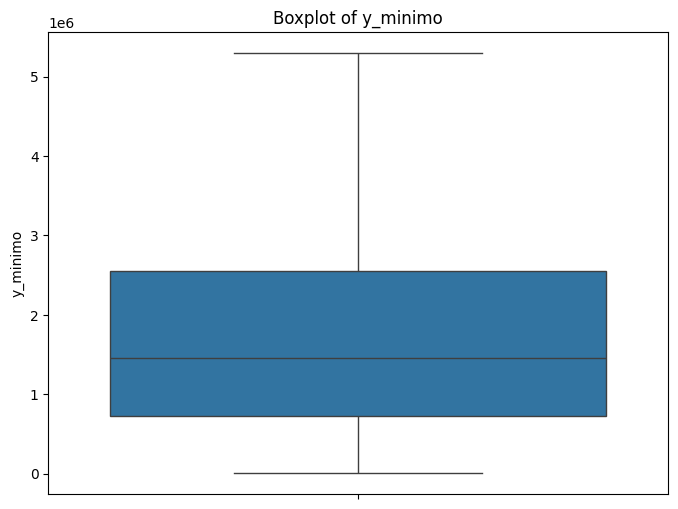

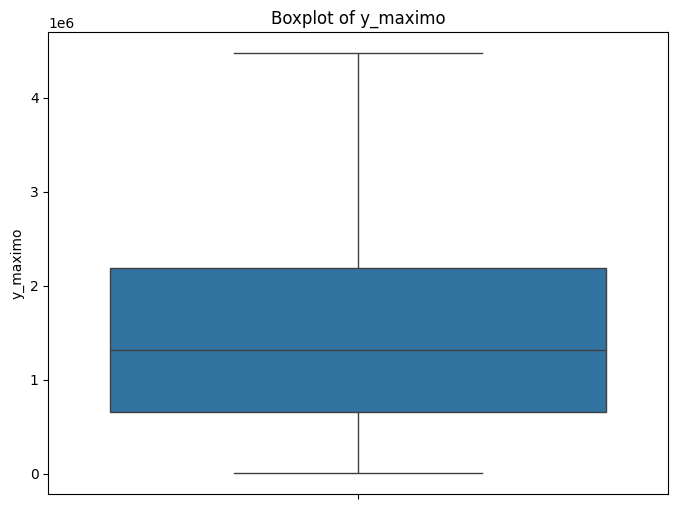

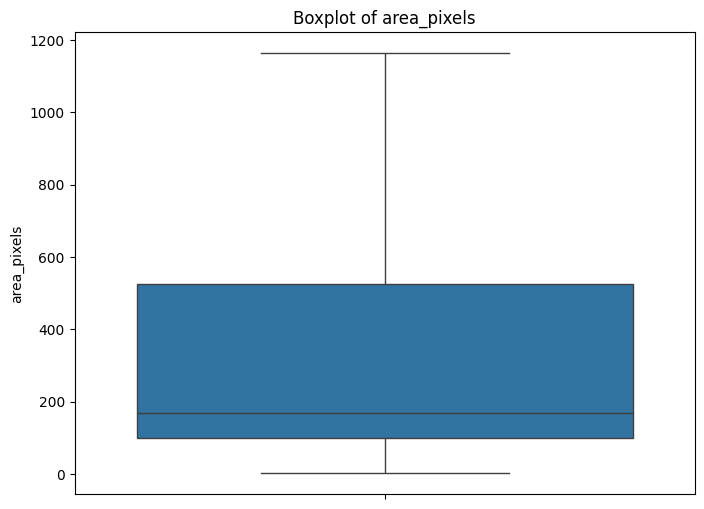

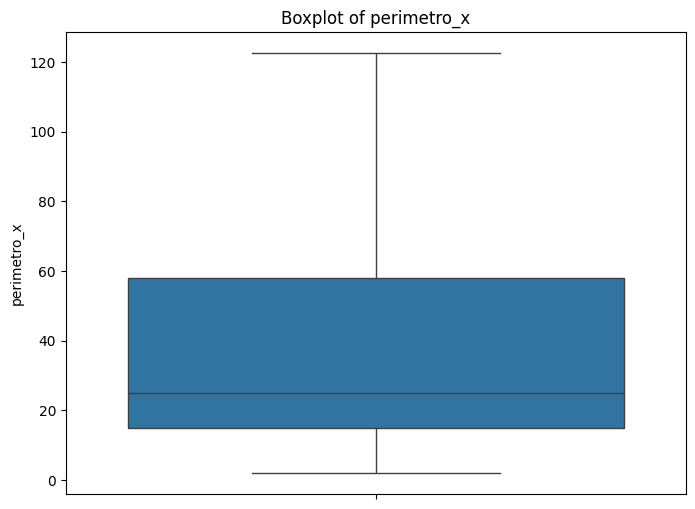

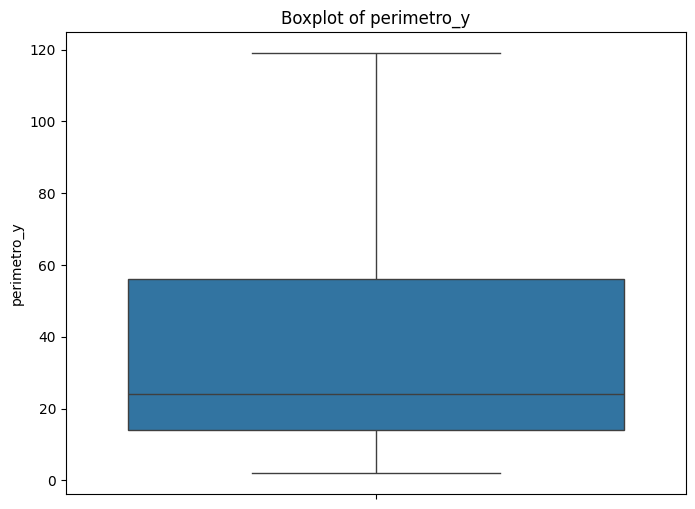

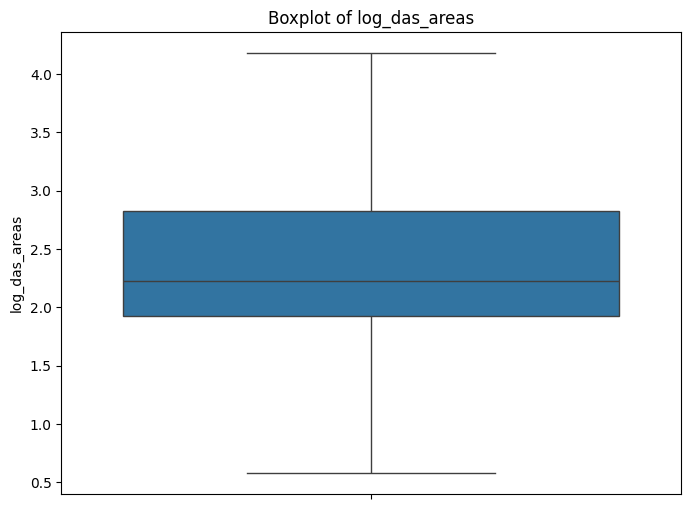

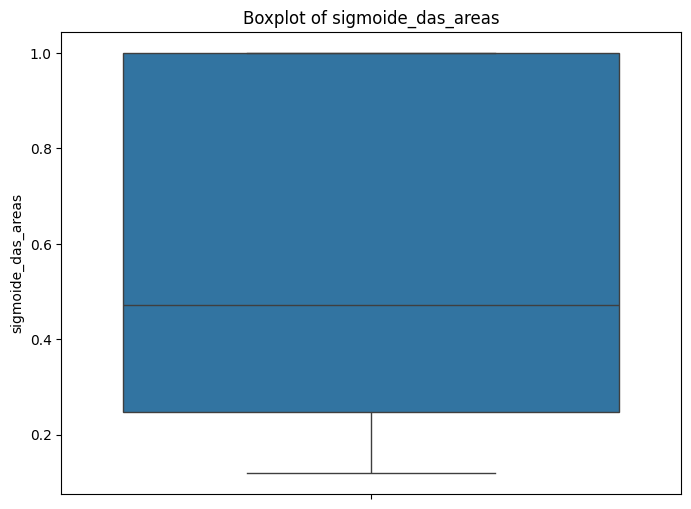

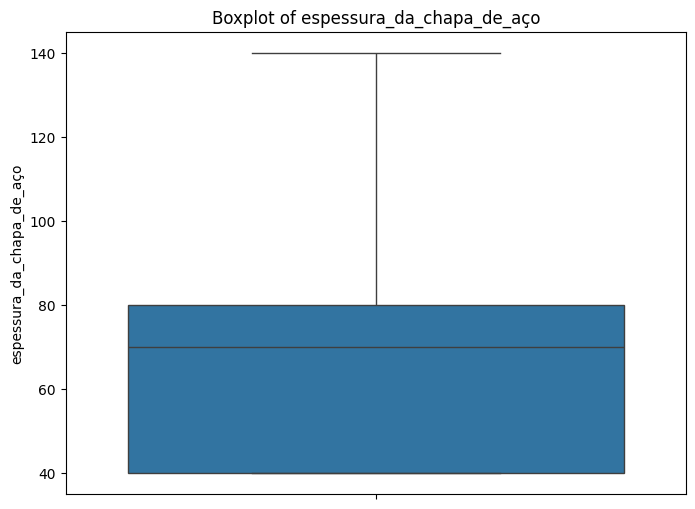

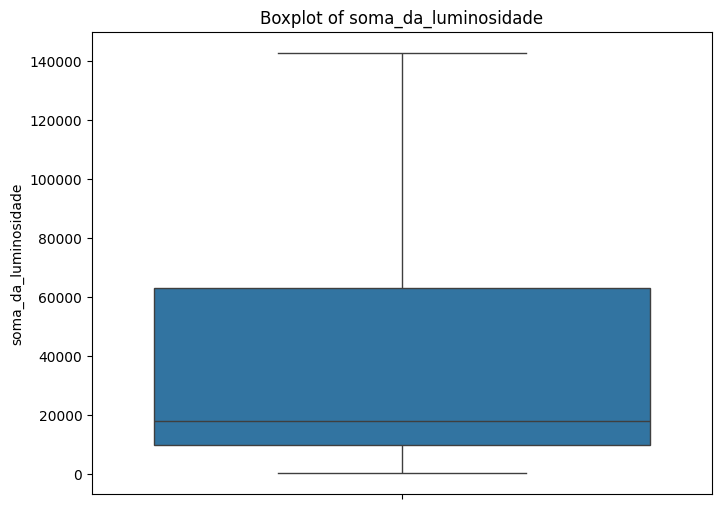

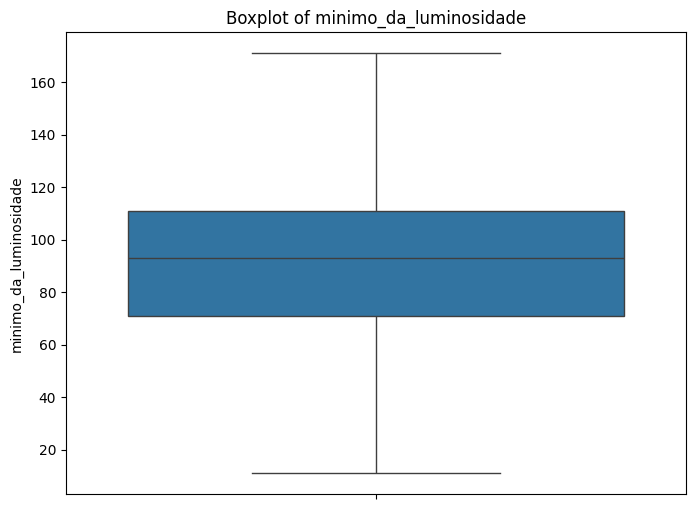

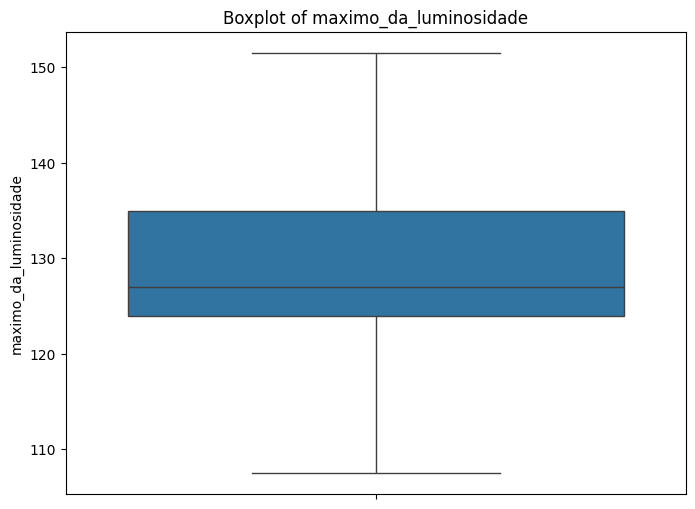

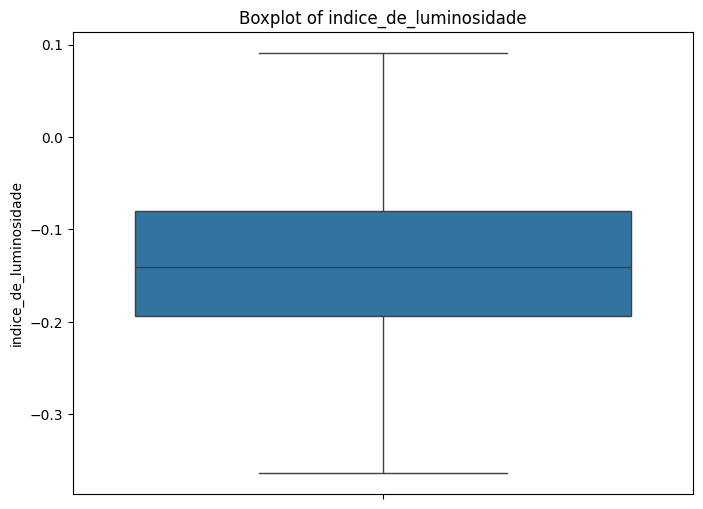

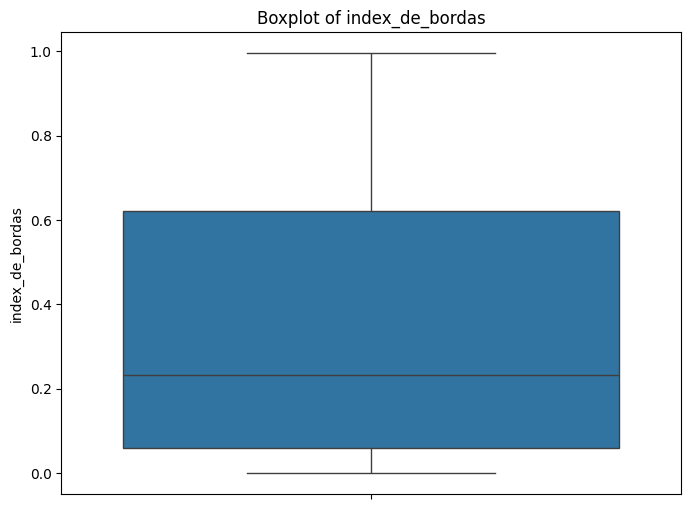

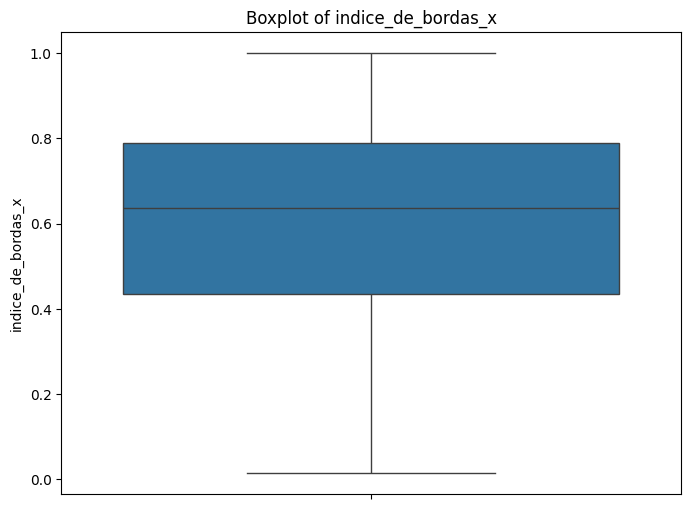

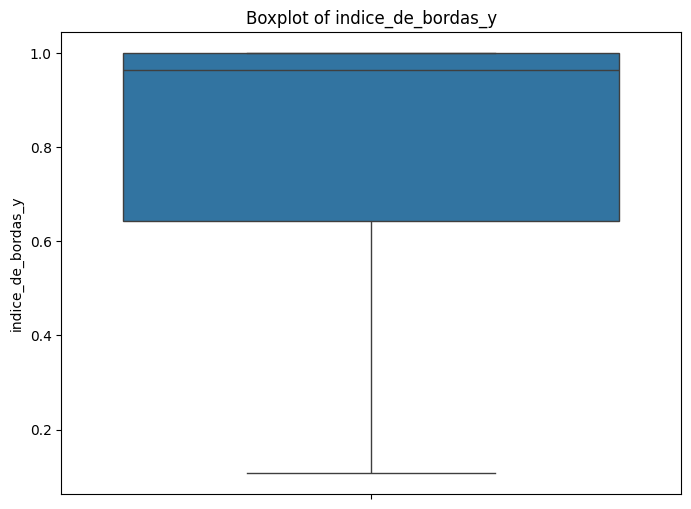

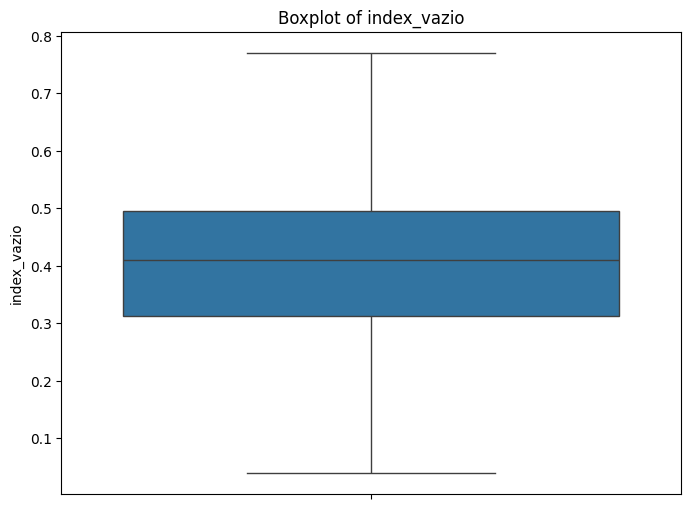

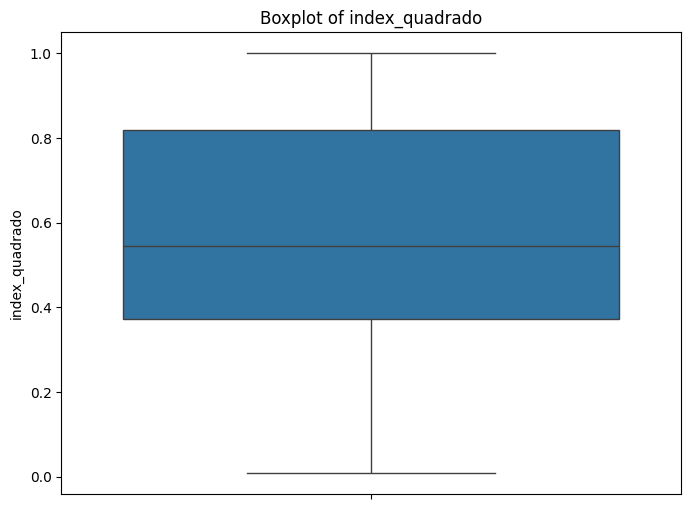

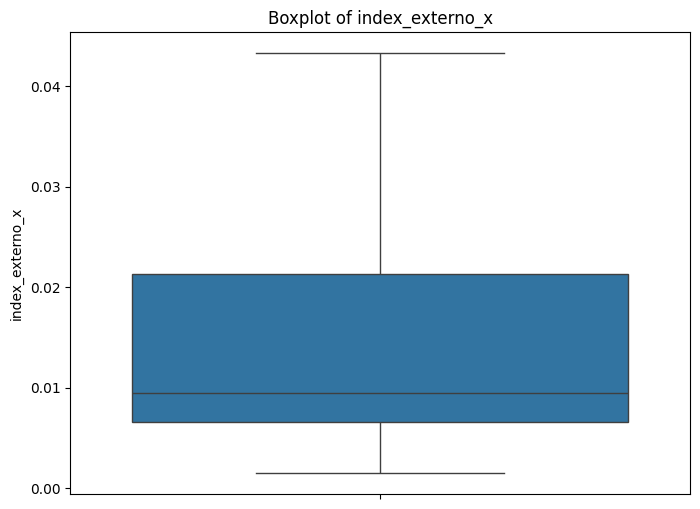

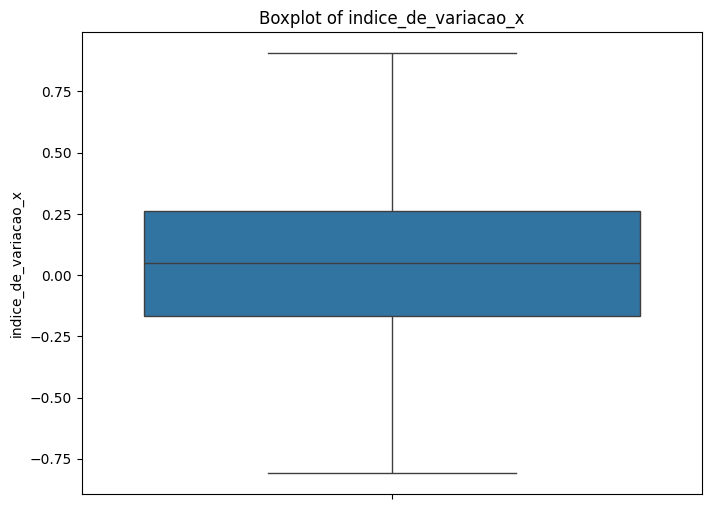

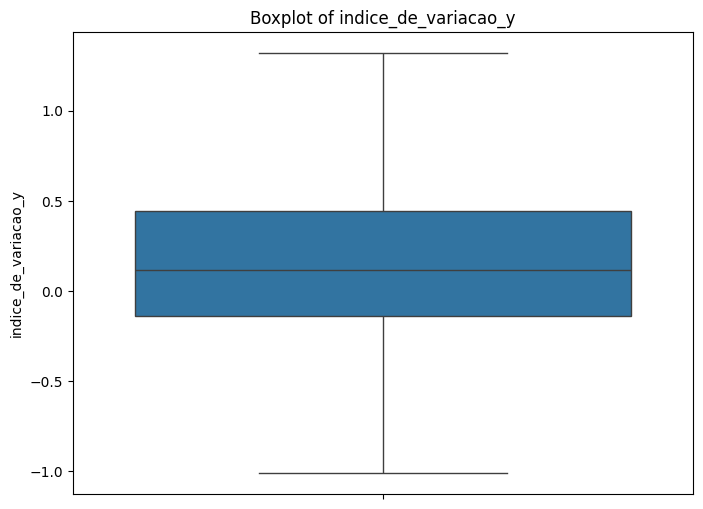

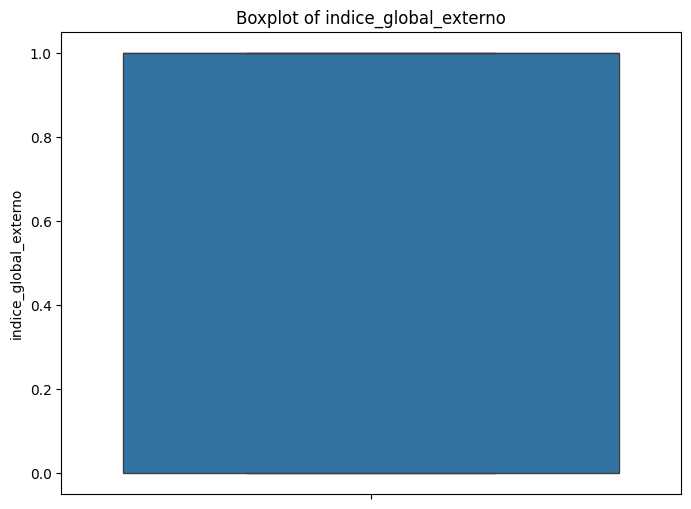

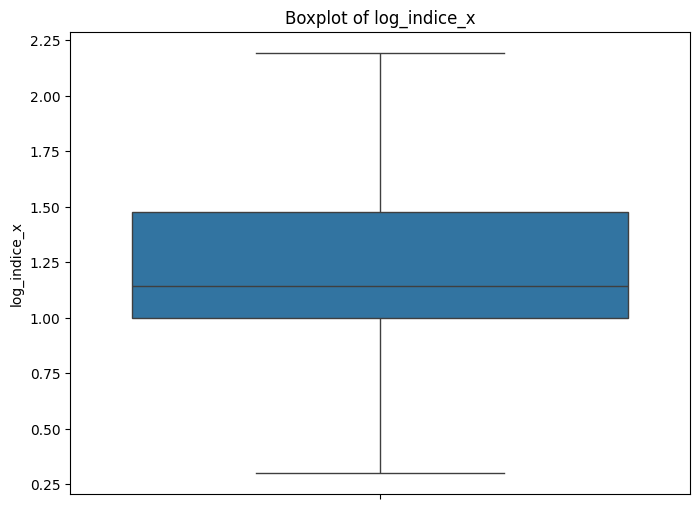

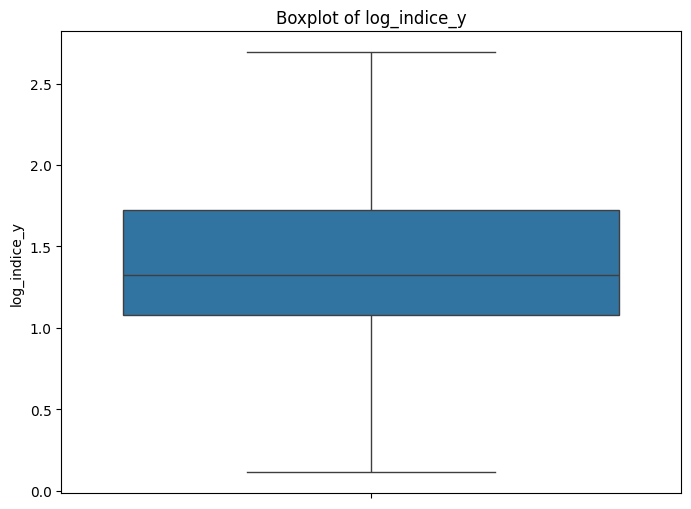

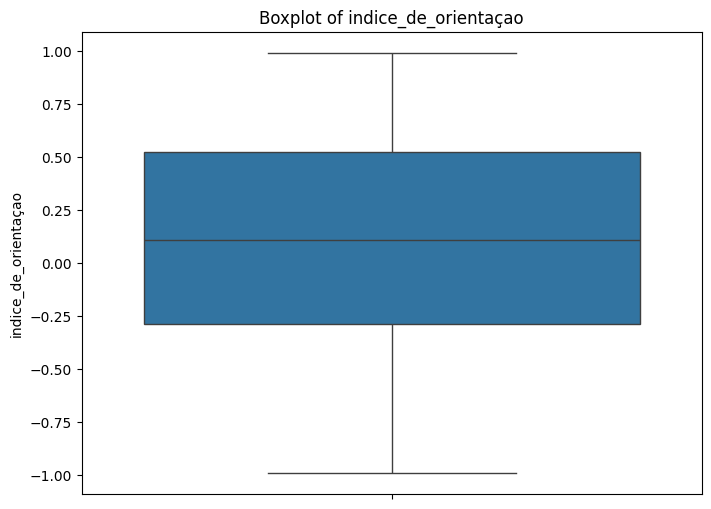

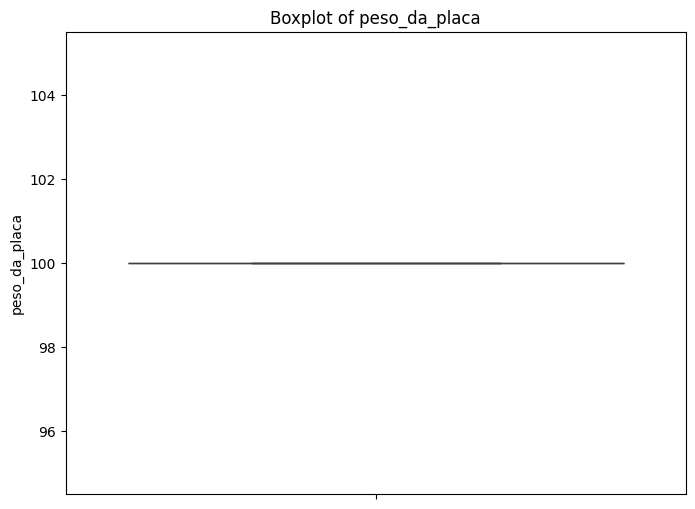

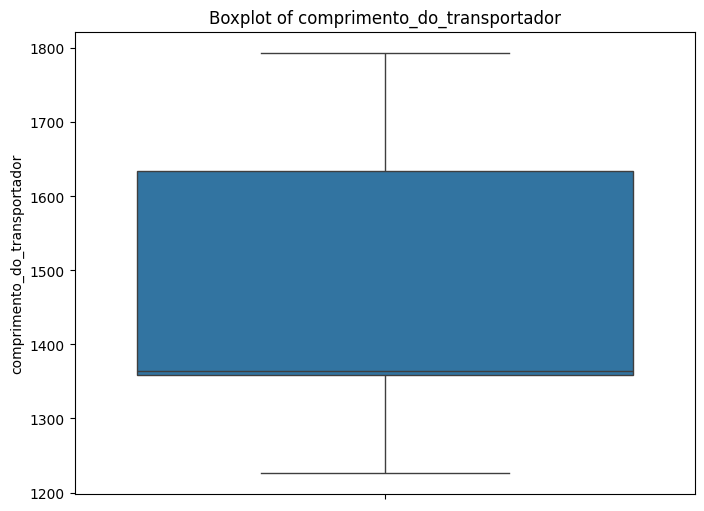

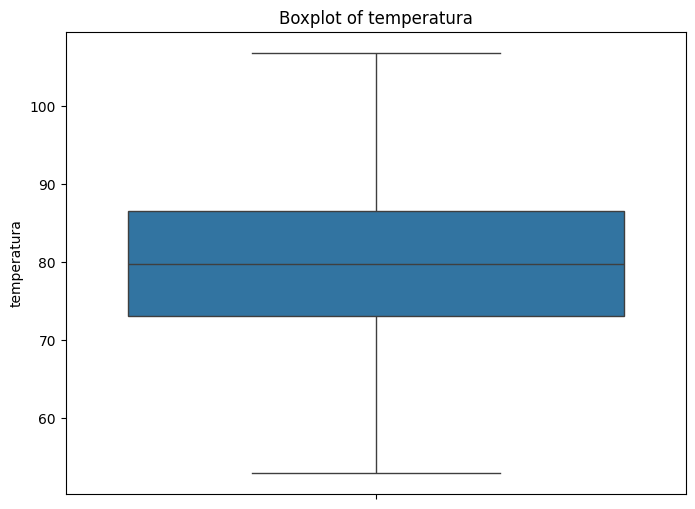

          x_minimo     x_maximo      y_minimo      y_maximo  area_pixels  \
count  3390.000000  3390.000000  3.390000e+03  3.390000e+03  3390.000000   
mean    809.157153   686.798230  1.898600e+06  1.572591e+06   377.334440   
std     700.029973   476.806093  1.578913e+06  1.211118e+06   416.400256   
min       0.000000     4.000000  6.712000e+03  6.724000e+03     2.000000   
25%     131.000000   214.000000  7.282982e+05  6.575020e+05    99.000000   
50%     767.000000   633.000000  1.457758e+06  1.312948e+06   168.000000   
75%    1187.500000  1088.000000  2.555025e+06  2.184335e+06   524.750000   
max    2772.250000  1713.000000  5.295115e+06  4.474584e+06  1163.375000   

       perimetro_x  perimetro_y  log_das_areas  sigmoide_das_areas  \
count  3390.000000  3390.000000    3390.000000         3390.000000   
mean     44.342478    42.400295       2.474741            0.570363   
std      41.332067    39.988807       0.768251            0.335394   
min       2.000000     2.000000    

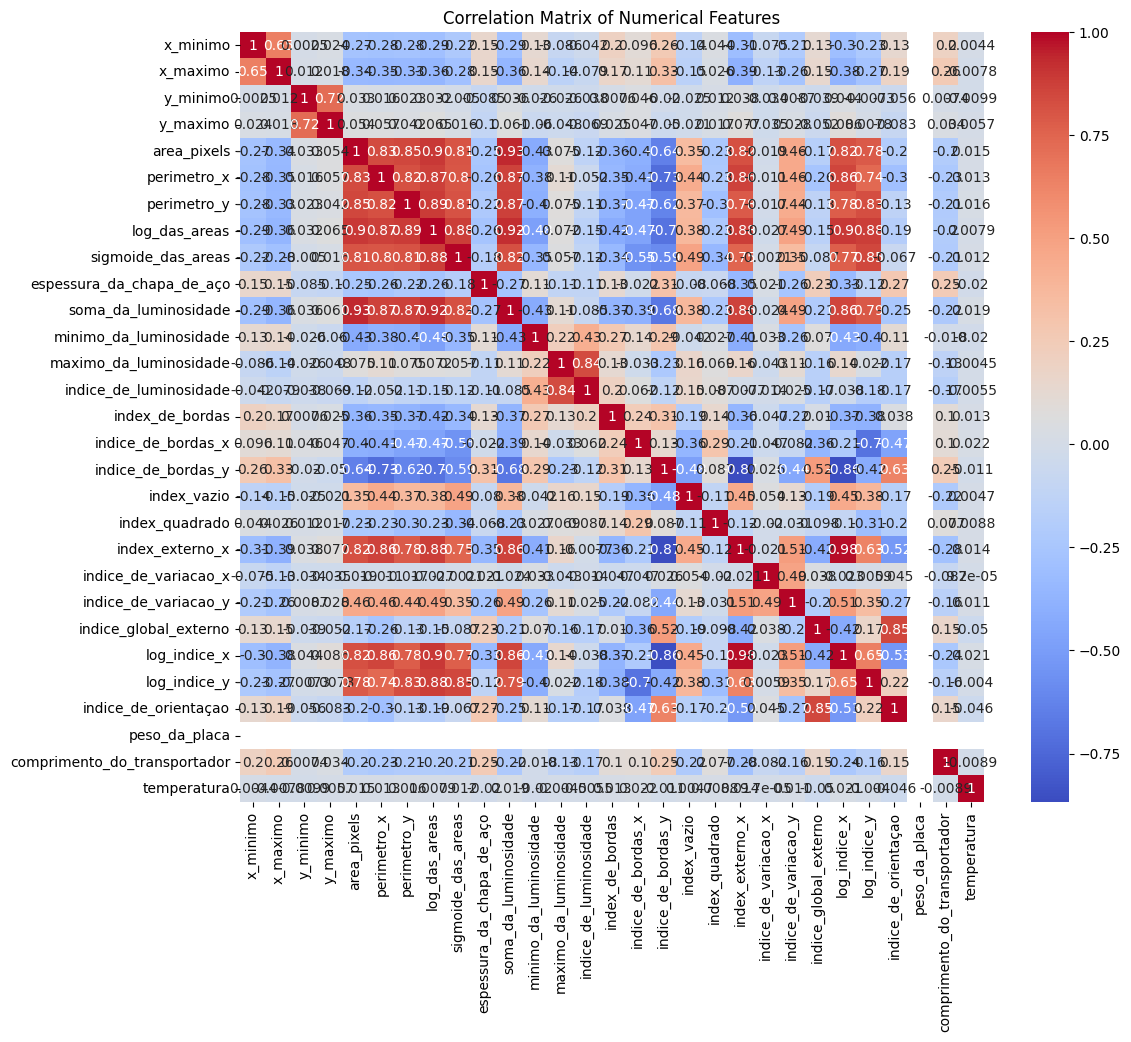

In [44]:
# prompt: gere uma analise da distribuição dos dados

# Assuming df_outliers is your DataFrame after outlier treatment
# as defined in the provided code.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for analysis (excluding categorical/binary and constant columns)
numerical_cols = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y',
                  'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço', 'soma_da_luminosidade',
                  'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade', 'index_de_bordas',
                  'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio', 'index_quadrado', 'index_externo_x',
                  'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo', 'log_indice_x',
                  'log_indice_y', 'indice_de_orientaçao', 'peso_da_placa', 'comprimento_do_transportador', 'temperatura']

# Create histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_outliers[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

# Descriptive statistics for numerical columns
print(df_outliers[numerical_cols].describe())

# Correlation matrix for numerical columns (optional)
correlation_matrix = df_outliers[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


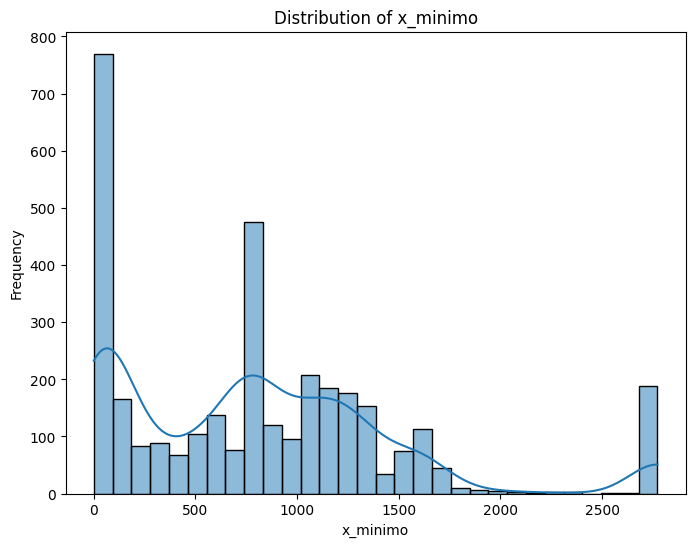

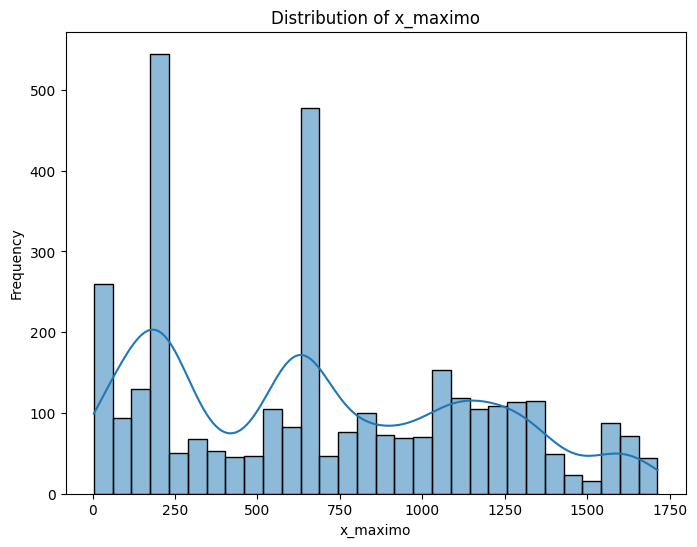

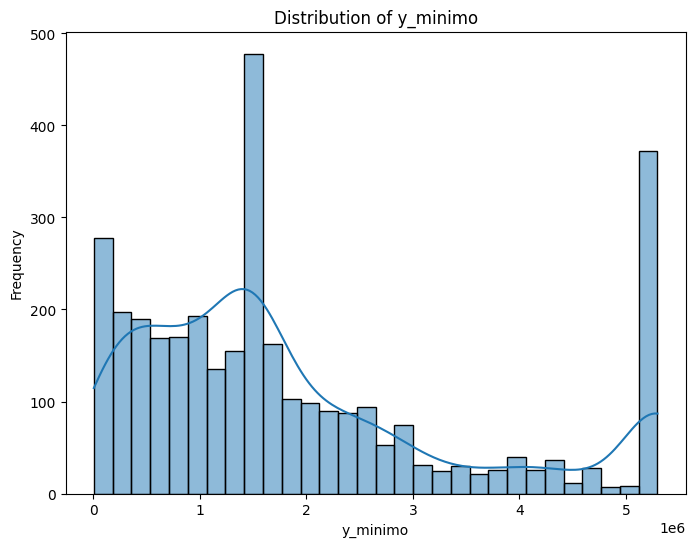

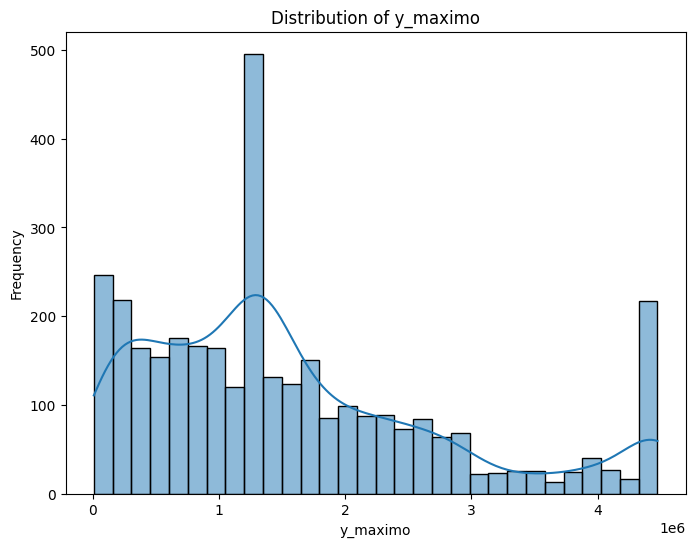

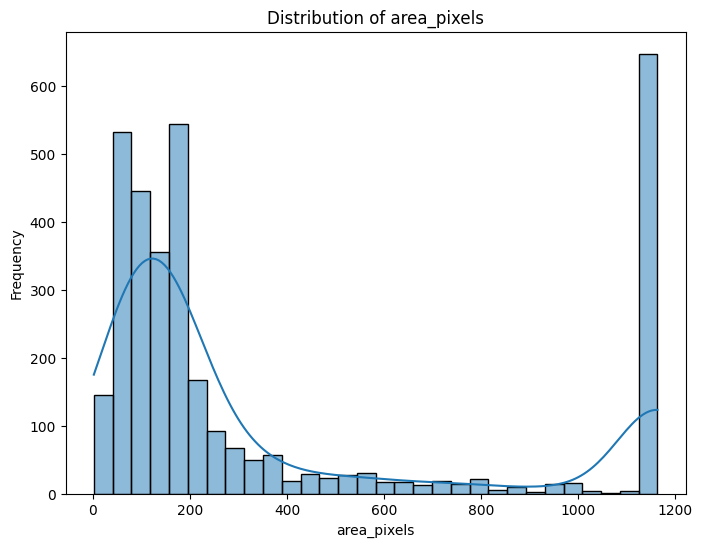

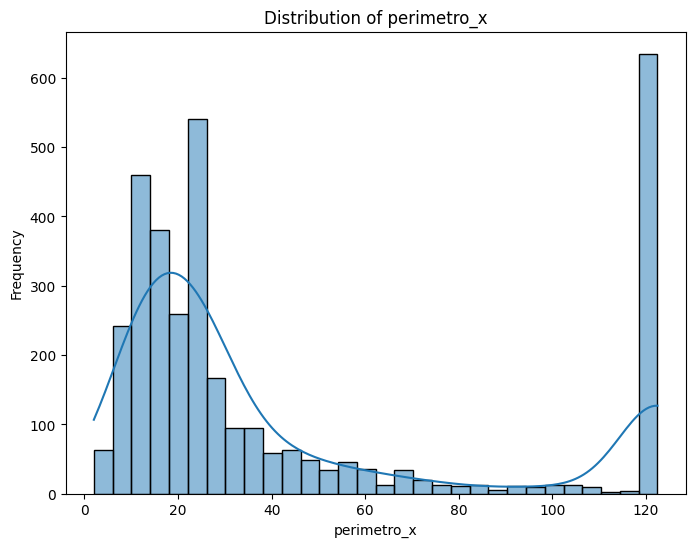

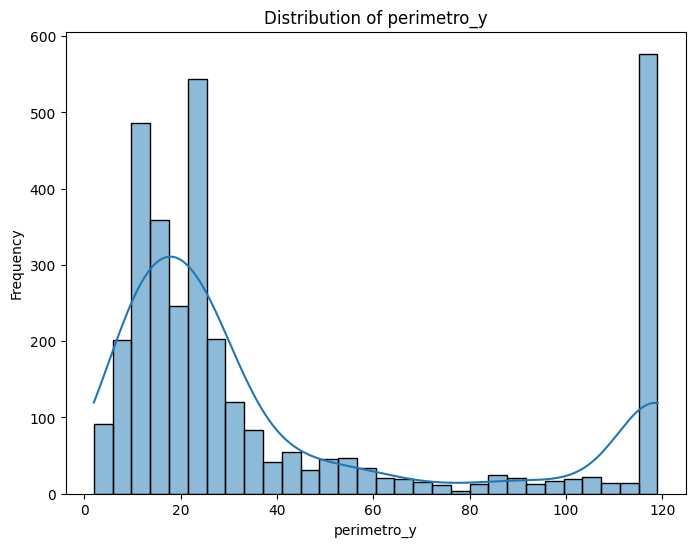

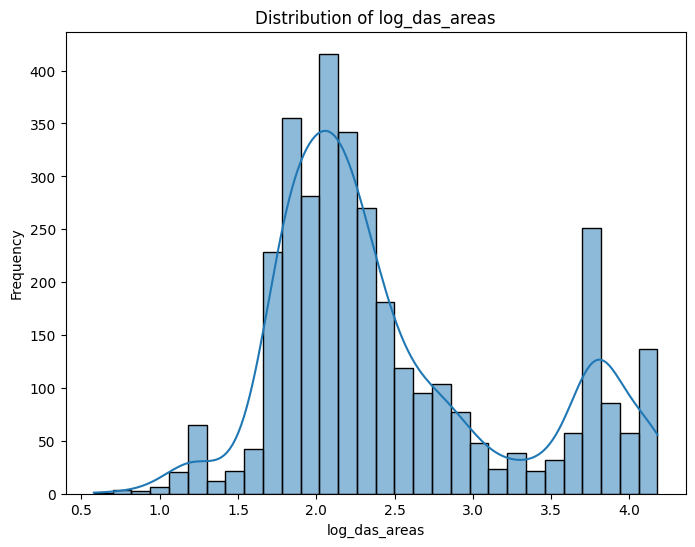

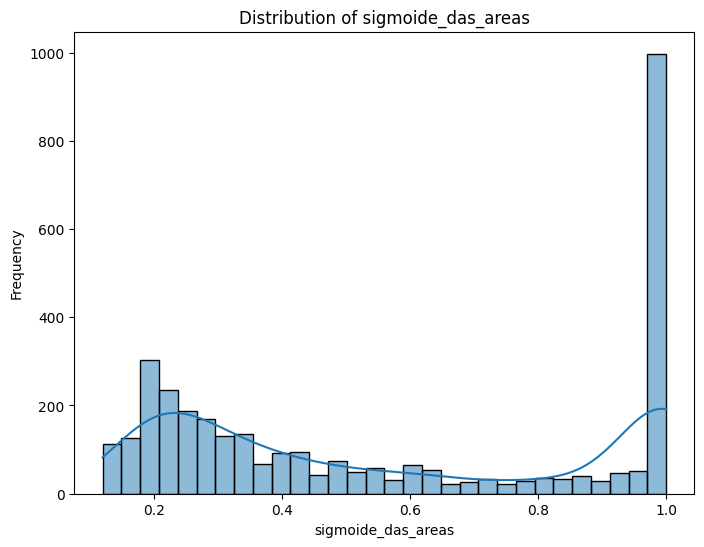

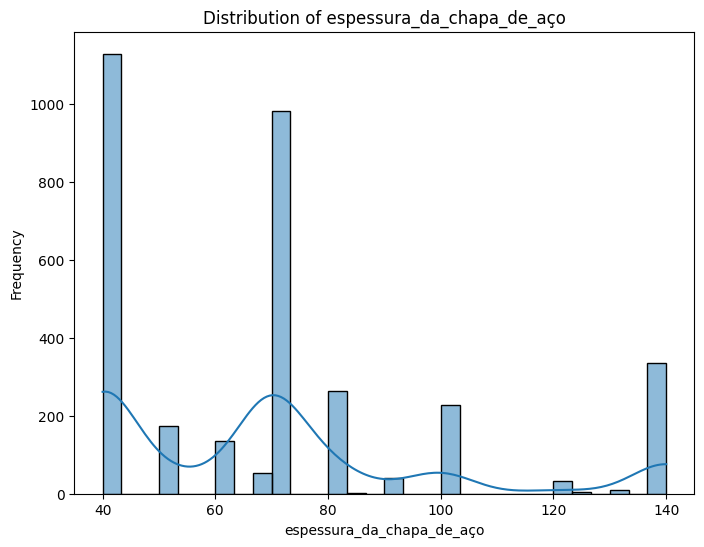

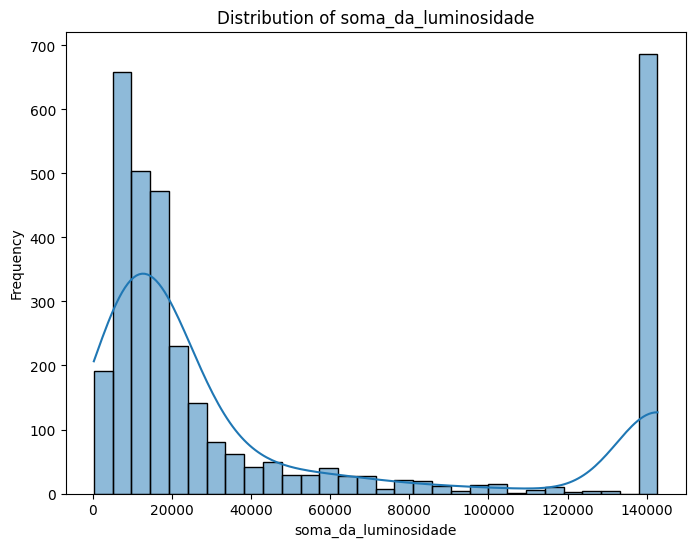

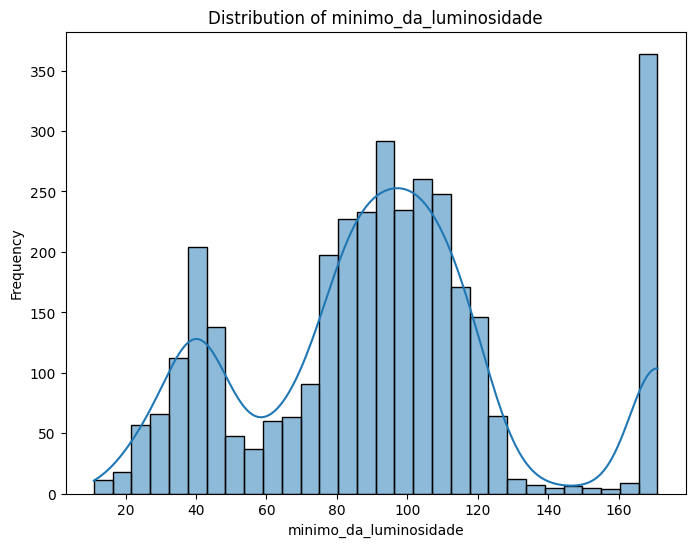

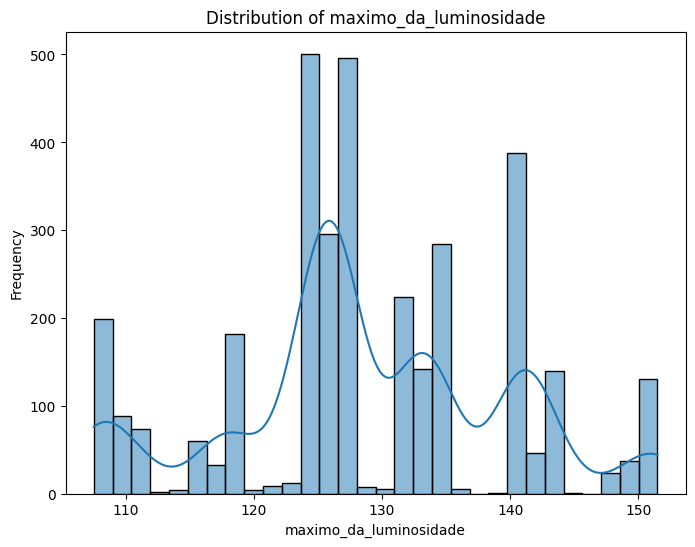

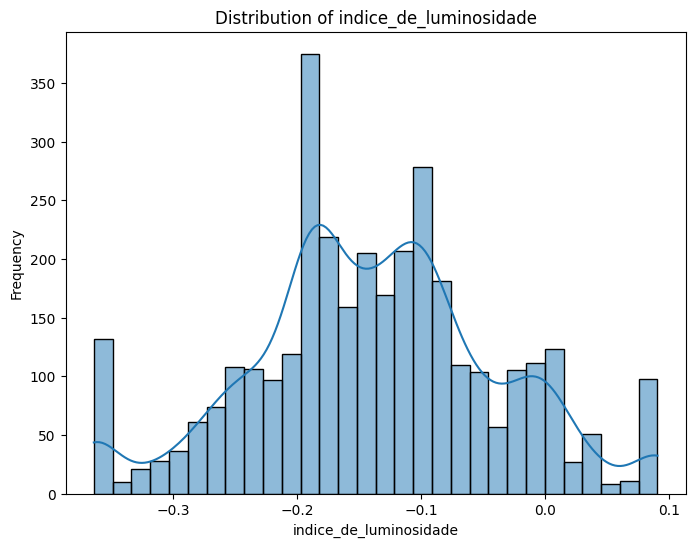

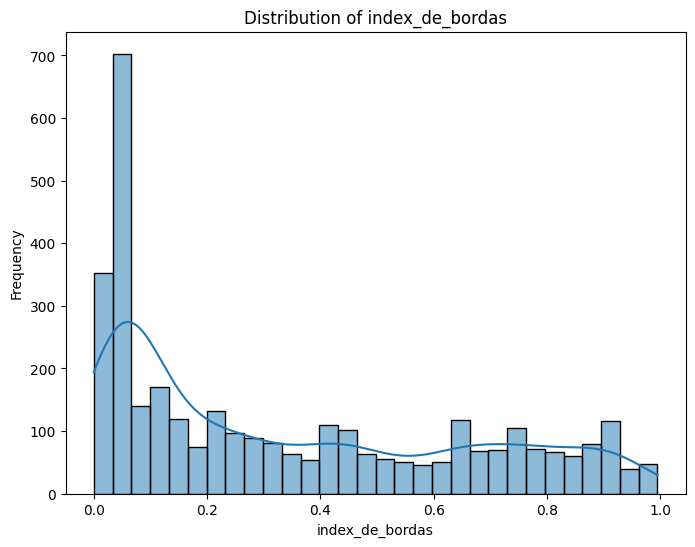

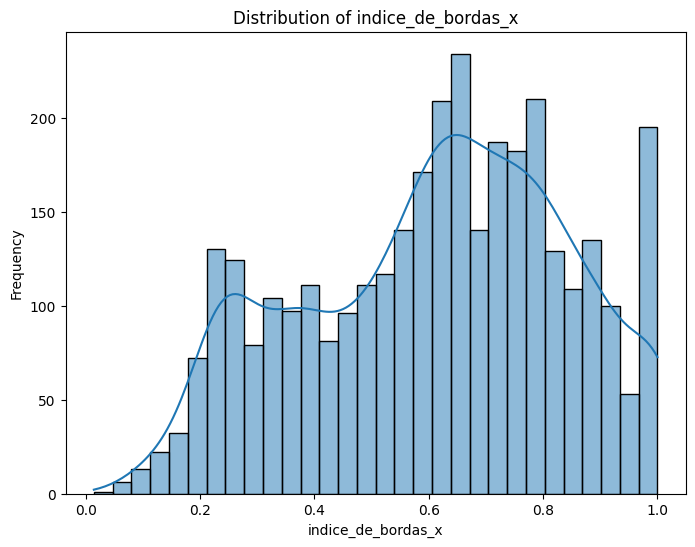

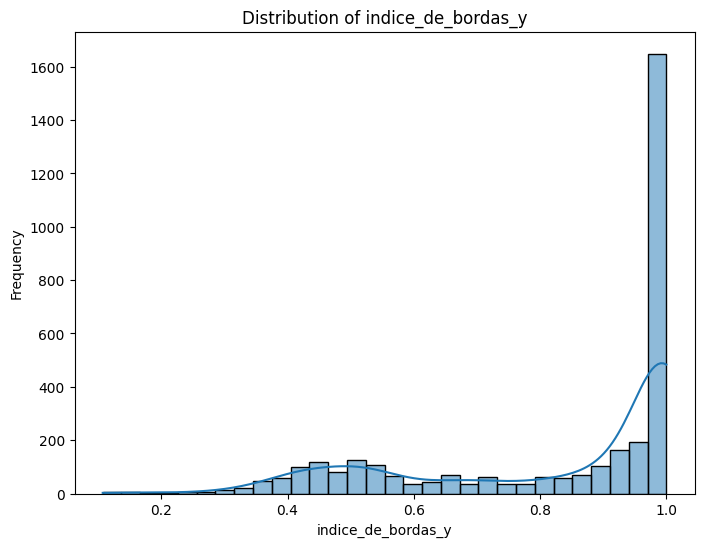

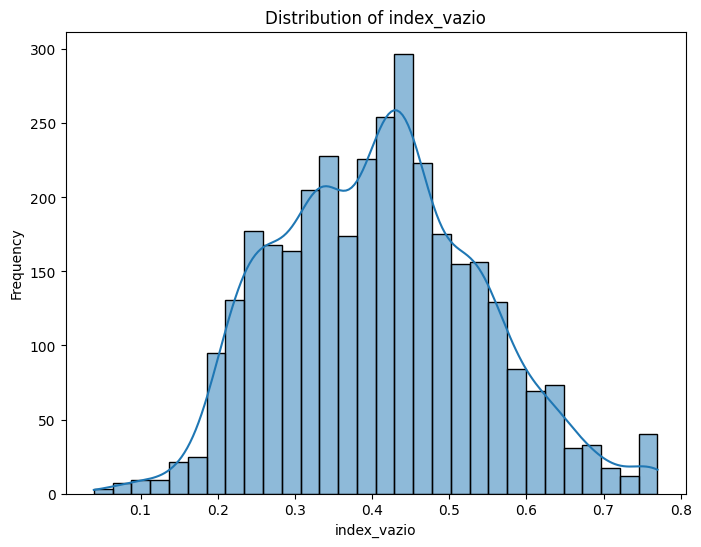

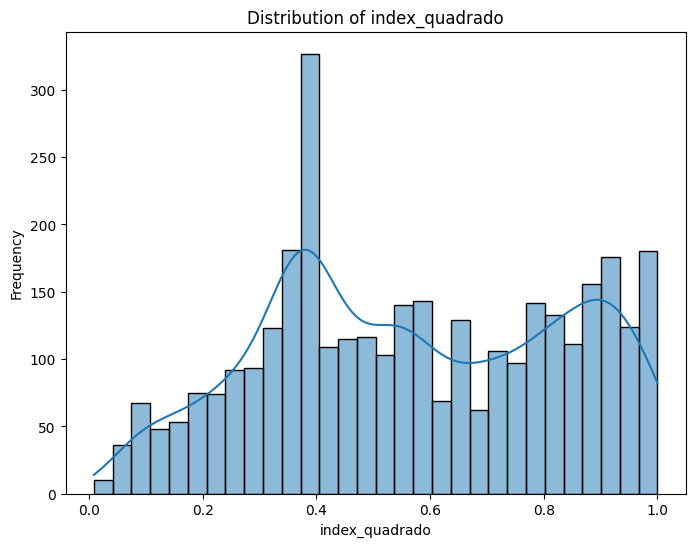

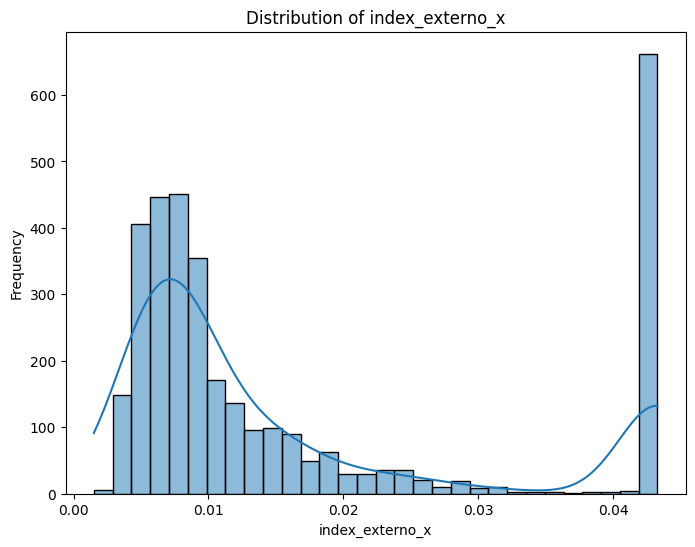

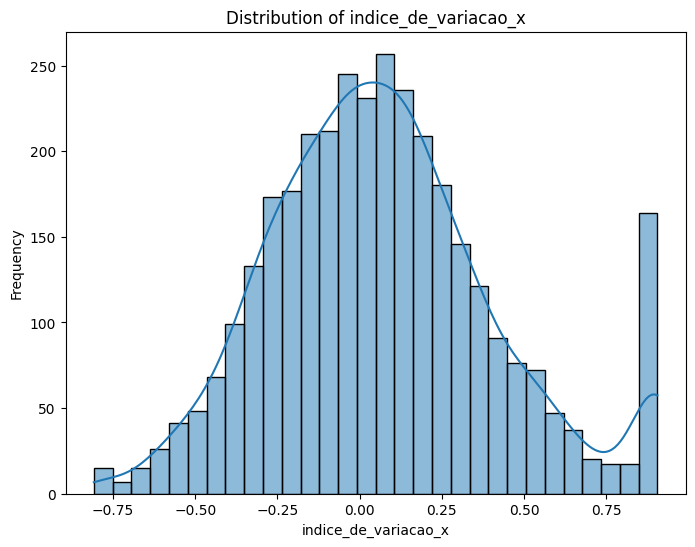

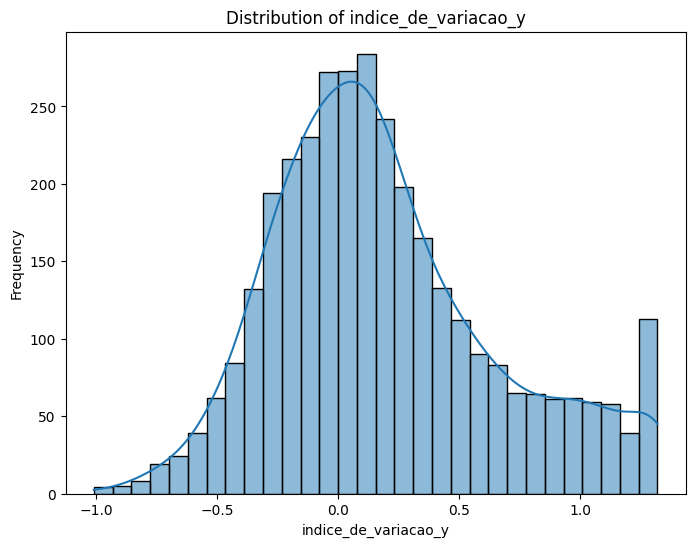

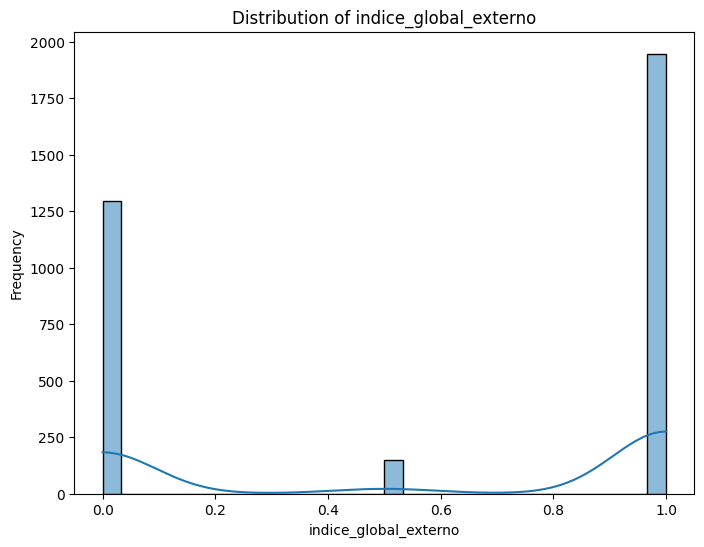

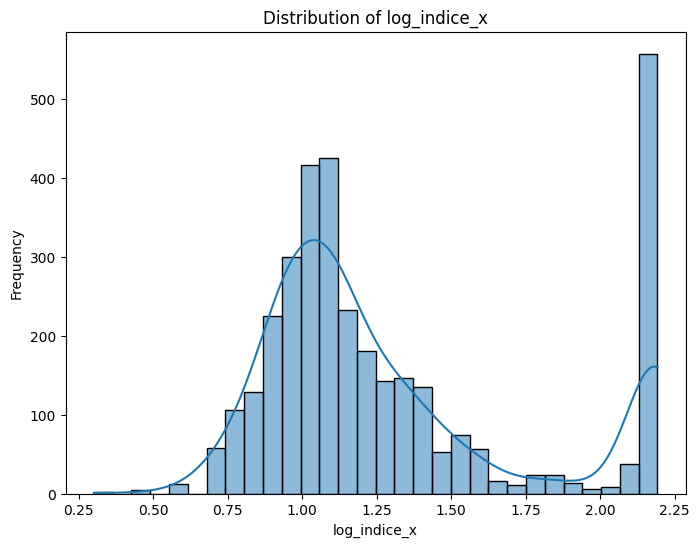

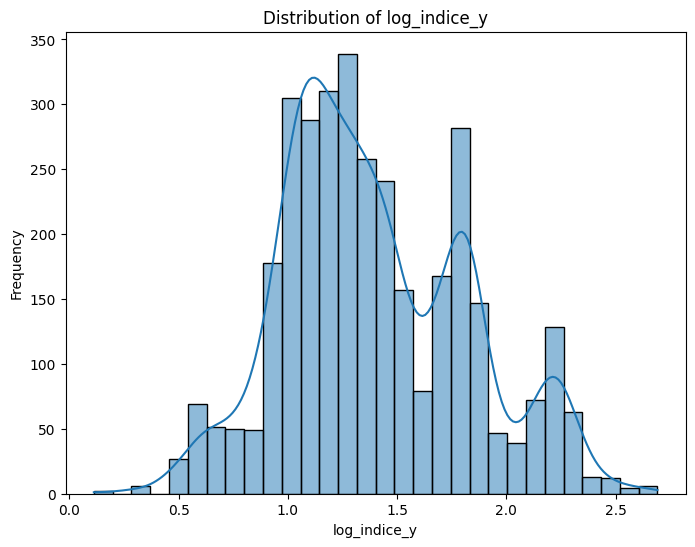

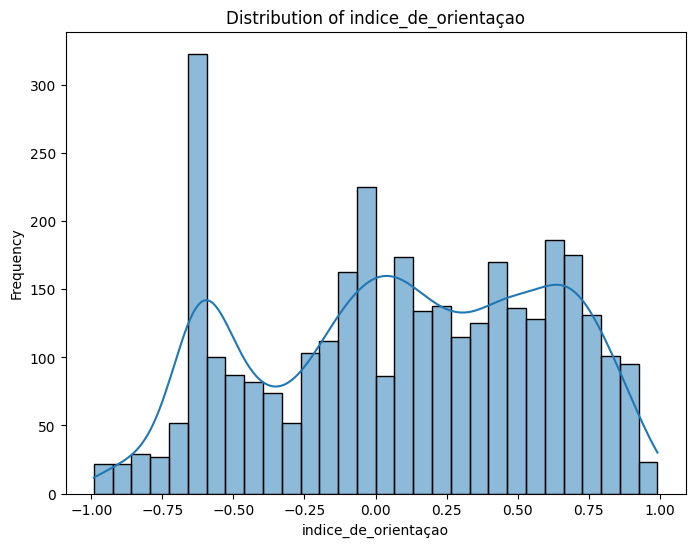

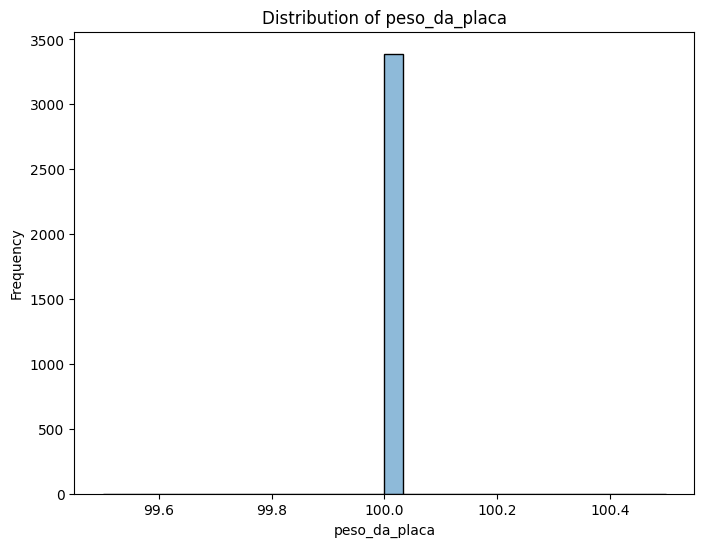

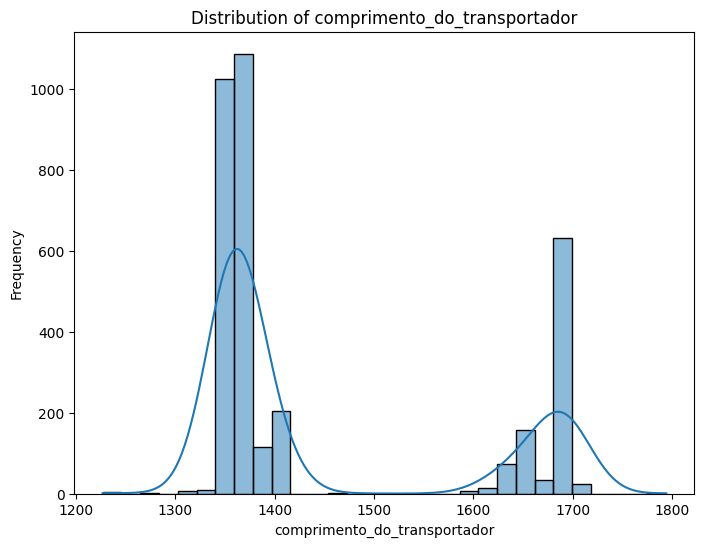

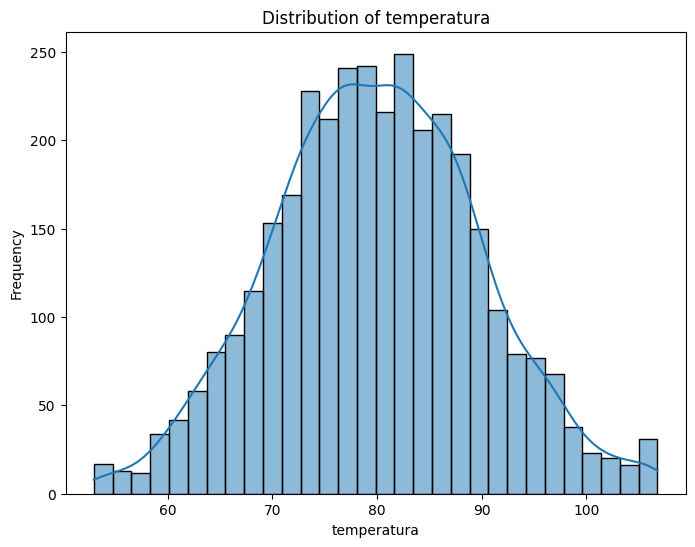

In [45]:
# prompt: gere uma analise da distribuição dos dados

# Assuming df_outliers is your DataFrame after outlier treatment
# as defined in the provided code.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for analysis (excluding categorical/binary and constant columns)
numerical_cols = ['x_minimo', 'x_maximo', 'y_minimo', 'y_maximo', 'area_pixels', 'perimetro_x', 'perimetro_y',
                  'log_das_areas', 'sigmoide_das_areas', 'espessura_da_chapa_de_aço', 'soma_da_luminosidade',
                  'minimo_da_luminosidade', 'maximo_da_luminosidade', 'indice_de_luminosidade', 'index_de_bordas',
                  'indice_de_bordas_x', 'indice_de_bordas_y', 'index_vazio', 'index_quadrado', 'index_externo_x',
                  'indice_de_variacao_x', 'indice_de_variacao_y', 'indice_global_externo', 'log_indice_x',
                  'log_indice_y', 'indice_de_orientaçao', 'peso_da_placa', 'comprimento_do_transportador', 'temperatura']

# Create histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_outliers[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



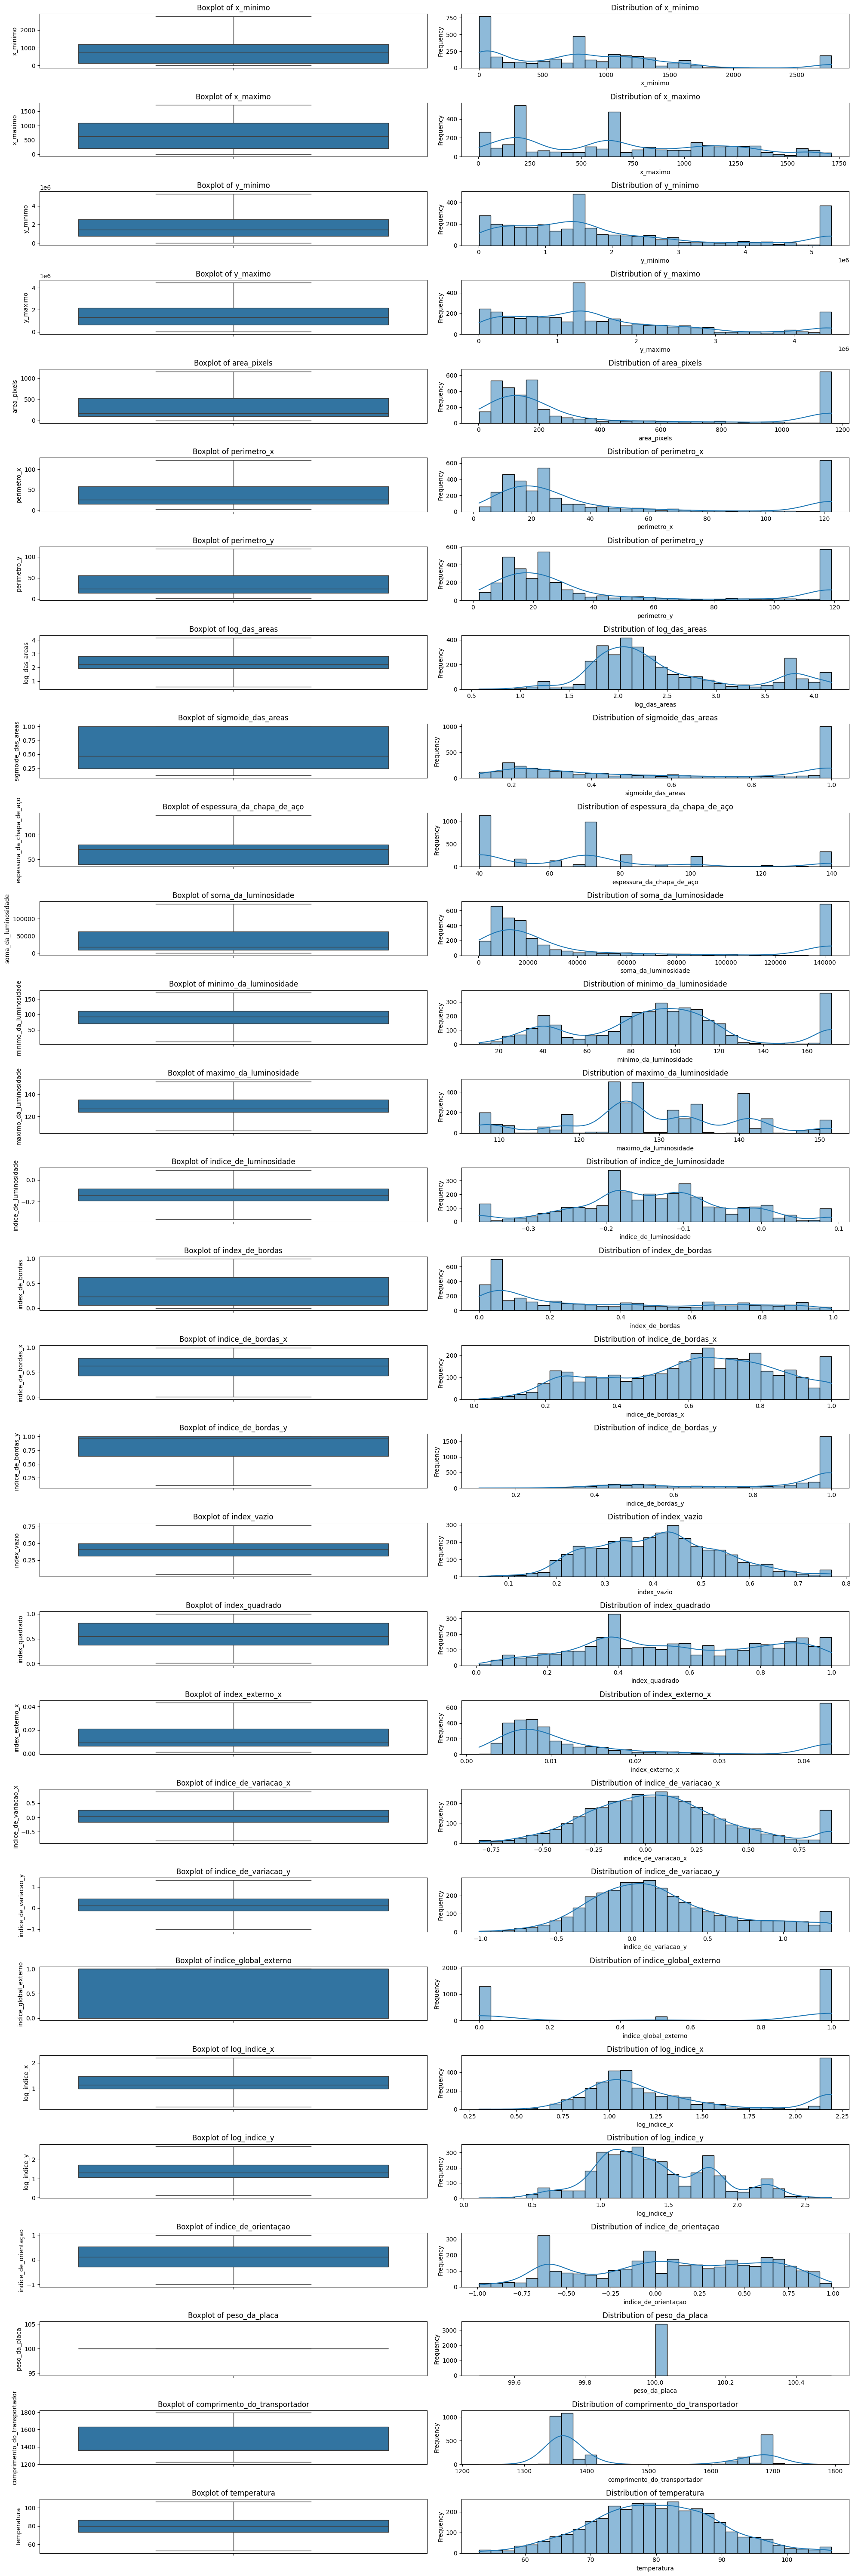

In [46]:
# prompt: # Create box plots for each numerical column
# for col in numerical_cols:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(y=df_outliers[col])
#     plt.title(f'Boxplot of {col}')
#     plt.ylabel(col)
#     plt.show()
# deixe os fraficos lado a lado

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_outliers and numerical_cols are defined as in your original code

plt.figure(figsize=(20, 60)) # Adjust figure size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2 * i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    plt.subplot(len(numerical_cols), 2, 2 * i + 2) # Adjust subplot grid as needed
    sns.histplot(df_outliers[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


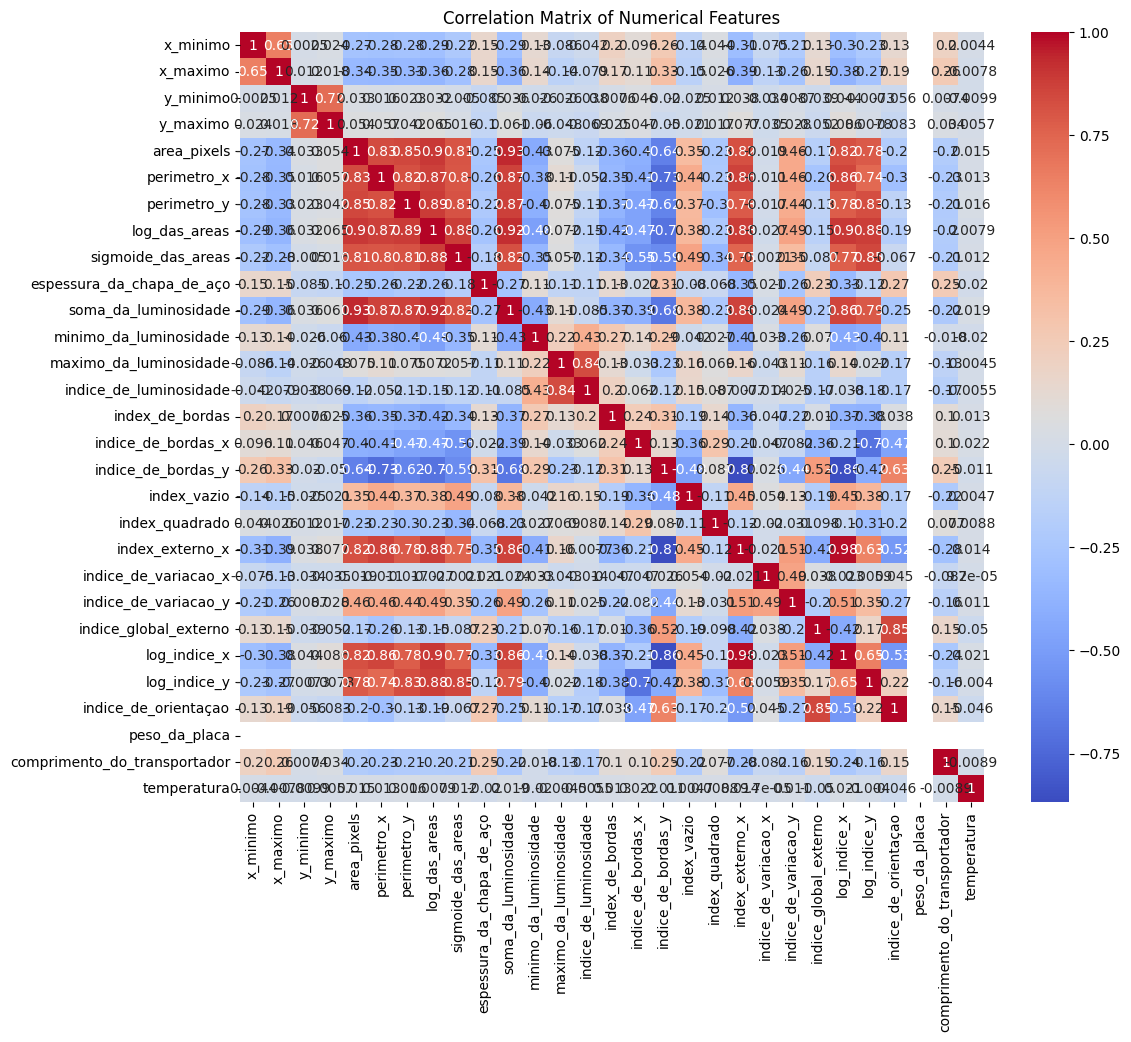

In [47]:

# Correlation matrix for numerical columns (optional)
correlation_matrix = df_outliers[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [48]:

# Descriptive statistics for numerical columns
print(df_outliers[numerical_cols].describe())


          x_minimo     x_maximo      y_minimo      y_maximo  area_pixels  \
count  3390.000000  3390.000000  3.390000e+03  3.390000e+03  3390.000000   
mean    809.157153   686.798230  1.898600e+06  1.572591e+06   377.334440   
std     700.029973   476.806093  1.578913e+06  1.211118e+06   416.400256   
min       0.000000     4.000000  6.712000e+03  6.724000e+03     2.000000   
25%     131.000000   214.000000  7.282982e+05  6.575020e+05    99.000000   
50%     767.000000   633.000000  1.457758e+06  1.312948e+06   168.000000   
75%    1187.500000  1088.000000  2.555025e+06  2.184335e+06   524.750000   
max    2772.250000  1713.000000  5.295115e+06  4.474584e+06  1163.375000   

       perimetro_x  perimetro_y  log_das_areas  sigmoide_das_areas  \
count  3390.000000  3390.000000    3390.000000         3390.000000   
mean     44.342478    42.400295       2.474741            0.570363   
std      41.332067    39.988807       0.768251            0.335394   
min       2.000000     2.000000    